In [4]:
import pandas as pd
#from binance.client import Client
import datetime as dt

Reading Data for the price action

In [5]:
data_15m = pd.read_csv("BTCUSDT-15minutes.csv")
data_30m = pd.read_csv("BTCUSDT-30minutes.csv")
data_1h = pd.read_csv("BTCUSDT-1hourly.csv")
data_4h = pd.read_csv("BTCUSDT-4hourly.csv")

In [6]:
testing_levels= [data_15m,data_30m,data_1h,data_4h]
#Big_levels = [data_monthly,data_weekly,data_daily]

In [7]:
for data in testing_levels:
    data['date'] = pd.to_datetime(data['date'])

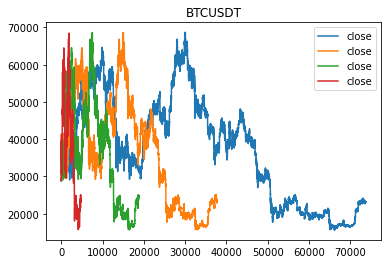

In [8]:
for data in testing_levels:
  data["close"].plot(title = 'BTCUSDT', legend = 'close')

Reading Data for the support/Resistance levels

In [9]:
df_m = pd.read_csv("BTCUSDT-1monthly.csv")
df_w = pd.read_csv("BTCUSDT-weekly.csv")
df_d = pd.read_csv("BTCUSDT-daily.csv")

In [10]:
Big_levels = [df_m,df_w,df_d]
for df in Big_levels :
    df['date'] = pd.to_datetime(df['date'])

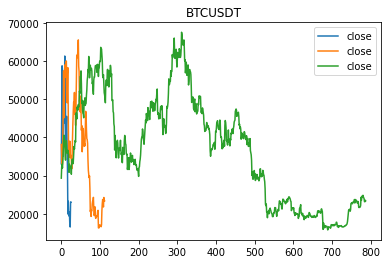

In [11]:
for df in Big_levels :
    df["close"].plot(title = 'BTCUSDT', legend = 'close')

Assigning different candle colors for the price action

In [12]:
for df in testing_levels :
  # Create an empty column to store the candle color
  df["candle_color"] = ""

  # Loop through each row of the data
  for index, row in df.iterrows():
      # Compare the close price to the open price
    if row["close"] > row["open"]:
        df.at[index, "candle_color"] = "green"
    else:
        df.at[index, "candle_color"] = "red"

In [16]:
for df in Big_levels:
  # Create an empty column to store the candle color
  df["candle_color"] = ""

  # Loop through each row of the data
  for index, row in df.iterrows():
      # Compare the close price to the open price
      if row["close"] > row["open"]:
          df.at[index, "candle_color"] = "green"
      else:
          df.at[index, "candle_color"] = "red"

# Gathering the Support and Resistance Levels

In [17]:
import pandas as pd
Supports = []
Resistances = []
for df in Big_levels:
  print("-----------------------LVL-----------")
  # List to store the new support/resistance levels
  support_levels = []
  resistance_levels = []
  # Loop through the data with a step size of 3 candles
  for i in range(0, len(df)):
      if i + 2 < len(df.index):
          candle1 = df.iloc[i]
          candle2 = df.iloc[i + 1]
          candle3 = df.iloc[i + 2]
      
      # Determine the direction of each candle
      candle1_direction = 1 if candle1["candle_color"] == "green" else -1
      candle2_direction = 1 if candle2["candle_color"] == "green" else -1
      
      # Check if the direction of candle1 and candle2 are different
      if candle1_direction != candle2_direction:
          # Store the open price of candle2 as a potential support/resistance level
          new_daily_level = candle2["open"]
          
          # Check the value of new_daily_level when candle3 opens
          if new_daily_level > candle3["open"]:
              support_levels.append((df.iloc[i].date,new_daily_level))
          elif new_daily_level < candle3["open"]:
              resistance_levels.append((df.iloc[i].date,new_daily_level))

  # Print the support/resistance levels
  for level in support_levels:
      print( "R Level: " +str(level))
  for level in resistance_levels:
      print( "S Level: " +str(level))
  print("num levels :" +str(len(support_levels)+len(resistance_levels)))
  Supports.append(support_levels)
  Resistances.append(resistance_levels)

-----------------------LVL-----------
R Level: (Timestamp('2021-03-31 23:59:59.999000'), 58739.46)
R Level: (Timestamp('2021-09-01 00:59:59.999000'), 47100.89)
R Level: (Timestamp('2021-11-01 00:59:59.999000'), 61299.81)
R Level: (Timestamp('2022-03-31 23:59:59.999000'), 45510.35)
R Level: (Timestamp('2022-08-01 00:59:59.999000'), 23296.36)
R Level: (Timestamp('2022-11-01 00:59:59.999000'), 20490.74)
S Level: (Timestamp('2021-07-01 00:59:59.999000'), 35045.0)
S Level: (Timestamp('2021-10-01 00:59:59.999000'), 43820.01)
S Level: (Timestamp('2022-02-01 00:59:59.999000'), 38466.9)
S Level: (Timestamp('2022-07-01 00:59:59.999000'), 19942.21)
S Level: (Timestamp('2022-10-01 00:59:59.999000'), 19422.61)
S Level: (Timestamp('2023-01-01 00:59:59.999000'), 16541.77)
S Level: (Timestamp('2023-02-01 00:59:59.999000'), 16541.77)
S Level: (Timestamp('2023-03-01 00:59:59.999000'), 16541.77)
num levels :14
-----------------------LVL-----------
R Level: (Timestamp('2021-01-11 00:59:59.999000'), 38150.

## Plotting the levels

In [18]:
for i in range(3) :
  dfpl = Big_levels[i]
  import plotly.graph_objects as go
  from datetime import datetime
  import matplotlib.pyplot as plt

  fig = go.Figure(data=[go.Candlestick(x=dfpl.date,
                  open=dfpl['open'],
                  high=dfpl['high'],
                  low=dfpl['low'],
                  close=dfpl['close'])])

  for level in Supports[i]:

      fig.add_shape(type='line',x0=level[0],
                    x1=df.iloc[-1].date,
                    y0=level[1],
                    y1=level[1]
                    )#x0=sr[c][0]-5 x1=sr[c][0]+5

  for level in Resistances[i]:

      fig.add_shape(type='line',x0=level[0],
                    x1=df.iloc[-1].date,
                    y0=level[1],
                    y1=level[1]
                    )#x0=sr[c][0]-5 x1=sr[c][0]+5
  fig.show()


Gathering the support/resistance levels in one list

In [20]:
Levels=[]
for i in range(3):
  levels = Supports[i]+Resistances[i]
  Levels.append(levels)
  print(len(levels))

14
61
424


In [21]:
Statistics = []
for levels in Levels :
  dates, prices = map(list, zip(*levels))
  statistics = pd.DataFrame({"dates" : dates,"levels":prices})
  Statistics.append(statistics)

Creating different statistic lists for different Z parameter, you can learn more about the Z parameter in the project proposal paper, same for max and min levels

In [22]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
Statistics_oneprc = []
for Z in Z_parameter:
  for statistics in Statistics :
    statistics.drop_duplicates(subset=["levels"],inplace = True)
    statistics["level_min"] = statistics.levels * (1-(Z/100))
    statistics["level_max"] = statistics.levels * (1+(Z/100))
    statistics["touches as supp"] = [0]*len(statistics)
    statistics["touches as resistance"] = [0]*len(statistics)
    statistics["num bounces"] = [0]*len(statistics)
    statistics["num rejections"] = [0]*len(statistics)

    if Z == 0.5:
      Statistics_hfprc.append(statistics)
    else :
      Statistics_oneprc.append(statistics)


We are goin to start by considering the levels as zones which means there is going to be a min and a max for a level
the percentage we are going to adopt firstly is 2%

In [23]:
Statistics_hfprc

[                     dates    levels   level_min   level_max  touches as supp  \
 0  2021-03-31 23:59:59.999  58739.46  58152.0654  59326.8546                0   
 1  2021-09-01 00:59:59.999  47100.89  46629.8811  47571.8989                0   
 2  2021-11-01 00:59:59.999  61299.81  60686.8119  61912.8081                0   
 3  2022-03-31 23:59:59.999  45510.35  45055.2465  45965.4535                0   
 4  2022-08-01 00:59:59.999  23296.36  23063.3964  23529.3236                0   
 5  2022-11-01 00:59:59.999  20490.74  20285.8326  20695.6474                0   
 6  2021-07-01 00:59:59.999  35045.00  34694.5500  35395.4500                0   
 7  2021-10-01 00:59:59.999  43820.01  43381.8099  44258.2101                0   
 8  2022-02-01 00:59:59.999  38466.90  38082.2310  38851.5690                0   
 9  2022-07-01 00:59:59.999  19942.21  19742.7879  20141.6321                0   
 10 2022-10-01 00:59:59.999  19422.61  19228.3839  19616.8361                0   
 11 2023-01-01 0

In [24]:
Statistics_hfprc[1]

dates    levels   level_min   level_max  touches as supp  \
0  2021-01-11 00:59:59.999  38150.02  37768.5198  38531.5202                0   
1  2021-02-22 00:59:59.999  57412.35  56838.2265  57986.4735                0   
2  2021-03-15 00:59:59.999  58976.08  58386.3192  59565.8408                0   
3  2021-04-11 23:59:59.999  59998.80  59398.8120  60598.7880                0   
4  2021-05-10 00:59:59.999  58240.83  57658.4217  58823.2383                0   
5  2021-06-14 00:59:59.999  39020.56  38630.3544  39410.7656                0   
6  2021-07-05 00:59:59.999  35288.13  34935.2487  35641.0113                0   
7  2021-08-23 00:59:59.999  49239.22  48746.8278  49731.6122                0   
8  2021-09-06 00:59:59.999  51756.88  51239.3112  52274.4488                0   
9  2021-09-20 00:59:59.999  47241.75  46769.3325  47714.1675                0   
10 2021-10-18 00:59:59.999  61528.32  60913.0368  62143.6032                0   
11 2021-11-15 00:59:59.999  65519.11  64863.9189  66174.3011                0   
12 2021-12-13 00:59:59.999  50053.90  49553.3610  50554.4390                0   
13 2021-12-27 00:59:59.999  50775.48  50267.7252  51283.2348                0   
14 2022-01-17 00:59:59.999  43071.66  42640.9434  43502.3766                0   
15 2022-02-07 00:59:59.999  42380.87  41957.0613  42804.6787                0   
16 2022-03-07 00:59:59.999  38420.80  38036.5920  38805.0080                0   
17 2022-03-27 23:59:59.999  46827.76  46359.4824  47296.0376                0   
18 2022-06-06 00:59:59.999  29919.20  29620.0080  30218.3920                0   
19 2022-06-27 00:59:59.999  21038.08  20827.6992  21248.4608                0   
20 2022-07-11 00:59:59.999  20861.11  20652.4989  21069.7211                0   
21 2022-08-01 00:59:59.999  23296.36  23063.3964  23529.3236                0   
22 2022-08-15 00:59:59.999  24305.25  24062.1975  24548.3025                0   
23 2022-09-12 00:59:59.999  21826.87  21608.6013  22045.1387                0   
24 2022-10-10 00:59:59.999  19439.96  19245.5604  19634.3596                0   
25 2022-11-07 00:59:59.999  20905.58  20696.5242  21114.6358                0   
26 2022-12-05 00:59:59.999  17106.65  16935.5835  17277.7165                0   
27 2022-12-26 00:59:59.999  16832.11  16663.7889  17000.4311                0   
28 2023-01-30 00:59:59.999  23743.37  23505.9363  23980.8037                0   
29 2023-02-20 00:59:59.999  24272.51  24029.7849  24515.2351                0   
32 2021-01-25 00:59:59.999  32259.45  31936.8555  32582.0445                0   
33 2021-03-01 00:59:59.999  45134.11  44682.7689  45585.4511                0   
34 2021-03-28 23:59:59.999  55777.65  55219.8735  56335.4265                0   
35 2021-04-26 00:59:59.999  49066.76  48576.0924  49557.4276                0   
36 2021-05-24 00:59:59.999  34681.44  34334.6256  35028.2544                0   
37 2021-06-28 00:59:59.999  34702.49  34355.4651  35049.5149                0   
38 2021-07-19 00:59:59.999  31778.57  31460.7843  32096.3557                0   
39 2021-08-30 00:59:59.999  48767.84  48280.1616  49255.5184                0   
40 2021-09-13 00:59:59.999  46025.23  45564.9777  46485.4823                0   
41 2021-09-27 00:59:59.999  43160.90  42729.2910  43592.5090                0   
42 2021-10-25 00:59:59.999  60852.22  60243.6978  61460.7422                0   
43 2021-12-06 00:59:59.999  49396.32  48902.3568  49890.2832                0   
44 2021-12-20 00:59:59.999  46681.24  46214.4276  47148.0524                0   
45 2022-01-10 00:59:59.999  41864.62  41445.9738  42283.2662                0   
46 2022-01-24 00:59:59.999  36244.55  35882.1045  36606.9955                0   
47 2022-02-28 00:59:59.999  37699.08  37322.0892  38076.0708                0   
48 2022-03-14 00:59:59.999  37777.35  37399.5765  38155.1235                0   
49 2022-05-30 00:59:59.999  29468.10  29173.4190  29762.7810                0   
50 2022-06-20 00:59:59.999  20574.00  20368.2600  20

## Defining the Algo of Bounce and rejection

In [25]:
def bounce(data,i) :
    #initialization
    indexes = []
    low = data.iloc[i].low
    i=i+1
    indexes.append(i)
    next_candle = data.iloc[i]
    max_price = next_candle.high
    diff = max_price - low
    retracement_level = max_price - 0.786 * diff
    i=i+1
    next_candle = data.iloc[i]
    while next_candle.low > retracement_level :
        #print("hi")
        if i<len(data)-1:
            i=i+1
            indexes.append(i)
            max_price = max(next_candle.high,max_price)
            diff = max_price - low
            retracement_level = max_price - 0.786 * diff
            next_candle = data.iloc[i]
        else :
            break
    return(max_price,low,retracement_level,next_candle.date,indexes[-1])

In [26]:
def rejection(data,i) :
    #initialization
    indexes = []
    high = data.iloc[i].high
    i=i+1
    indexes.append(i)
    next_candle = data.iloc[i]
    min_price = next_candle.low
    diff = min_price - high
    retracement_level = min_price - 0.786 * diff
    i=i+1
    next_candle = data.iloc[i]
    while next_candle.high < retracement_level :
        #print("hi")
        if i<len(data)-1:
            i=i+1
            indexes.append(i)
            min_price = min(next_candle.low,min_price)
            diff = min_price - high
            #print(retracement_level)
            retracement_level = min_price - 0.786 * diff
            next_candle = data.iloc[i]
        else :
            break
    return(min_price,high,retracement_level,next_candle.date,indexes[-1])

# Monthly levels


## testing the Monthly levels with Z=1

### Testing the price action in the 15 minute timeframe

In [ ]:
for stat in Statistics_hfprc:
  print(len(stat))

12
59
422


In [ ]:
from operator import is_
#####real

touches_suppport = []
touches_resistance = []
reactions = []
indexes = []


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_oneprc[0]
testing_price = testing_levels[0]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-1 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

In [ ]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-1 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

In [ ]:
statistics

dates    levels   level_min   level_max  touches as supp  \
0  2021-03-31 23:59:59.999  58739.46  58152.0654  59326.8546               69   
1  2021-09-01 00:59:59.999  47100.89  46629.8811  47571.8989               82   
2  2021-11-01 00:59:59.999  61299.81  60686.8119  61912.8081               18   
3  2022-03-31 23:59:59.999  45510.35  45055.2465  45965.4535                6   
4  2022-08-01 00:59:59.999  23296.36  23063.3964  23529.3236               65   
5  2022-11-01 00:59:59.999  20490.74  20285.8326  20695.6474               15   
6  2021-07-01 00:59:59.999  35045.00  34694.5500  35395.4500               25   
7  2021-10-01 00:59:59.999  43820.01  43381.8099  44258.2101               50   
8  2022-02-01 00:59:59.999  38466.90  38082.2310  38851.5690               45   
9  2022-07-01 00:59:59.999  19942.21  19742.7879  20141.6321               78   
10 2022-10-01 00:59:59.999  19422.61  19228.3839  19616.8361               30   
11 2023-01-01 00:59:59.999  16541.77  16376.3523  16707.1877                1   

    touches as resistance  num bounces  num rejections  
0                      50           13              16  
1                     107           24              23  
2                      21            6               6  
3                      14            2               2  
4                      34            6              16  
5                      16            3               3  
6                      22            9               6  
7                      51           15              13  
8                      75           24              16  
9                      69           20              18  
10                     29            8               5  
11                      7            1               0

In [ ]:
stats = statistics.sum()

<ipython-input-33-ac83d3a43aa2>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
pd.DataFrame(stats).transpose()

levels    level_min    level_max  touches as supp  \
0  429676.11  425379.3489  433972.8711            484.0   

   touches as resistance  num bounces  num rejections  
0                  495.0        131.0           124.0

In [ ]:
st = pd.DataFrame(stats)

In [ ]:
st["data"] = st.index

In [ ]:
st

0                   data
levels                 429676.1100                 levels
level_min              425379.3489              level_min
level_max              433972.8711              level_max
touches as supp           484.0000        touches as supp
touches as resistance     495.0000  touches as resistance
num bounces               131.0000            num bounces
num rejections            124.0000         num rejections

<AxesSubplot:xlabel='data'>

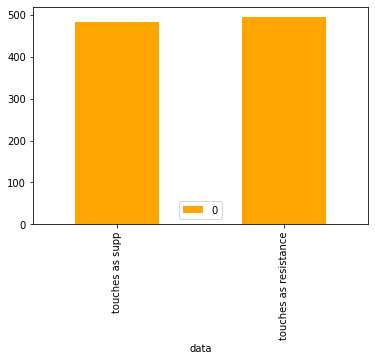

In [ ]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

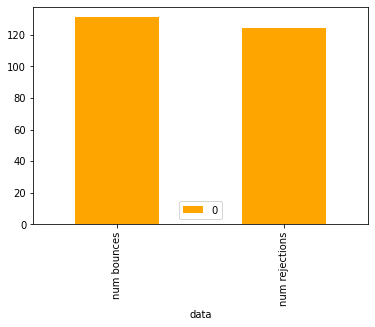

In [ ]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [ ]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

26.046986721144023 %


In [ ]:
df_reactions = pd.DataFrame(reactions)

In [ ]:
df_reactions

0       1     2                       3          4  \
0    58739.46 -239.26   wig 2021-04-01 07:14:59.999     bounce   
1    58739.46 -184.46   wig 2021-04-02 00:44:59.999     bounce   
2    58739.46 -289.35   wig 2021-04-02 21:14:59.999     bounce   
3    58739.46 -206.36   wig 2021-04-05 23:14:59.999     bounce   
4    58739.46 -404.64   wig 2021-04-10 02:29:59.999     bounce   
..        ...     ...   ...                     ...        ...   
250  19422.61   44.37  wick 2022-10-01 01:14:59.999  rejection   
251  19422.61   94.42  wick 2022-10-10 02:44:59.999  rejection   
252  19422.61   55.15  wick 2022-10-14 15:59:59.999  rejection   
253  19422.61  152.73  wick 2022-10-18 15:14:59.999  rejection   
254  19422.61  164.72  wick 2022-10-24 01:29:59.999  rejection   

                                                     5  
0    (59490.0, 58500.2, 58712.017199999995, 2021-04...  
1    (60200.0, 58555.0, 58907.03, 2021-04-02 13:44:...  
2    (59791.72, 58450.11, 58737.21454, 2021-04-03 1...  
3    (59495.24, 58533.1, 58738.99796, 2021-04-06 01...  
4    (61500.0, 58334.82, 59012.16852, 2021-04-10 20...  
..                                                 ...  
250  (18920.35, 19466.98, 19350.00118, 2022-10-03 1...  
251  (19107.0, 19517.03, 19429.28358, 2022-10-10 13...  
252  (18975.18, 19477.76, 19370.207879999998, 2022-...  
253  (18650.0, 19575.34, 19377.31724, 2022-10-23 18...  
254  (19157.0, 19587.33, 19495.239380000003, 2022-1...  

[255 rows x 6 columns]

In [ ]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -239.26       wig 2021-04-01 07:14:59.999     bounce   
1    58739.46     -184.46       wig 2021-04-02 00:44:59.999     bounce   
2    58739.46     -289.35       wig 2021-04-02 21:14:59.999     bounce   
3    58739.46     -206.36       wig 2021-04-05 23:14:59.999     bounce   
4    58739.46     -404.64       wig 2021-04-10 02:29:59.999     bounce   
..        ...         ...       ...                     ...        ...   
250  19422.61       44.37      wick 2022-10-01 01:14:59.999  rejection   
251  19422.61       94.42      wick 2022-10-10 02:44:59.999  rejection   
252  19422.61       55.15      wick 2022-10-14 15:59:59.999  rejection   
253  19422.61      152.73      wick 2022-10-18 15:14:59.999  rejection   
254  19422.61      164.72      wick 2022-10-24 01:29:59.999  rejection   

                                         reaction_info  
0    (59490.0, 58500.2, 58712.017199999995, 2021-04...  
1    (60200.0, 58555.0, 58907.03, 2021-04-02 13:44:...  
2    (59791.72, 58450.11, 58737.21454, 2021-04-03 1...  
3    (59495.24, 58533.1, 58738.99796, 2021-04-06 01...  
4    (61500.0, 58334.82, 59012.16852, 2021-04-10 20...  
..                                                 ...  
250  (18920.35, 19466.98, 19350.00118, 2022-10-03 1...  
251  (19107.0, 19517.03, 19429.28358, 2022-10-10 13...  
252  (18975.18, 19477.76, 19370.207879999998, 2022-...  
253  (18650.0, 19575.34, 19377.31724, 2022-10-23 18...  
254  (19157.0, 19587.33, 19495.239380000003, 2022-1...  

[255 rows x 6 columns]

In [ ]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [ ]:
df_r["highest_point"] = df_r.apply(lambda row: row.rejection_info[1] , axis = 1)
df_r["lowest_point"] = df_r.apply(lambda row: row.rejection_info[0] , axis = 1)
df_r["end_of_bounce"] = df_r.apply(lambda row: row.rejection_info[3] , axis = 1)

In [ ]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [ ]:
df_r = df_r.drop('rejection_info', axis=1)

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -239.26       wig 2021-04-01 07:14:59.999     bounce   
1    58739.46     -184.46       wig 2021-04-02 00:44:59.999     bounce   
2    58739.46     -289.35       wig 2021-04-02 21:14:59.999     bounce   
3    58739.46     -206.36       wig 2021-04-05 23:14:59.999     bounce   
4    58739.46     -404.64       wig 2021-04-10 02:29:59.999     bounce   
..        ...         ...       ...                     ...        ...   
250  19422.61       44.37      wick 2022-10-01 01:14:59.999  rejection   
251  19422.61       94.42      wick 2022-10-10 02:44:59.999  rejection   
252  19422.61       55.15      wick 2022-10-14 15:59:59.999  rejection   
253  19422.61      152.73      wick 2022-10-18 15:14:59.999  rejection   
254  19422.61      164.72      wick 2022-10-24 01:29:59.999  rejection   

     start_price  last_price           end_of_bounce  
0       58500.20    59490.00 2021-04-01 08:59:59.999  
1       58555.00    60200.00 2021-04-02 13:44:59.999  
2       58450.11    59791.72 2021-04-03 16:14:59.999  
3       58533.10    59495.24 2021-04-06 01:59:59.999  
4       58334.82    61500.00 2021-04-10 20:59:59.999  
..           ...         ...                     ...  
250     19466.98    18920.35 2022-10-03 15:29:59.999  
251     19517.03    19107.00 2022-10-10 13:59:59.999  
252     19477.76    18975.18 2022-10-16 20:59:59.999  
253     19575.34    18650.00 2022-10-23 18:59:59.999  
254     19587.33    19157.00 2022-10-25 14:59:59.999  

[255 rows x 8 columns]

In [ ]:
df_r

resistance_level  price_diff(candle_high-supp) wick/body  \
0           58739.46                        100.24      body   
1           58739.46                          9.30      wick   
2           58739.46                        225.73      wick   
3           58739.46                        320.54      wick   
4           58739.46                        560.54      wick   
..               ...                           ...       ...   
87          19942.21                        170.69      body   
88          19422.61                         16.14      wick   
89          19422.61                        102.39      wick   
90          19422.61                         19.39      wick   
91          19422.61                        170.35      body   

        start_of_rejection    type  highest_point  lowest_point  \
0  2021-04-01 08:59:59.999  bounce       59490.00      58115.00   
1  2021-04-03 19:59:59.999  bounce       58748.76      56388.00   
2  2021-05-03 12:59:59.999  bounce       58965.19      52900.00   
3  2021-05-08 15:59:59.999  bounce       59060.00      57472.95   
4  2021-05-09 04:59:59.999  bounce       59300.00      56235.66   
..                     ...     ...            ...           ...   
87 2022-10-06 18:59:59.999  bounce       20256.00      18190.00   
88 2022-10-01 04:59:59.999  bounce       19438.75      19159.42   
89 2022-10-10 02:59:59.999  bounce       19525.00      19107.00   
90 2022-10-18 17:59:59.999  bounce       19442.00      19091.00   
91 2022-10-23 23:59:59.999  bounce       19695.00      19157.00   

             end_of_bounce  
0  2021-04-01 15:59:59.999  
1  2021-04-04 14:59:59.999  
2  2021-05-05 16:59:59.999  
3  2021-05-08 18:59:59.999  
4  2021-05-10 01:59:59.999  
..                     ...  
87 2022-10-14 02:59:59.999  
88 2022-10-01 14:59:59.999  
89 2022-10-10 14:59:59.999  
90 2022-10-18 21:59:59.999  
91 2022-10-25 16:59:59.999  

[92 rows x 8 columns]

In [ ]:
df_b["%_of_bounce"] = ((df_b["highest_point"]-df_b["lowest_point"])/df_b["lowest_point"])*100

In [ ]:
df_r["%_of_rejection"] = ((df_r["highest_point"]-df_r["lowest_point"])/df_r["lowest_point"])*100

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -239.26       wig 2021-04-01 07:14:59.999     bounce   
1    58739.46     -184.46       wig 2021-04-02 00:44:59.999     bounce   
2    58739.46     -289.35       wig 2021-04-02 21:14:59.999     bounce   
3    58739.46     -206.36       wig 2021-04-05 23:14:59.999     bounce   
4    58739.46     -404.64       wig 2021-04-10 02:29:59.999     bounce   
..        ...         ...       ...                     ...        ...   
250  19422.61       44.37      wick 2022-10-01 01:14:59.999  rejection   
251  19422.61       94.42      wick 2022-10-10 02:44:59.999  rejection   
252  19422.61       55.15      wick 2022-10-14 15:59:59.999  rejection   
253  19422.61      152.73      wick 2022-10-18 15:14:59.999  rejection   
254  19422.61      164.72      wick 2022-10-24 01:29:59.999  rejection   

     start_price  last_price           end_of_bounce  
0       58500.20    59490.00 2021-04-01 08:59:59.999  
1       58555.00    60200.00 2021-04-02 13:44:59.999  
2       58450.11    59791.72 2021-04-03 16:14:59.999  
3       58533.10    59495.24 2021-04-06 01:59:59.999  
4       58334.82    61500.00 2021-04-10 20:59:59.999  
..           ...         ...                     ...  
250     19466.98    18920.35 2022-10-03 15:29:59.999  
251     19517.03    19107.00 2022-10-10 13:59:59.999  
252     19477.76    18975.18 2022-10-16 20:59:59.999  
253     19575.34    18650.00 2022-10-23 18:59:59.999  
254     19587.33    19157.00 2022-10-25 14:59:59.999  

[255 rows x 8 columns]

In [ ]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -239.26       wig 2021-04-01 07:14:59.999     bounce   
1    58739.46     -184.46       wig 2021-04-02 00:44:59.999     bounce   
2    58739.46     -289.35       wig 2021-04-02 21:14:59.999     bounce   
3    58739.46     -206.36       wig 2021-04-05 23:14:59.999     bounce   
4    58739.46     -404.64       wig 2021-04-10 02:29:59.999     bounce   
..        ...         ...       ...                     ...        ...   
250  19422.61       44.37      wick 2022-10-01 01:14:59.999  rejection   
251  19422.61       94.42      wick 2022-10-10 02:44:59.999  rejection   
252  19422.61       55.15      wick 2022-10-14 15:59:59.999  rejection   
253  19422.61      152.73      wick 2022-10-18 15:14:59.999  rejection   
254  19422.61      164.72      wick 2022-10-24 01:29:59.999  rejection   

     start_price  last_price           end_of_bounce  %_of_reaction  
0       58500.20    59490.00 2021-04-01 08:59:59.999      -1.691960  
1       58555.00    60200.00 2021-04-02 13:44:59.999      -2.809325  
2       58450.11    59791.72 2021-04-03 16:14:59.999      -2.295308  
3       58533.10    59495.24 2021-04-06 01:59:59.999      -1.643754  
4       58334.82    61500.00 2021-04-10 20:59:59.999      -5.425885  
..           ...         ...                     ...            ...  
250     19466.98    18920.35 2022-10-03 15:29:59.999       2.807986  
251     19517.03    19107.00 2022-10-10 13:59:59.999       2.100883  
252     19477.76    18975.18 2022-10-16 20:59:59.999       2.580276  
253     19575.34    18650.00 2022-10-23 18:59:59.999       4.727070  
254     19587.33    19157.00 2022-10-25 14:59:59.999       2.196981  

[255 rows x 9 columns]

In [ ]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction
count    255.000000  255.000000    255.000000    255.000000     255.000000
mean   38386.041608  -14.294314  38374.985647  37994.515412       5.384138
std    13759.857928  267.565114  13774.987401  13987.682802       9.455133
min    16541.770000 -558.050000  16511.960000  15476.000000       1.042076
25%    23296.360000 -225.435000  23281.010000  22659.530000       2.034893
50%    38466.900000  -10.550000  38773.410000  39249.930000       2.809325
75%    47100.890000  178.705000  47103.945000  47614.470000       4.410362
max    61299.810000  584.210000  61850.000000  69000.000000      73.753922

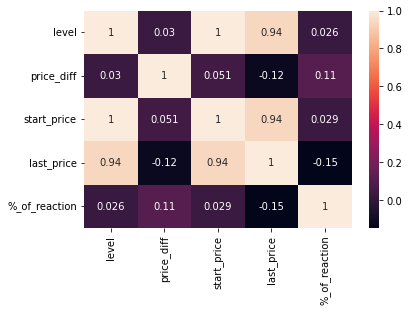

In [ ]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc3fe3c0c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc3fe3d2100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc3fe3c0940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc3fe3d26a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc3fe3d2970>],
 'means': []}

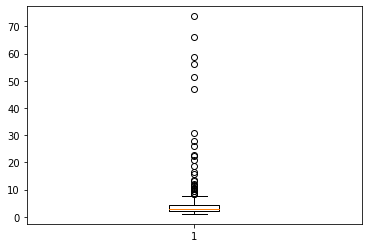

In [ ]:
plt.boxplot(df_reactions["%_of_reaction"])

In [ ]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

40.24326515603189

In [ ]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

3.5115401101681822

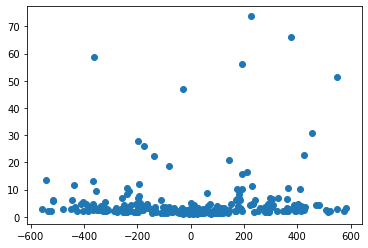

In [ ]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction  \
count    255.000000  255.000000    255.000000    255.000000     255.000000   
mean   38386.041608  -14.294314  38374.985647  37994.515412       5.384138   
std    13759.857928  267.565114  13774.987401  13987.682802       9.455133   
min    16541.770000 -558.050000  16511.960000  15476.000000       1.042076   
25%    23296.360000 -225.435000  23281.010000  22659.530000       2.034893   
50%    38466.900000  -10.550000  38773.410000  39249.930000       2.809325   
75%    47100.890000  178.705000  47103.945000  47614.470000       4.410362   
max    61299.810000  584.210000  61850.000000  69000.000000      73.753922   

       %_diff_of_lvl  
count     255.000000  
mean       -0.044290  
std         0.653043  
min        -0.998681  
25%        -0.683589  
50%        -0.041241  
75%         0.552257  
max         0.998304

### Testing the price action in the 30 minute timeframe

In [ ]:
for stat in Statistics_hfprc:
  print(len(stat))

12
59
422


Reinitializing the statistics table

In [ ]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
Statistics_oneprc = []
for Z in Z_parameter:
  for statistics in Statistics :
    statistics.drop_duplicates(subset=["levels"],inplace = True)
    statistics["level_min"] = statistics.levels * (1-(Z/100))
    statistics["level_max"] = statistics.levels * (1+(Z/100))
    statistics["touches as supp"] = [0]*len(statistics)
    statistics["touches as resistance"] = [0]*len(statistics)
    statistics["num bounces"] = [0]*len(statistics)
    statistics["num rejections"] = [0]*len(statistics)

    if Z == 0.5:
      Statistics_hfprc.append(statistics)
    else :
      Statistics_oneprc.append(statistics)

Getting reactions for the red candles

In [ ]:
from operator import is_
#####real

touches_suppport = []
touches_resistance = []
reactions = []
indexes = []


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_oneprc[0]
testing_price = testing_levels[1]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [ ]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [ ]:
statistics

dates    levels   level_min   level_max  touches as supp  \
0  2021-03-31 23:59:59.999  58739.46  58152.0654  59326.8546               44   
1  2021-09-01 00:59:59.999  47100.89  46629.8811  47571.8989               50   
2  2021-11-01 00:59:59.999  61299.81  60686.8119  61912.8081               12   
3  2022-03-31 23:59:59.999  45510.35  45055.2465  45965.4535                5   
4  2022-08-01 00:59:59.999  23296.36  23063.3964  23529.3236               47   
5  2022-11-01 00:59:59.999  20490.74  20285.8326  20695.6474               11   
6  2021-07-01 00:59:59.999  35045.00  34694.5500  35395.4500               17   
7  2021-10-01 00:59:59.999  43820.01  43381.8099  44258.2101               37   
8  2022-02-01 00:59:59.999  38466.90  38082.2310  38851.5690               33   
9  2022-07-01 00:59:59.999  19942.21  19742.7879  20141.6321               49   
10 2022-10-01 00:59:59.999  19422.61  19228.3839  19616.8361               25   
11 2023-01-01 00:59:59.999  16541.77  16376.3523  16707.1877                1   

    touches as resistance  num bounces  num rejections  
0                      37           14              14  
1                      67           20              19  
2                      13            5               7  
3                       9            1               1  
4                      29            7              16  
5                      11            4               1  
6                      15            8               6  
7                      31           16              14  
8                      43           19              16  
9                      44           18              19  
10                     20            7               5  
11                      6            1               0

In [ ]:
stats = statistics.sum()

<ipython-input-82-ac83d3a43aa2>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



number of reactions

In [ ]:
len(reactions)

238

In [ ]:
pd.DataFrame(stats).transpose()

levels    level_min    level_max  touches as supp  \
0  429676.11  425379.3489  433972.8711            331.0   

   touches as resistance  num bounces  num rejections  
0                  325.0        120.0           118.0

In [ ]:
st = pd.DataFrame(stats)

In [ ]:
st["data"] = st.index

In [ ]:
st

0                   data
levels                 429676.1100                 levels
level_min              425379.3489              level_min
level_max              433972.8711              level_max
touches as supp           331.0000        touches as supp
touches as resistance     325.0000  touches as resistance
num bounces               120.0000            num bounces
num rejections            118.0000         num rejections

<AxesSubplot:xlabel='data'>

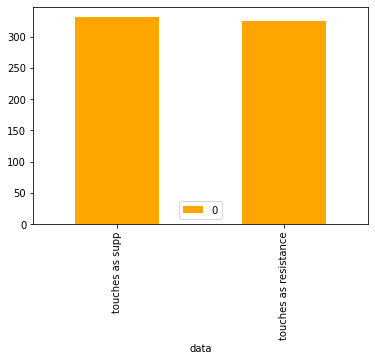

In [ ]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

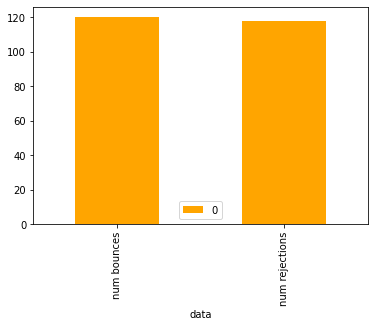

In [ ]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [ ]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

36.28048780487805 %


In [ ]:
df_reactions = pd.DataFrame(reactions)

In [ ]:
df_reactions

0       1     2                       3          4  \
0    58739.46 -103.46   wig 2021-04-01 07:59:59.999     bounce   
1    58739.46 -284.36   wig 2021-04-02 00:59:59.999     bounce   
2    58739.46 -170.83   wig 2021-04-02 20:59:59.999     bounce   
3    58739.46 -206.36   wig 2021-04-05 23:29:59.999     bounce   
4    58739.46 -404.64   wig 2021-04-10 02:29:59.999     bounce   
..        ...     ...   ...                     ...        ...   
233  19422.61   61.39  wick 2022-10-01 01:29:59.999  rejection   
234  19422.61   99.23  wick 2022-10-10 02:29:59.999  rejection   
235  19422.61  122.42  wick 2022-10-14 15:59:59.999  rejection   
236  19422.61   16.79  wick 2022-10-18 18:59:59.999  rejection   
237  19422.61  178.54  wick 2022-10-24 01:29:59.999  rejection   

                                                     5  
0    (59490.0, 58636.0, 58818.756, 2021-04-01 08:59...  
1    (60200.0, 58455.1, 58828.5086, 2021-04-02 13:5...  
2    (59791.72, 58568.63, 58830.37126, 2021-04-03 0...  
3    (59495.24, 58533.1, 58738.99796, 2021-04-06 01...  
4    (61500.0, 58334.82, 59012.16852, 2021-04-10 20...  
..                                                 ...  
233  (18920.35, 19484.0, 19363.3789, 2022-10-03 15:...  
234  (19107.0, 19521.84, 19433.06424, 2022-10-10 13...  
235  (18975.18, 19545.03, 19423.0821, 2022-10-16 21...  
236  (19091.0, 19439.4, 19364.8424, 2022-10-18 21:5...  
237  (19157.0, 19601.15, 19506.1019, 2022-10-25 14:...  

[238 rows x 6 columns]

In [ ]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -103.46       wig 2021-04-01 07:59:59.999     bounce   
1    58739.46     -284.36       wig 2021-04-02 00:59:59.999     bounce   
2    58739.46     -170.83       wig 2021-04-02 20:59:59.999     bounce   
3    58739.46     -206.36       wig 2021-04-05 23:29:59.999     bounce   
4    58739.46     -404.64       wig 2021-04-10 02:29:59.999     bounce   
..        ...         ...       ...                     ...        ...   
233  19422.61       61.39      wick 2022-10-01 01:29:59.999  rejection   
234  19422.61       99.23      wick 2022-10-10 02:29:59.999  rejection   
235  19422.61      122.42      wick 2022-10-14 15:59:59.999  rejection   
236  19422.61       16.79      wick 2022-10-18 18:59:59.999  rejection   
237  19422.61      178.54      wick 2022-10-24 01:29:59.999  rejection   

                                         reaction_info  
0    (59490.0, 58636.0, 58818.756, 2021-04-01 08:59...  
1    (60200.0, 58455.1, 58828.5086, 2021-04-02 13:5...  
2    (59791.72, 58568.63, 58830.37126, 2021-04-03 0...  
3    (59495.24, 58533.1, 58738.99796, 2021-04-06 01...  
4    (61500.0, 58334.82, 59012.16852, 2021-04-10 20...  
..                                                 ...  
233  (18920.35, 19484.0, 19363.3789, 2022-10-03 15:...  
234  (19107.0, 19521.84, 19433.06424, 2022-10-10 13...  
235  (18975.18, 19545.03, 19423.0821, 2022-10-16 21...  
236  (19091.0, 19439.4, 19364.8424, 2022-10-18 21:5...  
237  (19157.0, 19601.15, 19506.1019, 2022-10-25 14:...  

[238 rows x 6 columns]

In [ ]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [ ]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -103.46       wig 2021-04-01 07:59:59.999     bounce   
1    58739.46     -284.36       wig 2021-04-02 00:59:59.999     bounce   
2    58739.46     -170.83       wig 2021-04-02 20:59:59.999     bounce   
3    58739.46     -206.36       wig 2021-04-05 23:29:59.999     bounce   
4    58739.46     -404.64       wig 2021-04-10 02:29:59.999     bounce   
..        ...         ...       ...                     ...        ...   
233  19422.61       61.39      wick 2022-10-01 01:29:59.999  rejection   
234  19422.61       99.23      wick 2022-10-10 02:29:59.999  rejection   
235  19422.61      122.42      wick 2022-10-14 15:59:59.999  rejection   
236  19422.61       16.79      wick 2022-10-18 18:59:59.999  rejection   
237  19422.61      178.54      wick 2022-10-24 01:29:59.999  rejection   

     start_price  last_price           end_of_bounce  
0       58636.00    59490.00 2021-04-01 08:59:59.999  
1       58455.10    60200.00 2021-04-02 13:59:59.999  
2       58568.63    59791.72 2021-04-03 08:59:59.999  
3       58533.10    59495.24 2021-04-06 01:59:59.999  
4       58334.82    61500.00 2021-04-10 20:59:59.999  
..           ...         ...                     ...  
233     19484.00    18920.35 2022-10-03 15:29:59.999  
234     19521.84    19107.00 2022-10-10 13:59:59.999  
235     19545.03    18975.18 2022-10-16 21:29:59.999  
236     19439.40    19091.00 2022-10-18 21:59:59.999  
237     19601.15    19157.00 2022-10-25 14:59:59.999  

[238 rows x 8 columns]

In [ ]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -103.46       wig 2021-04-01 07:59:59.999     bounce   
1    58739.46     -284.36       wig 2021-04-02 00:59:59.999     bounce   
2    58739.46     -170.83       wig 2021-04-02 20:59:59.999     bounce   
3    58739.46     -206.36       wig 2021-04-05 23:29:59.999     bounce   
4    58739.46     -404.64       wig 2021-04-10 02:29:59.999     bounce   
..        ...         ...       ...                     ...        ...   
233  19422.61       61.39      wick 2022-10-01 01:29:59.999  rejection   
234  19422.61       99.23      wick 2022-10-10 02:29:59.999  rejection   
235  19422.61      122.42      wick 2022-10-14 15:59:59.999  rejection   
236  19422.61       16.79      wick 2022-10-18 18:59:59.999  rejection   
237  19422.61      178.54      wick 2022-10-24 01:29:59.999  rejection   

     start_price  last_price           end_of_bounce  %_of_reaction  
0       58636.00    59490.00 2021-04-01 08:59:59.999      -1.456443  
1       58455.10    60200.00 2021-04-02 13:59:59.999      -2.985026  
2       58568.63    59791.72 2021-04-03 08:59:59.999      -2.088302  
3       58533.10    59495.24 2021-04-06 01:59:59.999      -1.643754  
4       58334.82    61500.00 2021-04-10 20:59:59.999      -5.425885  
..           ...         ...                     ...            ...  
233     19484.00    18920.35 2022-10-03 15:29:59.999       2.892886  
234     19521.84    19107.00 2022-10-10 13:59:59.999       2.125005  
235     19545.03    18975.18 2022-10-16 21:29:59.999       2.915575  
236     19439.40    19091.00 2022-10-18 21:59:59.999       1.792236  
237     19601.15    19157.00 2022-10-25 14:59:59.999       2.265938  

[238 rows x 9 columns]

In [ ]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction
count    238.000000  238.000000    238.000000    238.000000     238.000000
mean   38174.683403   -4.775462  38171.447563  38004.311050       5.142162
std    13963.831256  257.492503  13984.586163  14178.804686       8.560461
min    16541.770000 -551.460000  16508.450000  15476.000000       1.138898
25%    23296.360000 -204.277500  23212.257500  22691.415000       2.076038
50%    38466.900000   -4.180000  38766.630000  39067.235000       2.904231
75%    47100.890000  182.285000  47076.767500  47632.235000       4.444326
max    61299.810000  523.840000  61928.370000  69000.000000      73.793277

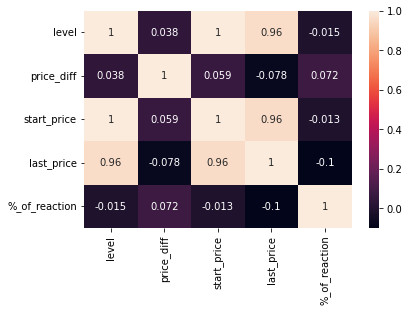

In [ ]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc3fd21c4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc3fd21ca60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc3fd21c310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc3fd227040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc3fd227310>],
 'means': []}

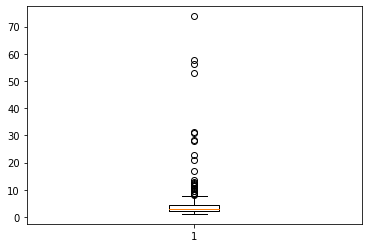

In [ ]:
plt.boxplot(df_reactions["%_of_reaction"])

In [ ]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

40.21842239075964

In [ ]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

3.603729770911375

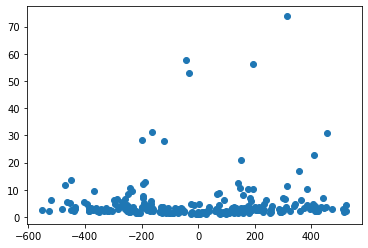

In [ ]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction  \
count    238.000000  238.000000    238.000000    238.000000     238.000000   
mean   38174.683403   -4.775462  38171.447563  38004.311050       5.142162   
std    13963.831256  257.492503  13984.586163  14178.804686       8.560461   
min    16541.770000 -551.460000  16508.450000  15476.000000       1.138898   
25%    23296.360000 -204.277500  23212.257500  22691.415000       2.076038   
50%    38466.900000   -4.180000  38766.630000  39067.235000       2.904231   
75%    47100.890000  182.285000  47076.767500  47632.235000       4.444326   
max    61299.810000  523.840000  61928.370000  69000.000000      73.793277   

       %_diff_of_lvl  
count     238.000000  
mean       -0.020486  
std         0.644593  
min        -0.999748  
25%        -0.657902  
50%        -0.014435  
75%         0.577817  
max         0.993117

### Testing the price action in the 1 hour timeframe

Reinitializing the statistics table

In [ ]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
Statistics_oneprc = []
for Z in Z_parameter:
  for statistics in Statistics :
    statistics.drop_duplicates(subset=["levels"],inplace = True)
    statistics["level_min"] = statistics.levels * (1-(Z/100))
    statistics["level_max"] = statistics.levels * (1+(Z/100))
    statistics["touches as supp"] = [0]*len(statistics)
    statistics["touches as resistance"] = [0]*len(statistics)
    statistics["num bounces"] = [0]*len(statistics)
    statistics["num rejections"] = [0]*len(statistics)

    if Z == 0.5:
      Statistics_hfprc.append(statistics)
    else :
      Statistics_oneprc.append(statistics)

Getting reactions for the red candles

In [ ]:
from operator import is_
#####real

touches_suppport = []
touches_resistance = []
reactions = []
indexes = []


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_oneprc[0]
testing_price = testing_levels[2]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [ ]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [ ]:
statistics

dates    levels   level_min   level_max  touches as supp  \
0  2021-03-31 23:59:59.999  58739.46  58152.0654  59326.8546               26   
1  2021-09-01 00:59:59.999  47100.89  46629.8811  47571.8989               37   
2  2021-11-01 00:59:59.999  61299.81  60686.8119  61912.8081                7   
3  2022-03-31 23:59:59.999  45510.35  45055.2465  45965.4535                3   
4  2022-08-01 00:59:59.999  23296.36  23063.3964  23529.3236               28   
5  2022-11-01 00:59:59.999  20490.74  20285.8326  20695.6474                7   
6  2021-07-01 00:59:59.999  35045.00  34694.5500  35395.4500               12   
7  2021-10-01 00:59:59.999  43820.01  43381.8099  44258.2101               27   
8  2022-02-01 00:59:59.999  38466.90  38082.2310  38851.5690               28   
9  2022-07-01 00:59:59.999  19942.21  19742.7879  20141.6321               36   
10 2022-10-01 00:59:59.999  19422.61  19228.3839  19616.8361               16   
11 2023-01-01 00:59:59.999  16541.77  16376.3523  16707.1877                1   

    touches as resistance  num bounces  num rejections  
0                      17            9              11  
1                      42           20              15  
2                      12            4               5  
3                       6            1               2  
4                      17            6              12  
5                       7            3               1  
6                      12            7               5  
7                      23           11              10  
8                      30           19              13  
9                      32           17              14  
10                     15            7               4  
11                      5            1               0

In [ ]:
stats = statistics.sum()

<ipython-input-114-ac83d3a43aa2>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



number of reactions

In [ ]:
len(reactions)

197

In [ ]:
pd.DataFrame(stats).transpose()

levels    level_min    level_max  touches as supp  \
0  429676.11  425379.3489  433972.8711            228.0   

   touches as resistance  num bounces  num rejections  
0                  218.0        105.0            92.0

In [ ]:
st = pd.DataFrame(stats)

In [ ]:
st["data"] = st.index

In [ ]:
st

0                   data
levels                 429676.1100                 levels
level_min              425379.3489              level_min
level_max              433972.8711              level_max
touches as supp           228.0000        touches as supp
touches as resistance     218.0000  touches as resistance
num bounces               105.0000            num bounces
num rejections             92.0000         num rejections

<AxesSubplot:xlabel='data'>

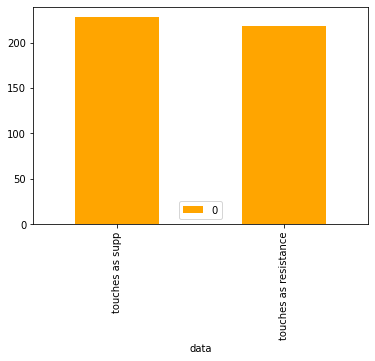

In [ ]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

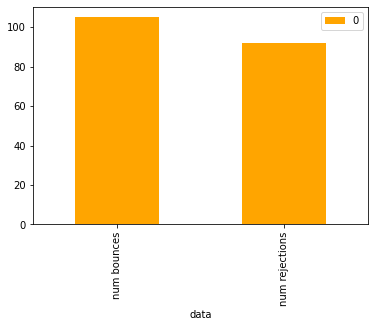

In [ ]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [ ]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

44.17040358744394 %


In [ ]:
df_reactions = pd.DataFrame(reactions)

In [ ]:
df_reactions

0       1     2                       3          4  \
0    58739.46 -284.36   wig 2021-04-02 00:59:59.999     bounce   
1    58739.46 -170.83   wig 2021-04-02 20:59:59.999     bounce   
2    58739.46 -364.85   wig 2021-04-10 20:59:59.999     bounce   
3    58739.46 -129.30   wig 2021-05-10 02:59:59.999     bounce   
4    58739.46 -213.46   wig 2021-10-27 12:59:59.999     bounce   
..        ...     ...   ...                     ...        ...   
192  19942.21  170.69  body 2022-10-06 18:59:59.999  rejection   
193  19422.61   16.14  wick 2022-10-01 04:59:59.999  rejection   
194  19422.61  102.39  wick 2022-10-10 02:59:59.999  rejection   
195  19422.61   19.39  wick 2022-10-18 17:59:59.999  rejection   
196  19422.61  170.35  body 2022-10-23 23:59:59.999  rejection   

                                                     5  
0    (60200.0, 58455.1, 58828.5086, 2021-04-02 13:5...  
1    (59531.74, 58568.63, 58774.735539999994, 2021-...  
2    (64854.0, 58374.61, 59761.19946, 2021-04-17 17...  
3    (59500.0, 58610.16, 58800.58576, 2021-05-10 06...  
4    (59449.0, 58526.0, 58723.522, 2021-10-27 17:59...  
..                                                 ...  
192  (18190.0, 20256.0, 19813.876, 2022-10-14 02:59...  
193  (19159.42, 19438.75, 19378.97338, 2022-10-01 1...  
194  (19107.0, 19525.0, 19435.548, 2022-10-10 14:59...  
195  (19091.0, 19442.0, 19366.886, 2022-10-18 21:59...  
196  (19157.0, 19695.0, 19579.868, 2022-10-25 16:59...  

[197 rows x 6 columns]

In [ ]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -284.36       wig 2021-04-02 00:59:59.999     bounce   
1    58739.46     -170.83       wig 2021-04-02 20:59:59.999     bounce   
2    58739.46     -364.85       wig 2021-04-10 20:59:59.999     bounce   
3    58739.46     -129.30       wig 2021-05-10 02:59:59.999     bounce   
4    58739.46     -213.46       wig 2021-10-27 12:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
192  19942.21      170.69      body 2022-10-06 18:59:59.999  rejection   
193  19422.61       16.14      wick 2022-10-01 04:59:59.999  rejection   
194  19422.61      102.39      wick 2022-10-10 02:59:59.999  rejection   
195  19422.61       19.39      wick 2022-10-18 17:59:59.999  rejection   
196  19422.61      170.35      body 2022-10-23 23:59:59.999  rejection   

                                         reaction_info  
0    (60200.0, 58455.1, 58828.5086, 2021-04-02 13:5...  
1    (59531.74, 58568.63, 58774.735539999994, 2021-...  
2    (64854.0, 58374.61, 59761.19946, 2021-04-17 17...  
3    (59500.0, 58610.16, 58800.58576, 2021-05-10 06...  
4    (59449.0, 58526.0, 58723.522, 2021-10-27 17:59...  
..                                                 ...  
192  (18190.0, 20256.0, 19813.876, 2022-10-14 02:59...  
193  (19159.42, 19438.75, 19378.97338, 2022-10-01 1...  
194  (19107.0, 19525.0, 19435.548, 2022-10-10 14:59...  
195  (19091.0, 19442.0, 19366.886, 2022-10-18 21:59...  
196  (19157.0, 19695.0, 19579.868, 2022-10-25 16:59...  

[197 rows x 6 columns]

In [ ]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [ ]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -284.36       wig 2021-04-02 00:59:59.999     bounce   
1    58739.46     -170.83       wig 2021-04-02 20:59:59.999     bounce   
2    58739.46     -364.85       wig 2021-04-10 20:59:59.999     bounce   
3    58739.46     -129.30       wig 2021-05-10 02:59:59.999     bounce   
4    58739.46     -213.46       wig 2021-10-27 12:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
192  19942.21      170.69      body 2022-10-06 18:59:59.999  rejection   
193  19422.61       16.14      wick 2022-10-01 04:59:59.999  rejection   
194  19422.61      102.39      wick 2022-10-10 02:59:59.999  rejection   
195  19422.61       19.39      wick 2022-10-18 17:59:59.999  rejection   
196  19422.61      170.35      body 2022-10-23 23:59:59.999  rejection   

     start_price  last_price           end_of_bounce  
0       58455.10    60200.00 2021-04-02 13:59:59.999  
1       58568.63    59531.74 2021-04-03 08:59:59.999  
2       58374.61    64854.00 2021-04-17 17:59:59.999  
3       58610.16    59500.00 2021-05-10 06:59:59.999  
4       58526.00    59449.00 2021-10-27 17:59:59.999  
..           ...         ...                     ...  
192     20256.00    18190.00 2022-10-14 02:59:59.999  
193     19438.75    19159.42 2022-10-01 14:59:59.999  
194     19525.00    19107.00 2022-10-10 14:59:59.999  
195     19442.00    19091.00 2022-10-18 21:59:59.999  
196     19695.00    19157.00 2022-10-25 16:59:59.999  

[197 rows x 8 columns]

In [ ]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -284.36       wig 2021-04-02 00:59:59.999     bounce   
1    58739.46     -170.83       wig 2021-04-02 20:59:59.999     bounce   
2    58739.46     -364.85       wig 2021-04-10 20:59:59.999     bounce   
3    58739.46     -129.30       wig 2021-05-10 02:59:59.999     bounce   
4    58739.46     -213.46       wig 2021-10-27 12:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
192  19942.21      170.69      body 2022-10-06 18:59:59.999  rejection   
193  19422.61       16.14      wick 2022-10-01 04:59:59.999  rejection   
194  19422.61      102.39      wick 2022-10-10 02:59:59.999  rejection   
195  19422.61       19.39      wick 2022-10-18 17:59:59.999  rejection   
196  19422.61      170.35      body 2022-10-23 23:59:59.999  rejection   

     start_price  last_price           end_of_bounce  %_of_reaction  
0       58455.10    60200.00 2021-04-02 13:59:59.999      -2.985026  
1       58568.63    59531.74 2021-04-03 08:59:59.999      -1.644413  
2       58374.61    64854.00 2021-04-17 17:59:59.999     -11.099672  
3       58610.16    59500.00 2021-05-10 06:59:59.999      -1.518235  
4       58526.00    59449.00 2021-10-27 17:59:59.999      -1.577077  
..           ...         ...                     ...            ...  
192     20256.00    18190.00 2022-10-14 02:59:59.999      10.199447  
193     19438.75    19159.42 2022-10-01 14:59:59.999       1.436975  
194     19525.00    19107.00 2022-10-10 14:59:59.999       2.140845  
195     19442.00    19091.00 2022-10-18 21:59:59.999       1.805370  
196     19695.00    19157.00 2022-10-25 16:59:59.999       2.731658  

[197 rows x 9 columns]

In [ ]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction
count    197.000000  197.000000    197.000000    197.000000     197.000000
mean   37730.696091  -10.276396  37737.121777  37309.888782       6.160249
std    13711.415754  242.742498  13744.864583  14076.356411      10.727577
min    16541.770000 -518.690000  16508.450000  15476.000000       1.095099
25%    23296.360000 -189.330000  23207.290000  22400.000000       2.134879
50%    38466.900000  -22.210000  38570.010000  38908.560000       2.985026
75%    47100.890000  170.350000  47020.000000  47578.940000       5.080049
max    61299.810000  560.540000  61928.370000  69000.000000      73.688975

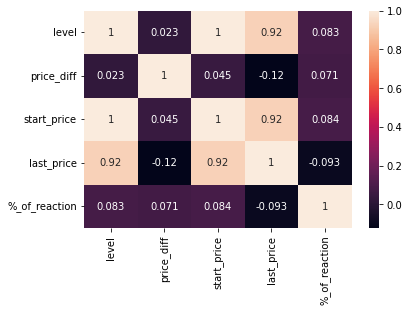

In [ ]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc3fc5b0e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc3fc5a3400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc3fc5b0c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc3fc5a39a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc3fc5a3c70>],
 'means': []}

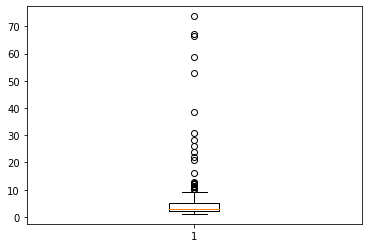

In [ ]:
plt.boxplot(df_reactions["%_of_reaction"])

In [ ]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

42.42630721419387

In [ ]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

3.8078561573414604

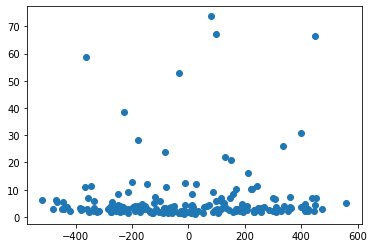

In [ ]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction  \
count    197.000000  197.000000    197.000000    197.000000     197.000000   
mean   37730.696091  -10.276396  37737.121777  37309.888782       6.160249   
std    13711.415754  242.742498  13744.864583  14076.356411      10.727577   
min    16541.770000 -518.690000  16508.450000  15476.000000       1.095099   
25%    23296.360000 -189.330000  23207.290000  22400.000000       2.134879   
50%    38466.900000  -22.210000  38570.010000  38908.560000       2.985026   
75%    47100.890000  170.350000  47020.000000  47578.940000       5.080049   
max    61299.810000  560.540000  61928.370000  69000.000000      73.688975   

       %_diff_of_lvl  
count     197.000000  
mean       -0.033165  
std         0.607934  
min        -0.994843  
25%        -0.599765  
50%        -0.067684  
75%         0.528886  
max         0.985402

### Testing the price action in the 4 hour timeframe

Reinitializing the statistics table

In [ ]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
Statistics_oneprc = []
for Z in Z_parameter:
  for statistics in Statistics :
    statistics.drop_duplicates(subset=["levels"],inplace = True)
    statistics["level_min"] = statistics.levels * (1-(Z/100))
    statistics["level_max"] = statistics.levels * (1+(Z/100))
    statistics["touches as supp"] = [0]*len(statistics)
    statistics["touches as resistance"] = [0]*len(statistics)
    statistics["num bounces"] = [0]*len(statistics)
    statistics["num rejections"] = [0]*len(statistics)

    if Z == 0.5:
      Statistics_hfprc.append(statistics)
    else :
      Statistics_oneprc.append(statistics)

Getting reactions for the red candles

In [ ]:
from operator import is_
#####real

touches_suppport = []
touches_resistance = []
reactions = []
indexes = []


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_oneprc[0]
testing_price = testing_levels[3]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [ ]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [ ]:
statistics

dates    levels   level_min   level_max  touches as supp  \
0  2021-03-31 23:59:59.999  58739.46  58152.0654  59326.8546               12   
1  2021-09-01 00:59:59.999  47100.89  46629.8811  47571.8989               15   
2  2021-11-01 00:59:59.999  61299.81  60686.8119  61912.8081                4   
3  2022-03-31 23:59:59.999  45510.35  45055.2465  45965.4535                1   
4  2022-08-01 00:59:59.999  23296.36  23063.3964  23529.3236               13   
5  2022-11-01 00:59:59.999  20490.74  20285.8326  20695.6474                4   
6  2021-07-01 00:59:59.999  35045.00  34694.5500  35395.4500                4   
7  2021-10-01 00:59:59.999  43820.01  43381.8099  44258.2101               11   
8  2022-02-01 00:59:59.999  38466.90  38082.2310  38851.5690               14   
9  2022-07-01 00:59:59.999  19942.21  19742.7879  20141.6321               18   
10 2022-10-01 00:59:59.999  19422.61  19228.3839  19616.8361                9   
11 2023-01-01 00:59:59.999  16541.77  16376.3523  16707.1877                1   

    touches as resistance  num bounces  num rejections  
0                      12            8               7  
1                      17           11               7  
2                       6            1               1  
3                       2            0               0  
4                      14            4               9  
5                       2            1               0  
6                       3            3               0  
7                      12            7               6  
8                      14           14               6  
9                      16           10               8  
10                      6            2               3  
11                      3            1               0

In [ ]:
stats = statistics.sum()

<ipython-input-145-ac83d3a43aa2>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



number of reactions

In [ ]:
len(reactions)

109

In [ ]:
pd.DataFrame(stats).transpose()

levels    level_min    level_max  touches as supp  \
0  429676.11  425379.3489  433972.8711            106.0   

   touches as resistance  num bounces  num rejections  
0                  107.0         62.0            47.0

In [ ]:
st = pd.DataFrame(stats)

In [ ]:
st["data"] = st.index

In [ ]:
st

0                   data
levels                 429676.1100                 levels
level_min              425379.3489              level_min
level_max              433972.8711              level_max
touches as supp           106.0000        touches as supp
touches as resistance     107.0000  touches as resistance
num bounces                62.0000            num bounces
num rejections             47.0000         num rejections

<AxesSubplot:xlabel='data'>

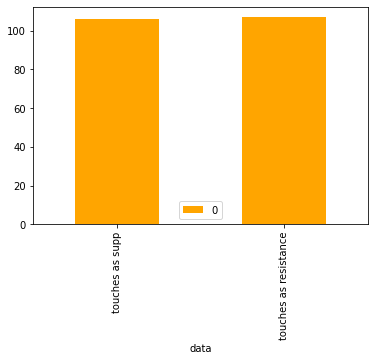

In [ ]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

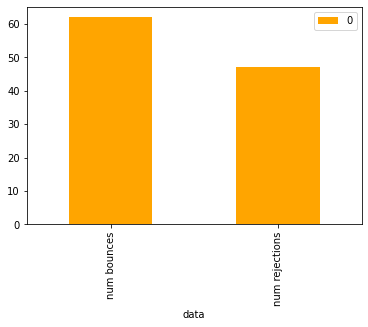

In [ ]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [ ]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

51.173708920187785 %


In [ ]:
df_reactions = pd.DataFrame(reactions)

In [ ]:
df_reactions

0       1     2                       3          4  \
0    58739.46 -214.76   wig 2021-04-01 23:59:59.999     bounce   
1    58739.46 -214.45   wig 2021-04-02 19:59:59.999     bounce   
2    58739.46 -175.46  body 2021-10-27 12:59:59.999     bounce   
3    58739.46 -348.55   wig 2021-10-28 00:59:59.999     bounce   
4    58739.46 -165.39   wig 2021-11-16 12:59:59.999     bounce   
..        ...     ...   ...                     ...        ...   
104  19942.21  171.41  body 2022-09-18 00:59:59.999  rejection   
105  19942.21   68.41  body 2022-10-06 20:59:59.999  rejection   
106  19422.61  102.39  wick 2022-10-10 04:59:59.999  rejection   
107  19422.61   10.82  wick 2022-10-19 00:59:59.999  rejection   
108  19422.61  147.79  body 2022-10-24 00:59:59.999  rejection   

                                                     5  
0    (60200.0, 58524.7, 58883.214199999995, 2021-04...  
1    (59791.72, 58525.01, 58796.085940000004, 2021-...  
2    (59449.0, 58000.0, 58310.086, 2021-10-27 20:59...  
3    (61800.0, 58390.91, 59120.45526, 2021-10-28 20...  
4    (61427.0, 58574.07, 59184.59702, 2021-11-17 00...  
..                                                 ...  
104  (18232.56, 20145.76, 19736.335199999998, 2022-...  
105  (18190.0, 20256.0, 19813.876, 2022-10-14 04:59...  
106  (19107.0, 19525.0, 19435.548, 2022-10-10 16:59...  
107  (18900.0, 19433.43, 19319.27598, 2022-10-20 16...  
108  (19157.0, 19695.0, 19579.868, 2022-10-25 16:59...  

[109 rows x 6 columns]

In [ ]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -214.76       wig 2021-04-01 23:59:59.999     bounce   
1    58739.46     -214.45       wig 2021-04-02 19:59:59.999     bounce   
2    58739.46     -175.46      body 2021-10-27 12:59:59.999     bounce   
3    58739.46     -348.55       wig 2021-10-28 00:59:59.999     bounce   
4    58739.46     -165.39       wig 2021-11-16 12:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
104  19942.21      171.41      body 2022-09-18 00:59:59.999  rejection   
105  19942.21       68.41      body 2022-10-06 20:59:59.999  rejection   
106  19422.61      102.39      wick 2022-10-10 04:59:59.999  rejection   
107  19422.61       10.82      wick 2022-10-19 00:59:59.999  rejection   
108  19422.61      147.79      body 2022-10-24 00:59:59.999  rejection   

                                         reaction_info  
0    (60200.0, 58524.7, 58883.214199999995, 2021-04...  
1    (59791.72, 58525.01, 58796.085940000004, 2021-...  
2    (59449.0, 58000.0, 58310.086, 2021-10-27 20:59...  
3    (61800.0, 58390.91, 59120.45526, 2021-10-28 20...  
4    (61427.0, 58574.07, 59184.59702, 2021-11-17 00...  
..                                                 ...  
104  (18232.56, 20145.76, 19736.335199999998, 2022-...  
105  (18190.0, 20256.0, 19813.876, 2022-10-14 04:59...  
106  (19107.0, 19525.0, 19435.548, 2022-10-10 16:59...  
107  (18900.0, 19433.43, 19319.27598, 2022-10-20 16...  
108  (19157.0, 19695.0, 19579.868, 2022-10-25 16:59...  

[109 rows x 6 columns]

In [ ]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [ ]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -214.76       wig 2021-04-01 23:59:59.999     bounce   
1    58739.46     -214.45       wig 2021-04-02 19:59:59.999     bounce   
2    58739.46     -175.46      body 2021-10-27 12:59:59.999     bounce   
3    58739.46     -348.55       wig 2021-10-28 00:59:59.999     bounce   
4    58739.46     -165.39       wig 2021-11-16 12:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
104  19942.21      171.41      body 2022-09-18 00:59:59.999  rejection   
105  19942.21       68.41      body 2022-10-06 20:59:59.999  rejection   
106  19422.61      102.39      wick 2022-10-10 04:59:59.999  rejection   
107  19422.61       10.82      wick 2022-10-19 00:59:59.999  rejection   
108  19422.61      147.79      body 2022-10-24 00:59:59.999  rejection   

     start_price  last_price           end_of_bounce  
0       58524.70    60200.00 2021-04-02 15:59:59.999  
1       58525.01    59791.72 2021-04-03 19:59:59.999  
2       58000.00    59449.00 2021-10-27 20:59:59.999  
3       58390.91    61800.00 2021-10-28 20:59:59.999  
4       58574.07    61427.00 2021-11-17 00:59:59.999  
..           ...         ...                     ...  
104     20145.76    18232.56 2022-09-21 20:59:59.999  
105     20256.00    18190.00 2022-10-14 04:59:59.999  
106     19525.00    19107.00 2022-10-10 16:59:59.999  
107     19433.43    18900.00 2022-10-20 16:59:59.999  
108     19695.00    19157.00 2022-10-25 16:59:59.999  

[109 rows x 8 columns]

In [ ]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -214.76       wig 2021-04-01 23:59:59.999     bounce   
1    58739.46     -214.45       wig 2021-04-02 19:59:59.999     bounce   
2    58739.46     -175.46      body 2021-10-27 12:59:59.999     bounce   
3    58739.46     -348.55       wig 2021-10-28 00:59:59.999     bounce   
4    58739.46     -165.39       wig 2021-11-16 12:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
104  19942.21      171.41      body 2022-09-18 00:59:59.999  rejection   
105  19942.21       68.41      body 2022-10-06 20:59:59.999  rejection   
106  19422.61      102.39      wick 2022-10-10 04:59:59.999  rejection   
107  19422.61       10.82      wick 2022-10-19 00:59:59.999  rejection   
108  19422.61      147.79      body 2022-10-24 00:59:59.999  rejection   

     start_price  last_price           end_of_bounce  %_of_reaction  
0       58524.70    60200.00 2021-04-02 15:59:59.999      -2.862552  
1       58525.01    59791.72 2021-04-03 19:59:59.999      -2.164391  
2       58000.00    59449.00 2021-10-27 20:59:59.999      -2.498276  
3       58390.91    61800.00 2021-10-28 20:59:59.999      -5.838392  
4       58574.07    61427.00 2021-11-17 00:59:59.999      -4.870636  
..           ...         ...                     ...            ...  
104     20145.76    18232.56 2022-09-21 20:59:59.999       9.496787  
105     20256.00    18190.00 2022-10-14 04:59:59.999      10.199447  
106     19525.00    19107.00 2022-10-10 16:59:59.999       2.140845  
107     19433.43    18900.00 2022-10-20 16:59:59.999       2.744909  
108     19695.00    19157.00 2022-10-25 16:59:59.999       2.731658  

[109 rows x 9 columns]

In [ ]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction
count    109.000000  109.000000    109.000000    109.000000     109.000000
mean   37537.602661  -35.827431  37508.479358  37607.852844       6.394113
std    13827.241459  210.664284  13827.213616  14289.899229      10.433489
min    16541.770000 -401.330000  16499.010000  15476.000000       1.191514
25%    23296.360000 -180.960000  23236.000000  22500.000000       2.469762
50%    38466.900000  -59.310000  38415.400000  39494.350000       3.631876
75%    47100.890000  126.510000  46836.860000  47954.630000       5.394900
max    61299.810000  574.670000  61427.000000  69000.000000      73.688975

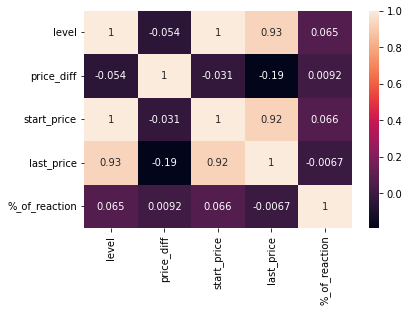

In [ ]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc3fc6dae20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc3fda27400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc3fc6dac70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc3fda279a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc3fda27c70>],
 'means': []}

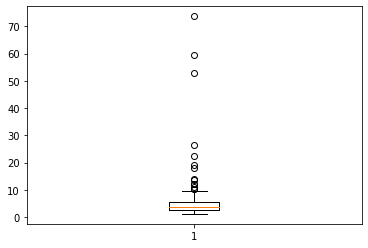

In [ ]:
plt.boxplot(df_reactions["%_of_reaction"])

In [ ]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

38.94137609239982

In [ ]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

4.160477784437573

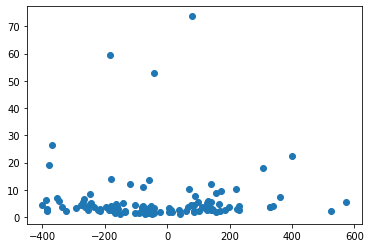

In [ ]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction  \
count    109.000000  109.000000    109.000000    109.000000     109.000000   
mean   37537.602661  -35.827431  37508.479358  37607.852844       6.394113   
std    13827.241459  210.664284  13827.213616  14289.899229      10.433489   
min    16541.770000 -401.330000  16499.010000  15476.000000       1.191514   
25%    23296.360000 -180.960000  23236.000000  22500.000000       2.469762   
50%    38466.900000  -59.310000  38415.400000  39494.350000       3.631876   
75%    47100.890000  126.510000  46836.860000  47954.630000       5.394900   
max    61299.810000  574.670000  61427.000000  69000.000000      73.688975   

       %_diff_of_lvl  
count     109.000000  
mean       -0.090119  
std         0.552543  
min        -0.986751  
25%        -0.528419  
50%        -0.175970  
75%         0.340683  
max         0.978337

## testing the Monthly levels with Z=0.5

### Testing the price action in the 15 minute timeframe

In [ ]:
for stat in Statistics_hfprc:
  print(len(stat))

12
59
422


In [ ]:
from operator import is_
#####real

touches_suppport = []
touches_resistance = []
reactions = []
indexes = []


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_hfprc[0]
testing_price = testing_levels[0]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-1 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

In [ ]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-1 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

In [ ]:
statistics

dates    levels   level_min   level_max  touches as supp  \
0  2021-03-31 23:59:59.999  58739.46  58152.0654  59326.8546               81   
1  2021-09-01 00:59:59.999  47100.89  46629.8811  47571.8989               97   
2  2021-11-01 00:59:59.999  61299.81  60686.8119  61912.8081               22   
3  2022-03-31 23:59:59.999  45510.35  45055.2465  45965.4535                7   
4  2022-08-01 00:59:59.999  23296.36  23063.3964  23529.3236               78   
5  2022-11-01 00:59:59.999  20490.74  20285.8326  20695.6474               19   
6  2021-07-01 00:59:59.999  35045.00  34694.5500  35395.4500               29   
7  2021-10-01 00:59:59.999  43820.01  43381.8099  44258.2101               61   
8  2022-02-01 00:59:59.999  38466.90  38082.2310  38851.5690               59   
9  2022-07-01 00:59:59.999  19942.21  19742.7879  20141.6321               96   
10 2022-10-01 00:59:59.999  19422.61  19228.3839  19616.8361               39   
11 2023-01-01 00:59:59.999  16541.77  16376.3523  16707.1877                2   

    touches as resistance  num bounces  num rejections  
0                      62           21              23  
1                     124           35              30  
2                      27            7               7  
3                      16            2               2  
4                      48           10              25  
5                      18            4               3  
6                      25           12               6  
7                      63           22              19  
8                      89           38              22  
9                      85           30              26  
10                     35           10               8  
11                     10            2               0

In [ ]:
stats = statistics.sum()

<ipython-input-176-ac83d3a43aa2>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
pd.DataFrame(stats).transpose()

levels    level_min    level_max  touches as supp  \
0  429676.11  425379.3489  433972.8711            590.0   

   touches as resistance  num bounces  num rejections  
0                  602.0        193.0           171.0

In [ ]:
st = pd.DataFrame(stats)

In [ ]:
st["data"] = st.index

In [ ]:
st

0                   data
levels                 429676.1100                 levels
level_min              425379.3489              level_min
level_max              433972.8711              level_max
touches as supp           590.0000        touches as supp
touches as resistance     602.0000  touches as resistance
num bounces               193.0000            num bounces
num rejections            171.0000         num rejections

<AxesSubplot:xlabel='data'>

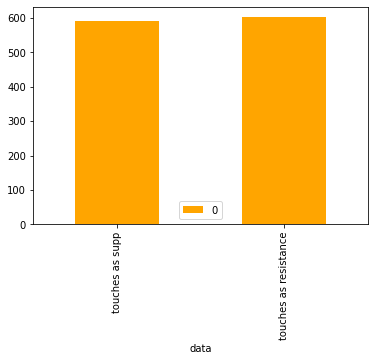

In [ ]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

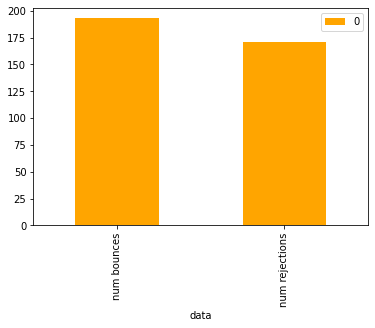

In [ ]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [ ]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

21.39261744966443 %


In [ ]:
df_reactions = pd.DataFrame(reactions)

In [ ]:
df_reactions

0       1     2                       3          4  \
0    58739.46 -239.26   wig 2021-04-01 07:14:59.999     bounce   
1    58739.46 -184.46   wig 2021-04-02 00:44:59.999     bounce   
2    58739.46 -289.35   wig 2021-04-02 21:14:59.999     bounce   
3    58739.46 -206.36   wig 2021-04-05 23:14:59.999     bounce   
4    58739.46 -404.64   wig 2021-04-10 02:29:59.999     bounce   
..        ...     ...   ...                     ...        ...   
250  19422.61   44.37  wick 2022-10-01 01:14:59.999  rejection   
251  19422.61   94.42  wick 2022-10-10 02:44:59.999  rejection   
252  19422.61   55.15  wick 2022-10-14 15:59:59.999  rejection   
253  19422.61  152.73  wick 2022-10-18 15:14:59.999  rejection   
254  19422.61  164.72  wick 2022-10-24 01:29:59.999  rejection   

                                                     5  
0    (59490.0, 58500.2, 58712.017199999995, 2021-04...  
1    (60200.0, 58555.0, 58907.03, 2021-04-02 13:44:...  
2    (59791.72, 58450.11, 58737.21454, 2021-04-03 1...  
3    (59495.24, 58533.1, 58738.99796, 2021-04-06 01...  
4    (61500.0, 58334.82, 59012.16852, 2021-04-10 20...  
..                                                 ...  
250  (18920.35, 19466.98, 19350.00118, 2022-10-03 1...  
251  (19107.0, 19517.03, 19429.28358, 2022-10-10 13...  
252  (18975.18, 19477.76, 19370.207879999998, 2022-...  
253  (18650.0, 19575.34, 19377.31724, 2022-10-23 18...  
254  (19157.0, 19587.33, 19495.239380000003, 2022-1...  

[255 rows x 6 columns]

In [ ]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -239.26       wig 2021-04-01 07:14:59.999     bounce   
1    58739.46     -184.46       wig 2021-04-02 00:44:59.999     bounce   
2    58739.46     -289.35       wig 2021-04-02 21:14:59.999     bounce   
3    58739.46     -206.36       wig 2021-04-05 23:14:59.999     bounce   
4    58739.46     -404.64       wig 2021-04-10 02:29:59.999     bounce   
..        ...         ...       ...                     ...        ...   
250  19422.61       44.37      wick 2022-10-01 01:14:59.999  rejection   
251  19422.61       94.42      wick 2022-10-10 02:44:59.999  rejection   
252  19422.61       55.15      wick 2022-10-14 15:59:59.999  rejection   
253  19422.61      152.73      wick 2022-10-18 15:14:59.999  rejection   
254  19422.61      164.72      wick 2022-10-24 01:29:59.999  rejection   

                                         reaction_info  
0    (59490.0, 58500.2, 58712.017199999995, 2021-04...  
1    (60200.0, 58555.0, 58907.03, 2021-04-02 13:44:...  
2    (59791.72, 58450.11, 58737.21454, 2021-04-03 1...  
3    (59495.24, 58533.1, 58738.99796, 2021-04-06 01...  
4    (61500.0, 58334.82, 59012.16852, 2021-04-10 20...  
..                                                 ...  
250  (18920.35, 19466.98, 19350.00118, 2022-10-03 1...  
251  (19107.0, 19517.03, 19429.28358, 2022-10-10 13...  
252  (18975.18, 19477.76, 19370.207879999998, 2022-...  
253  (18650.0, 19575.34, 19377.31724, 2022-10-23 18...  
254  (19157.0, 19587.33, 19495.239380000003, 2022-1...  

[255 rows x 6 columns]

In [ ]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [ ]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -239.26       wig 2021-04-01 07:14:59.999     bounce   
1    58739.46     -184.46       wig 2021-04-02 00:44:59.999     bounce   
2    58739.46     -289.35       wig 2021-04-02 21:14:59.999     bounce   
3    58739.46     -206.36       wig 2021-04-05 23:14:59.999     bounce   
4    58739.46     -404.64       wig 2021-04-10 02:29:59.999     bounce   
..        ...         ...       ...                     ...        ...   
250  19422.61       44.37      wick 2022-10-01 01:14:59.999  rejection   
251  19422.61       94.42      wick 2022-10-10 02:44:59.999  rejection   
252  19422.61       55.15      wick 2022-10-14 15:59:59.999  rejection   
253  19422.61      152.73      wick 2022-10-18 15:14:59.999  rejection   
254  19422.61      164.72      wick 2022-10-24 01:29:59.999  rejection   

     start_price  last_price           end_of_bounce  
0       58500.20    59490.00 2021-04-01 08:59:59.999  
1       58555.00    60200.00 2021-04-02 13:44:59.999  
2       58450.11    59791.72 2021-04-03 16:14:59.999  
3       58533.10    59495.24 2021-04-06 01:59:59.999  
4       58334.82    61500.00 2021-04-10 20:59:59.999  
..           ...         ...                     ...  
250     19466.98    18920.35 2022-10-03 15:29:59.999  
251     19517.03    19107.00 2022-10-10 13:59:59.999  
252     19477.76    18975.18 2022-10-16 20:59:59.999  
253     19575.34    18650.00 2022-10-23 18:59:59.999  
254     19587.33    19157.00 2022-10-25 14:59:59.999  

[255 rows x 8 columns]

In [ ]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [ ]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction
count    255.000000  255.000000    255.000000    255.000000     255.000000
mean   38386.041608  -14.294314  38374.985647  37994.515412       5.384138
std    13759.857928  267.565114  13774.987401  13987.682802       9.455133
min    16541.770000 -558.050000  16511.960000  15476.000000       1.042076
25%    23296.360000 -225.435000  23281.010000  22659.530000       2.034893
50%    38466.900000  -10.550000  38773.410000  39249.930000       2.809325
75%    47100.890000  178.705000  47103.945000  47614.470000       4.410362
max    61299.810000  584.210000  61850.000000  69000.000000      73.753922

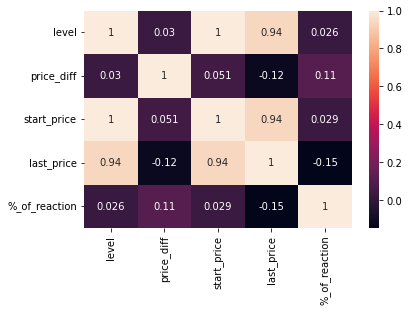

In [ ]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc3fd6b4040>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc3fd6b44c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc3fd6c1d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc3fd6b4a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc3fd6b4d30>],
 'means': []}

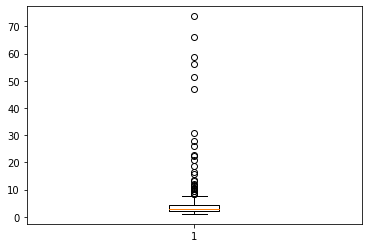

In [ ]:
plt.boxplot(df_reactions["%_of_reaction"])

In [ ]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

40.24326515603189

In [ ]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

3.5115401101681822

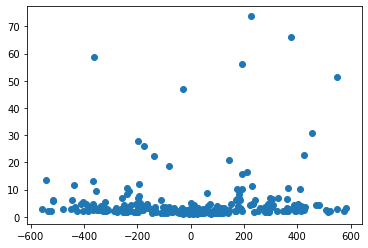

In [ ]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction  \
count    255.000000  255.000000    255.000000    255.000000     255.000000   
mean   38386.041608  -14.294314  38374.985647  37994.515412       5.384138   
std    13759.857928  267.565114  13774.987401  13987.682802       9.455133   
min    16541.770000 -558.050000  16511.960000  15476.000000       1.042076   
25%    23296.360000 -225.435000  23281.010000  22659.530000       2.034893   
50%    38466.900000  -10.550000  38773.410000  39249.930000       2.809325   
75%    47100.890000  178.705000  47103.945000  47614.470000       4.410362   
max    61299.810000  584.210000  61850.000000  69000.000000      73.753922   

       %_diff_of_lvl  
count     255.000000  
mean       -0.044290  
std         0.653043  
min        -0.998681  
25%        -0.683589  
50%        -0.041241  
75%         0.552257  
max         0.998304

### Testing the price action in the 30 minute timeframe

In [ ]:
for stat in Statistics_hfprc:
  print(len(stat))

12
59
422


Reinitializing the statistics table

In [ ]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
#Statistics_oneprc = []

for statistics in Statistics :
  statistics.drop_duplicates(subset=["levels"],inplace = True)
  statistics["level_min"] = statistics.levels * (1-(0.5/100))
  statistics["level_max"] = statistics.levels * (1+(0.5/100))
  statistics["touches as supp"] = [0]*len(statistics)
  statistics["touches as resistance"] = [0]*len(statistics)
  statistics["num bounces"] = [0]*len(statistics)
  statistics["num rejections"] = [0]*len(statistics)


  #print("wow")
  Statistics_hfprc.append(statistics)


Getting reactions for the red candles

In [ ]:
from operator import is_
#####real

touches_suppport = []
touches_resistance = []
reactions = []
indexes = []


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_hfprc[0]
testing_price = testing_levels[1]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [ ]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [ ]:
statistics

dates    levels    level_min    level_max  \
0  2021-03-31 23:59:59.999  58739.46  58445.76270  59033.15730   
1  2021-09-01 00:59:59.999  47100.89  46865.38555  47336.39445   
2  2021-11-01 00:59:59.999  61299.81  60993.31095  61606.30905   
3  2022-03-31 23:59:59.999  45510.35  45282.79825  45737.90175   
4  2022-08-01 00:59:59.999  23296.36  23179.87820  23412.84180   
5  2022-11-01 00:59:59.999  20490.74  20388.28630  20593.19370   
6  2021-07-01 00:59:59.999  35045.00  34869.77500  35220.22500   
7  2021-10-01 00:59:59.999  43820.01  43600.90995  44039.11005   
8  2022-02-01 00:59:59.999  38466.90  38274.56550  38659.23450   
9  2022-07-01 00:59:59.999  19942.21  19842.49895  20041.92105   
10 2022-10-01 00:59:59.999  19422.61  19325.49695  19519.72305   
11 2023-01-01 00:59:59.999  16541.77  16459.06115  16624.47885   

    touches as supp  touches as resistance  num bounces  num rejections  
0                36                     34           21              21  
1                45                     55           33              29  
2                14                     12            2               9  
3                 4                      3            0               2  
4                38                     30           10              15  
5                 9                      9            4               1  
6                 9                     13            6               7  
7                37                     37           22              22  
8                41                     39           24              19  
9                42                     40           22              22  
10               26                     22            8               9  
11                1                      3            1               0

In [ ]:
stats = statistics.sum()

<ipython-input-293-ac83d3a43aa2>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



number of reactions

In [ ]:
len(reactions)

309

In [ ]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  429676.11  427527.72945  431824.49055            302.0   

   touches as resistance  num bounces  num rejections  
0                  297.0        153.0           156.0

In [ ]:
st = pd.DataFrame(stats)

In [ ]:
st["data"] = st.index

In [ ]:
st

0                   data
levels                 429676.11000                 levels
level_min              427527.72945              level_min
level_max              431824.49055              level_max
touches as supp           302.00000        touches as supp
touches as resistance     297.00000  touches as resistance
num bounces               153.00000            num bounces
num rejections            156.00000         num rejections

<AxesSubplot:xlabel='data'>

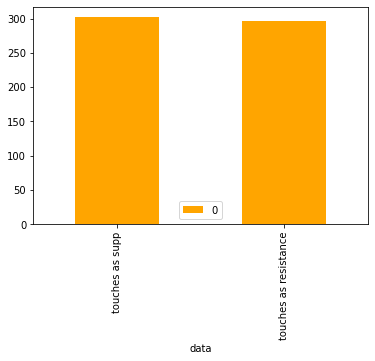

In [ ]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

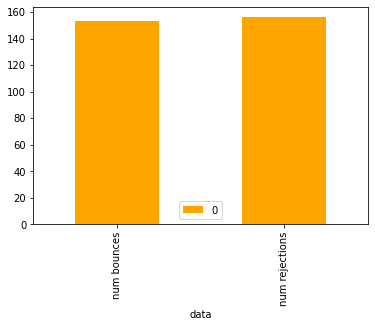

In [ ]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [ ]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

51.58597662771286 %


In [ ]:
df_reactions = pd.DataFrame(reactions)

In [ ]:
df_reactions

0       1     2                       3          4  \
0    58739.46 -103.46   wig 2021-04-01 07:59:59.999     bounce   
1    58739.46 -175.46   wig 2021-04-01 08:59:59.999     bounce   
2    58739.46 -237.83  body 2021-04-01 17:59:59.999     bounce   
3    58739.46 -170.83   wig 2021-04-02 20:59:59.999     bounce   
4    58739.46 -101.67   wig 2021-04-05 17:29:59.999     bounce   
..        ...     ...   ...                     ...        ...   
304  19422.61   91.18  wick 2022-10-13 19:59:59.999  rejection   
305  19422.61   40.54  body 2022-10-14 15:59:59.999  rejection   
306  19422.61   16.79  wick 2022-10-18 18:59:59.999  rejection   
307  19422.61   27.37  wick 2022-10-24 03:29:59.999  rejection   
308  19422.61   21.83  wick 2022-10-24 12:59:59.999  rejection   

                                                     5  
0    (59490.0, 58636.0, 58818.756, 2021-04-01 08:59...  
1    (59256.42, 58564.0, 58712.17788, 2021-04-01 10...  
2    (59069.74, 58317.33, 58478.345740000004, 2021-...  
3    (59791.72, 58568.63, 58830.37126, 2021-04-03 0...  
4    (59100.0, 58637.79, 58736.70294, 2021-04-05 21...  
..                                                 ...  
304  (19311.36, 19513.79, 19470.46998, 2022-10-13 2...  
305  (18975.18, 19545.03, 19423.0821, 2022-10-16 21...  
306  (19091.0, 19439.4, 19364.8424, 2022-10-18 21:5...  
307  (19250.59, 19449.98, 19407.31054, 2022-10-24 1...  
308  (19157.0, 19444.44, 19382.92784, 2022-10-24 20...  

[309 rows x 6 columns]

In [ ]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -103.46       wig 2021-04-01 07:59:59.999     bounce   
1    58739.46     -175.46       wig 2021-04-01 08:59:59.999     bounce   
2    58739.46     -237.83      body 2021-04-01 17:59:59.999     bounce   
3    58739.46     -170.83       wig 2021-04-02 20:59:59.999     bounce   
4    58739.46     -101.67       wig 2021-04-05 17:29:59.999     bounce   
..        ...         ...       ...                     ...        ...   
304  19422.61       91.18      wick 2022-10-13 19:59:59.999  rejection   
305  19422.61       40.54      body 2022-10-14 15:59:59.999  rejection   
306  19422.61       16.79      wick 2022-10-18 18:59:59.999  rejection   
307  19422.61       27.37      wick 2022-10-24 03:29:59.999  rejection   
308  19422.61       21.83      wick 2022-10-24 12:59:59.999  rejection   

                                         reaction_info  
0    (59490.0, 58636.0, 58818.756, 2021-04-01 08:59...  
1    (59256.42, 58564.0, 58712.17788, 2021-04-01 10...  
2    (59069.74, 58317.33, 58478.345740000004, 2021-...  
3    (59791.72, 58568.63, 58830.37126, 2021-04-03 0...  
4    (59100.0, 58637.79, 58736.70294, 2021-04-05 21...  
..                                                 ...  
304  (19311.36, 19513.79, 19470.46998, 2022-10-13 2...  
305  (18975.18, 19545.03, 19423.0821, 2022-10-16 21...  
306  (19091.0, 19439.4, 19364.8424, 2022-10-18 21:5...  
307  (19250.59, 19449.98, 19407.31054, 2022-10-24 1...  
308  (19157.0, 19444.44, 19382.92784, 2022-10-24 20...  

[309 rows x 6 columns]

In [ ]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [ ]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -103.46       wig 2021-04-01 07:59:59.999     bounce   
1    58739.46     -175.46       wig 2021-04-01 08:59:59.999     bounce   
2    58739.46     -237.83      body 2021-04-01 17:59:59.999     bounce   
3    58739.46     -170.83       wig 2021-04-02 20:59:59.999     bounce   
4    58739.46     -101.67       wig 2021-04-05 17:29:59.999     bounce   
..        ...         ...       ...                     ...        ...   
304  19422.61       91.18      wick 2022-10-13 19:59:59.999  rejection   
305  19422.61       40.54      body 2022-10-14 15:59:59.999  rejection   
306  19422.61       16.79      wick 2022-10-18 18:59:59.999  rejection   
307  19422.61       27.37      wick 2022-10-24 03:29:59.999  rejection   
308  19422.61       21.83      wick 2022-10-24 12:59:59.999  rejection   

     start_price  last_price           end_of_bounce  
0       58636.00    59490.00 2021-04-01 08:59:59.999  
1       58564.00    59256.42 2021-04-01 10:29:59.999  
2       58317.33    59069.74 2021-04-02 00:59:59.999  
3       58568.63    59791.72 2021-04-03 08:59:59.999  
4       58637.79    59100.00 2021-04-05 21:29:59.999  
..           ...         ...                     ...  
304     19513.79    19311.36 2022-10-13 21:29:59.999  
305     19545.03    18975.18 2022-10-16 21:29:59.999  
306     19439.40    19091.00 2022-10-18 21:59:59.999  
307     19449.98    19250.59 2022-10-24 11:29:59.999  
308     19444.44    19157.00 2022-10-24 20:29:59.999  

[309 rows x 8 columns]

In [ ]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -103.46       wig 2021-04-01 07:59:59.999     bounce   
1    58739.46     -175.46       wig 2021-04-01 08:59:59.999     bounce   
2    58739.46     -237.83      body 2021-04-01 17:59:59.999     bounce   
3    58739.46     -170.83       wig 2021-04-02 20:59:59.999     bounce   
4    58739.46     -101.67       wig 2021-04-05 17:29:59.999     bounce   
..        ...         ...       ...                     ...        ...   
304  19422.61       91.18      wick 2022-10-13 19:59:59.999  rejection   
305  19422.61       40.54      body 2022-10-14 15:59:59.999  rejection   
306  19422.61       16.79      wick 2022-10-18 18:59:59.999  rejection   
307  19422.61       27.37      wick 2022-10-24 03:29:59.999  rejection   
308  19422.61       21.83      wick 2022-10-24 12:59:59.999  rejection   

     start_price  last_price           end_of_bounce  %_of_reaction  
0       58636.00    59490.00 2021-04-01 08:59:59.999      -1.456443  
1       58564.00    59256.42 2021-04-01 10:29:59.999      -1.182330  
2       58317.33    59069.74 2021-04-02 00:59:59.999      -1.290200  
3       58568.63    59791.72 2021-04-03 08:59:59.999      -2.088302  
4       58637.79    59100.00 2021-04-05 21:29:59.999      -0.788246  
..           ...         ...                     ...            ...  
304     19513.79    19311.36 2022-10-13 21:29:59.999       1.037369  
305     19545.03    18975.18 2022-10-16 21:29:59.999       2.915575  
306     19439.40    19091.00 2022-10-18 21:59:59.999       1.792236  
307     19449.98    19250.59 2022-10-24 11:29:59.999       1.025142  
308     19444.44    19157.00 2022-10-24 20:29:59.999       1.478263  

[309 rows x 9 columns]

In [ ]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction
count    309.000000  309.000000    309.000000    309.000000     309.000000
mean   39156.696861    2.279773  39160.292524  39011.667638       3.059596
std    13734.236520  123.484348  13738.950577  13899.517396       7.131256
min    16541.770000 -292.440000  16508.450000  15476.000000       0.588133
25%    23296.360000  -82.340000  23320.000000  22939.570000       1.051928
50%    43820.010000    2.300000  43636.640000  43105.300000       1.532424
75%    47100.890000   90.690000  47150.480000  47413.930000       2.556535
max    61299.810000  299.160000  61598.970000  69000.000000      73.793277

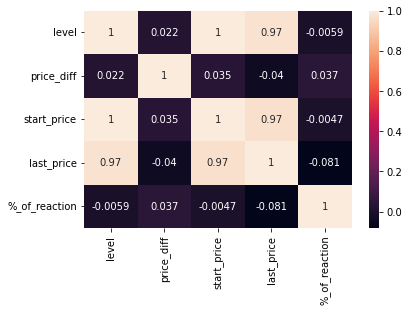

In [ ]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc3f507ad30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc3f5068310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc3f507ab80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc3f50688b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc3f5068bb0>],
 'means': []}

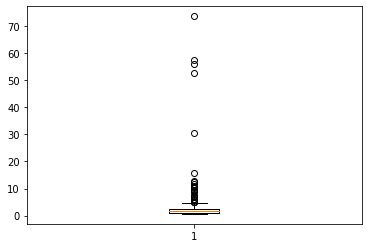

In [ ]:
plt.boxplot(df_reactions["%_of_reaction"])

In [ ]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

54.23298370133972

In [ ]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

2.2179280661852783

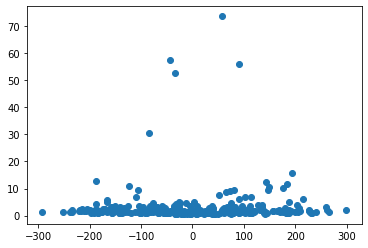

In [ ]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction  \
count    309.000000  309.000000    309.000000    309.000000     309.000000   
mean   39156.696861    2.279773  39160.292524  39011.667638       3.059596   
std    13734.236520  123.484348  13738.950577  13899.517396       7.131256   
min    16541.770000 -292.440000  16508.450000  15476.000000       0.588133   
25%    23296.360000  -82.340000  23320.000000  22939.570000       1.051928   
50%    43820.010000    2.300000  43636.640000  43105.300000       1.532424   
75%    47100.890000   90.690000  47150.480000  47413.930000       2.556535   
max    61299.810000  299.160000  61598.970000  69000.000000      73.793277   

       %_diff_of_lvl  
count     309.000000  
mean        0.004865  
std         0.298869  
min        -0.499795  
25%        -0.281565  
50%         0.003916  
75%         0.262953  
max         0.497675

### Testing the price action in the 1 hour timeframe

Reinitializing the statistics table

In [ ]:
Statistics_hfprc = []
#Statistics_oneprc = []

for statistics in Statistics :
  statistics.drop_duplicates(subset=["levels"],inplace = True)
  statistics["level_min"] = statistics.levels * (1-(0.5/100))
  statistics["level_max"] = statistics.levels * (1+(0.5/100))
  statistics["touches as supp"] = [0]*len(statistics)
  statistics["touches as resistance"] = [0]*len(statistics)
  statistics["num bounces"] = [0]*len(statistics)
  statistics["num rejections"] = [0]*len(statistics)


  #print("wow")
  Statistics_hfprc.append(statistics)


Getting reactions for the red candles

In [ ]:
from operator import is_
#####real

touches_suppport = []
touches_resistance = []
reactions = []
indexes = []


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_oneprc[0]
testing_price = testing_levels[2]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [ ]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [ ]:
statistics

dates    levels    level_min    level_max  \
0  2021-03-31 23:59:59.999  58739.46  58445.76270  59033.15730   
1  2021-09-01 00:59:59.999  47100.89  46865.38555  47336.39445   
2  2021-11-01 00:59:59.999  61299.81  60993.31095  61606.30905   
3  2022-03-31 23:59:59.999  45510.35  45282.79825  45737.90175   
4  2022-08-01 00:59:59.999  23296.36  23179.87820  23412.84180   
5  2022-11-01 00:59:59.999  20490.74  20388.28630  20593.19370   
6  2021-07-01 00:59:59.999  35045.00  34869.77500  35220.22500   
7  2021-10-01 00:59:59.999  43820.01  43600.90995  44039.11005   
8  2022-02-01 00:59:59.999  38466.90  38274.56550  38659.23450   
9  2022-07-01 00:59:59.999  19942.21  19842.49895  20041.92105   
10 2022-10-01 00:59:59.999  19422.61  19325.49695  19519.72305   
11 2023-01-01 00:59:59.999  16541.77  16459.06115  16624.47885   

    touches as supp  touches as resistance  num bounces  num rejections  
0                23                     23           18              13  
1                31                     32           24              24  
2                 9                     12            3               9  
3                 3                      2            1               2  
4                19                     22            9              11  
5                 4                      3            4               2  
6                 7                      9            5               4  
7                22                     22           13              10  
8                29                     26           23              10  
9                28                     25           16              15  
10               14                     15            7               8  
11                1                      2            1               0

In [ ]:
stats = statistics.sum()

<ipython-input-324-ac83d3a43aa2>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



number of reactions

In [ ]:
len(reactions)

232

In [ ]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  429676.11  427527.72945  431824.49055            190.0   

   touches as resistance  num bounces  num rejections  
0                  193.0        124.0           108.0

In [ ]:
st = pd.DataFrame(stats)

In [ ]:
st["data"] = st.index

In [ ]:
st

0                   data
levels                 429676.11000                 levels
level_min              427527.72945              level_min
level_max              431824.49055              level_max
touches as supp           190.00000        touches as supp
touches as resistance     193.00000  touches as resistance
num bounces               124.00000            num bounces
num rejections            108.00000         num rejections

<AxesSubplot:xlabel='data'>

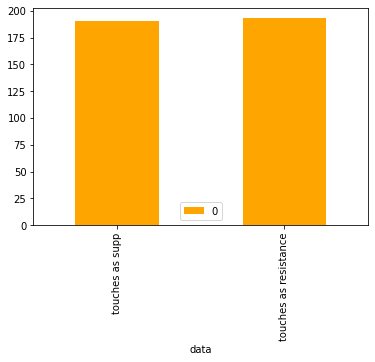

In [ ]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

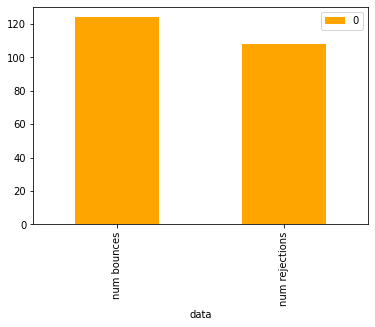

In [ ]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [ ]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

60.574412532637076 %


In [ ]:
df_reactions = pd.DataFrame(reactions)

In [ ]:
df_reactions

0       1     2                       3          4  \
0    58739.46 -155.14  body 2021-04-01 11:59:59.999     bounce   
1    58739.46 -195.30   wig 2021-04-01 21:59:59.999     bounce   
2    58739.46 -170.83   wig 2021-04-02 20:59:59.999     bounce   
3    58739.46   -7.38   wig 2021-04-05 18:59:59.999     bounce   
4    58739.46 -124.18  body 2021-04-10 20:59:59.999     bounce   
..        ...     ...   ...                     ...        ...   
227  19422.61   78.82  body 2022-10-10 02:59:59.999  rejection   
228  19422.61   91.18  wick 2022-10-13 19:59:59.999  rejection   
229  19422.61   19.39  wick 2022-10-18 17:59:59.999  rejection   
230  19422.61   54.84  wick 2022-10-24 03:59:59.999  rejection   
231  19422.61   21.83  wick 2022-10-24 12:59:59.999  rejection   

                                                     5  
0    (59263.3, 58115.0, 58360.7362, 2021-04-01 17:5...  
1    (59069.74, 58544.16, 58656.63412, 2021-04-02 0...  
2    (59531.74, 58568.63, 58774.735539999994, 2021-...  
3    (59089.4, 58732.08, 58808.546480000005, 2021-0...  
4    (64854.0, 58374.61, 59761.19946, 2021-04-17 17...  
..                                                 ...  
227  (19107.0, 19525.0, 19435.548, 2022-10-10 14:59...  
228  (19311.36, 19513.79, 19470.46998, 2022-10-13 2...  
229  (19091.0, 19442.0, 19366.886, 2022-10-18 21:59...  
230  (19250.59, 19477.45, 19428.90196, 2022-10-24 1...  
231  (19157.0, 19444.44, 19382.92784, 2022-10-24 20...  

[232 rows x 6 columns]

In [ ]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -155.14      body 2021-04-01 11:59:59.999     bounce   
1    58739.46     -195.30       wig 2021-04-01 21:59:59.999     bounce   
2    58739.46     -170.83       wig 2021-04-02 20:59:59.999     bounce   
3    58739.46       -7.38       wig 2021-04-05 18:59:59.999     bounce   
4    58739.46     -124.18      body 2021-04-10 20:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
227  19422.61       78.82      body 2022-10-10 02:59:59.999  rejection   
228  19422.61       91.18      wick 2022-10-13 19:59:59.999  rejection   
229  19422.61       19.39      wick 2022-10-18 17:59:59.999  rejection   
230  19422.61       54.84      wick 2022-10-24 03:59:59.999  rejection   
231  19422.61       21.83      wick 2022-10-24 12:59:59.999  rejection   

                                         reaction_info  
0    (59263.3, 58115.0, 58360.7362, 2021-04-01 17:5...  
1    (59069.74, 58544.16, 58656.63412, 2021-04-02 0...  
2    (59531.74, 58568.63, 58774.735539999994, 2021-...  
3    (59089.4, 58732.08, 58808.546480000005, 2021-0...  
4    (64854.0, 58374.61, 59761.19946, 2021-04-17 17...  
..                                                 ...  
227  (19107.0, 19525.0, 19435.548, 2022-10-10 14:59...  
228  (19311.36, 19513.79, 19470.46998, 2022-10-13 2...  
229  (19091.0, 19442.0, 19366.886, 2022-10-18 21:59...  
230  (19250.59, 19477.45, 19428.90196, 2022-10-24 1...  
231  (19157.0, 19444.44, 19382.92784, 2022-10-24 20...  

[232 rows x 6 columns]

In [ ]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [ ]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -155.14      body 2021-04-01 11:59:59.999     bounce   
1    58739.46     -195.30       wig 2021-04-01 21:59:59.999     bounce   
2    58739.46     -170.83       wig 2021-04-02 20:59:59.999     bounce   
3    58739.46       -7.38       wig 2021-04-05 18:59:59.999     bounce   
4    58739.46     -124.18      body 2021-04-10 20:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
227  19422.61       78.82      body 2022-10-10 02:59:59.999  rejection   
228  19422.61       91.18      wick 2022-10-13 19:59:59.999  rejection   
229  19422.61       19.39      wick 2022-10-18 17:59:59.999  rejection   
230  19422.61       54.84      wick 2022-10-24 03:59:59.999  rejection   
231  19422.61       21.83      wick 2022-10-24 12:59:59.999  rejection   

     start_price  last_price           end_of_bounce  
0       58115.00    59263.30 2021-04-01 17:59:59.999  
1       58544.16    59069.74 2021-04-02 00:59:59.999  
2       58568.63    59531.74 2021-04-03 08:59:59.999  
3       58732.08    59089.40 2021-04-05 20:59:59.999  
4       58374.61    64854.00 2021-04-17 17:59:59.999  
..           ...         ...                     ...  
227     19525.00    19107.00 2022-10-10 14:59:59.999  
228     19513.79    19311.36 2022-10-13 21:59:59.999  
229     19442.00    19091.00 2022-10-18 21:59:59.999  
230     19477.45    19250.59 2022-10-24 11:59:59.999  
231     19444.44    19157.00 2022-10-24 20:59:59.999  

[232 rows x 8 columns]

In [ ]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -155.14      body 2021-04-01 11:59:59.999     bounce   
1    58739.46     -195.30       wig 2021-04-01 21:59:59.999     bounce   
2    58739.46     -170.83       wig 2021-04-02 20:59:59.999     bounce   
3    58739.46       -7.38       wig 2021-04-05 18:59:59.999     bounce   
4    58739.46     -124.18      body 2021-04-10 20:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
227  19422.61       78.82      body 2022-10-10 02:59:59.999  rejection   
228  19422.61       91.18      wick 2022-10-13 19:59:59.999  rejection   
229  19422.61       19.39      wick 2022-10-18 17:59:59.999  rejection   
230  19422.61       54.84      wick 2022-10-24 03:59:59.999  rejection   
231  19422.61       21.83      wick 2022-10-24 12:59:59.999  rejection   

     start_price  last_price           end_of_bounce  %_of_reaction  
0       58115.00    59263.30 2021-04-01 17:59:59.999      -1.975910  
1       58544.16    59069.74 2021-04-02 00:59:59.999      -0.897750  
2       58568.63    59531.74 2021-04-03 08:59:59.999      -1.644413  
3       58732.08    59089.40 2021-04-05 20:59:59.999      -0.608390  
4       58374.61    64854.00 2021-04-17 17:59:59.999     -11.099672  
..           ...         ...                     ...            ...  
227     19525.00    19107.00 2022-10-10 14:59:59.999       2.140845  
228     19513.79    19311.36 2022-10-13 21:59:59.999       1.037369  
229     19442.00    19091.00 2022-10-18 21:59:59.999       1.805370  
230     19477.45    19250.59 2022-10-24 11:59:59.999       1.164732  
231     19444.44    19157.00 2022-10-24 20:59:59.999       1.478263  

[232 rows x 9 columns]

In [ ]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction
count    232.000000  232.000000    232.000000    232.000000     232.000000
mean   39058.313578   -0.202845  39065.591810  38833.178448       4.128861
std    14189.130945  120.995653  14211.022954  14419.806890       8.884521
min    16541.770000 -239.460000  16508.450000  15476.000000       0.588133
25%    23296.360000  -82.555000  23243.080000  22870.720000       1.198649
50%    43820.010000  -12.050000  43470.685000  40091.690000       1.725538
75%    47100.890000   91.300000  47278.260000  47501.400000       3.292937
max    61299.810000  300.190000  61660.270000  69000.000000      73.688975

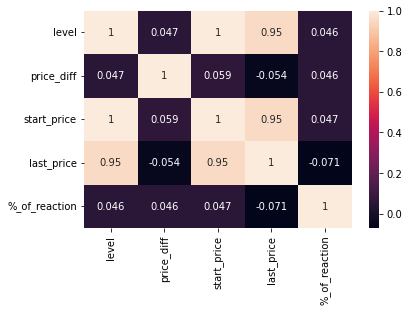

In [ ]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc3fdebdd60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc3fc0b6340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc3fdebdbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc3fc0b68b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc3fc0b6b80>],
 'means': []}

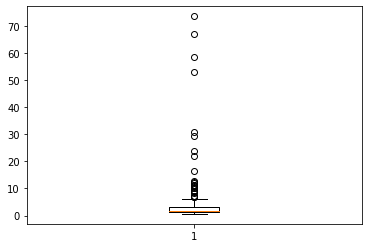

In [ ]:
plt.boxplot(df_reactions["%_of_reaction"])

In [ ]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

44.81939850900386

In [ ]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

2.6756270348891116

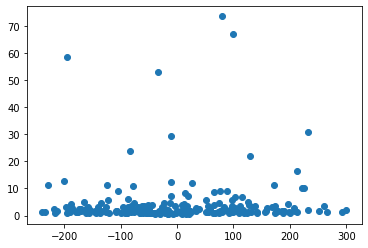

In [ ]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction  \
count    232.000000  232.000000    232.000000    232.000000     232.000000   
mean   39058.313578   -0.202845  39065.591810  38833.178448       4.128861   
std    14189.130945  120.995653  14211.022954  14419.806890       8.884521   
min    16541.770000 -239.460000  16508.450000  15476.000000       0.588133   
25%    23296.360000  -82.555000  23243.080000  22870.720000       1.198649   
50%    43820.010000  -12.050000  43470.685000  40091.690000       1.725538   
75%    47100.890000   91.300000  47278.260000  47501.400000       3.292937   
max    61299.810000  300.190000  61660.270000  69000.000000      73.688975   

       %_diff_of_lvl  
count     232.000000  
mean       -0.003668  
std         0.292533  
min        -0.496805  
25%        -0.266165  
50%        -0.041064  
75%         0.255601  
max         0.497451

### Testing the price action in the 4 hour timeframe

Reinitializing the statistics table

In [ ]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
#Statistics_oneprc = []

for statistics in Statistics :
  statistics.drop_duplicates(subset=["levels"],inplace = True)
  statistics["level_min"] = statistics.levels * (1-(0.5/100))
  statistics["level_max"] = statistics.levels * (1+(0.5/100))
  statistics["touches as supp"] = [0]*len(statistics)
  statistics["touches as resistance"] = [0]*len(statistics)
  statistics["num bounces"] = [0]*len(statistics)
  statistics["num rejections"] = [0]*len(statistics)


  #print("wow")
  Statistics_hfprc.append(statistics)


Getting reactions for the red candles

In [ ]:
from operator import is_
#####real

touches_suppport = []
touches_resistance = []
reactions = []
indexes = []


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_oneprc[0]
testing_price = testing_levels[3]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [ ]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [ ]:
statistics

dates    levels    level_min    level_max  \
0  2021-03-31 23:59:59.999  58739.46  58445.76270  59033.15730   
1  2021-09-01 00:59:59.999  47100.89  46865.38555  47336.39445   
2  2021-11-01 00:59:59.999  61299.81  60993.31095  61606.30905   
3  2022-03-31 23:59:59.999  45510.35  45282.79825  45737.90175   
4  2022-08-01 00:59:59.999  23296.36  23179.87820  23412.84180   
5  2022-11-01 00:59:59.999  20490.74  20388.28630  20593.19370   
6  2021-07-01 00:59:59.999  35045.00  34869.77500  35220.22500   
7  2021-10-01 00:59:59.999  43820.01  43600.90995  44039.11005   
8  2022-02-01 00:59:59.999  38466.90  38274.56550  38659.23450   
9  2022-07-01 00:59:59.999  19942.21  19842.49895  20041.92105   
10 2022-10-01 00:59:59.999  19422.61  19325.49695  19519.72305   
11 2023-01-01 00:59:59.999  16541.77  16459.06115  16624.47885   

    touches as supp  touches as resistance  num bounces  num rejections  
0                 9                     13           10               7  
1                 8                     17            6               8  
2                 2                      5            0               2  
3                 1                      0            0               0  
4                 9                     13            5               6  
5                 2                      1            1               2  
6                 2                      1            1               1  
7                 8                     10            6               7  
8                15                     10           12               6  
9                13                     11            9               8  
10                8                      8            3               4  
11                1                      1            1               0

In [ ]:
stats = statistics.sum()

<ipython-input-355-ac83d3a43aa2>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



number of reactions

In [ ]:
len(reactions)

105

In [ ]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  429676.11  427527.72945  431824.49055             78.0   

   touches as resistance  num bounces  num rejections  
0                   90.0         54.0            51.0

In [ ]:
st = pd.DataFrame(stats)

In [ ]:
st["data"] = st.index

In [ ]:
st

0                   data
levels                 429676.11000                 levels
level_min              427527.72945              level_min
level_max              431824.49055              level_max
touches as supp            78.00000        touches as supp
touches as resistance      90.00000  touches as resistance
num bounces                54.00000            num bounces
num rejections             51.00000         num rejections

<AxesSubplot:xlabel='data'>

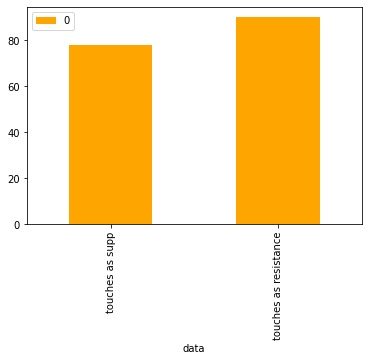

In [ ]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

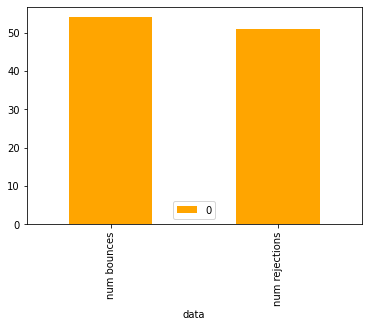

In [ ]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [ ]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

62.5 %


In [ ]:
df_reactions = pd.DataFrame(reactions)

In [ ]:
df_reactions

0       1     2                       3          4  \
0    58739.46 -155.14  body 2021-04-01 11:59:59.999     bounce   
1    58739.46 -214.76   wig 2021-04-01 23:59:59.999     bounce   
2    58739.46 -214.45   wig 2021-04-02 19:59:59.999     bounce   
3    58739.46 -129.46   wig 2021-04-05 19:59:59.999     bounce   
4    58739.46 -175.46  body 2021-10-27 12:59:59.999     bounce   
..        ...     ...   ...                     ...        ...   
100  19942.21   68.41  body 2022-10-06 20:59:59.999  rejection   
101  19422.61   30.38  body 2022-10-10 04:59:59.999  rejection   
102  19422.61   10.82  wick 2022-10-19 00:59:59.999  rejection   
103  19422.61   21.83  wick 2022-10-24 12:59:59.999  rejection   
104  19422.61    2.44  wick 2022-10-24 20:59:59.999  rejection   

                                                     5  
0    (59263.3, 58115.0, 58360.7362, 2021-04-01 19:5...  
1    (60200.0, 58524.7, 58883.214199999995, 2021-04...  
2    (59791.72, 58525.01, 58796.085940000004, 2021-...  
3    (59130.0, 58610.0, 58721.28, 2021-04-06 03:59:...  
4    (59449.0, 58000.0, 58310.086, 2021-10-27 20:59...  
..                                                 ...  
100  (18190.0, 20256.0, 19813.876, 2022-10-14 04:59...  
101  (19107.0, 19525.0, 19435.548, 2022-10-10 16:59...  
102  (18900.0, 19433.43, 19319.27598, 2022-10-20 16...  
103  (19157.0, 19444.44, 19382.92784, 2022-10-24 20...  
104  (19237.0, 19425.05, 19384.8073, 2022-10-25 16:...  

[105 rows x 6 columns]

In [ ]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -155.14      body 2021-04-01 11:59:59.999     bounce   
1    58739.46     -214.76       wig 2021-04-01 23:59:59.999     bounce   
2    58739.46     -214.45       wig 2021-04-02 19:59:59.999     bounce   
3    58739.46     -129.46       wig 2021-04-05 19:59:59.999     bounce   
4    58739.46     -175.46      body 2021-10-27 12:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
100  19942.21       68.41      body 2022-10-06 20:59:59.999  rejection   
101  19422.61       30.38      body 2022-10-10 04:59:59.999  rejection   
102  19422.61       10.82      wick 2022-10-19 00:59:59.999  rejection   
103  19422.61       21.83      wick 2022-10-24 12:59:59.999  rejection   
104  19422.61        2.44      wick 2022-10-24 20:59:59.999  rejection   

                                         reaction_info  
0    (59263.3, 58115.0, 58360.7362, 2021-04-01 19:5...  
1    (60200.0, 58524.7, 58883.214199999995, 2021-04...  
2    (59791.72, 58525.01, 58796.085940000004, 2021-...  
3    (59130.0, 58610.0, 58721.28, 2021-04-06 03:59:...  
4    (59449.0, 58000.0, 58310.086, 2021-10-27 20:59...  
..                                                 ...  
100  (18190.0, 20256.0, 19813.876, 2022-10-14 04:59...  
101  (19107.0, 19525.0, 19435.548, 2022-10-10 16:59...  
102  (18900.0, 19433.43, 19319.27598, 2022-10-20 16...  
103  (19157.0, 19444.44, 19382.92784, 2022-10-24 20...  
104  (19237.0, 19425.05, 19384.8073, 2022-10-25 16:...  

[105 rows x 6 columns]

In [ ]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [ ]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -155.14      body 2021-04-01 11:59:59.999     bounce   
1    58739.46     -214.76       wig 2021-04-01 23:59:59.999     bounce   
2    58739.46     -214.45       wig 2021-04-02 19:59:59.999     bounce   
3    58739.46     -129.46       wig 2021-04-05 19:59:59.999     bounce   
4    58739.46     -175.46      body 2021-10-27 12:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
100  19942.21       68.41      body 2022-10-06 20:59:59.999  rejection   
101  19422.61       30.38      body 2022-10-10 04:59:59.999  rejection   
102  19422.61       10.82      wick 2022-10-19 00:59:59.999  rejection   
103  19422.61       21.83      wick 2022-10-24 12:59:59.999  rejection   
104  19422.61        2.44      wick 2022-10-24 20:59:59.999  rejection   

     start_price  last_price           end_of_bounce  
0       58115.00    59263.30 2021-04-01 19:59:59.999  
1       58524.70    60200.00 2021-04-02 15:59:59.999  
2       58525.01    59791.72 2021-04-03 19:59:59.999  
3       58610.00    59130.00 2021-04-06 03:59:59.999  
4       58000.00    59449.00 2021-10-27 20:59:59.999  
..           ...         ...                     ...  
100     20256.00    18190.00 2022-10-14 04:59:59.999  
101     19525.00    19107.00 2022-10-10 16:59:59.999  
102     19433.43    18900.00 2022-10-20 16:59:59.999  
103     19444.44    19157.00 2022-10-24 20:59:59.999  
104     19425.05    19237.00 2022-10-25 16:59:59.999  

[105 rows x 8 columns]

In [ ]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [ ]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    58739.46     -155.14      body 2021-04-01 11:59:59.999     bounce   
1    58739.46     -214.76       wig 2021-04-01 23:59:59.999     bounce   
2    58739.46     -214.45       wig 2021-04-02 19:59:59.999     bounce   
3    58739.46     -129.46       wig 2021-04-05 19:59:59.999     bounce   
4    58739.46     -175.46      body 2021-10-27 12:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
100  19942.21       68.41      body 2022-10-06 20:59:59.999  rejection   
101  19422.61       30.38      body 2022-10-10 04:59:59.999  rejection   
102  19422.61       10.82      wick 2022-10-19 00:59:59.999  rejection   
103  19422.61       21.83      wick 2022-10-24 12:59:59.999  rejection   
104  19422.61        2.44      wick 2022-10-24 20:59:59.999  rejection   

     start_price  last_price           end_of_bounce  %_of_reaction  
0       58115.00    59263.30 2021-04-01 19:59:59.999      -1.975910  
1       58524.70    60200.00 2021-04-02 15:59:59.999      -2.862552  
2       58525.01    59791.72 2021-04-03 19:59:59.999      -2.164391  
3       58610.00    59130.00 2021-04-06 03:59:59.999      -0.887221  
4       58000.00    59449.00 2021-10-27 20:59:59.999      -2.498276  
..           ...         ...                     ...            ...  
100     20256.00    18190.00 2022-10-14 04:59:59.999      10.199447  
101     19525.00    19107.00 2022-10-10 16:59:59.999       2.140845  
102     19433.43    18900.00 2022-10-20 16:59:59.999       2.744909  
103     19444.44    19157.00 2022-10-24 20:59:59.999       1.478263  
104     19425.05    19237.00 2022-10-25 16:59:59.999       0.968080  

[105 rows x 9 columns]

In [ ]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction
count    105.000000  105.000000    105.000000    105.000000     105.000000
mean   37352.257333   -5.134762  37335.244286  37291.495429       5.198776
std    14442.438457  117.441147  14440.024889  14797.928041      10.708960
min    16541.770000 -252.810000  16499.010000  15476.000000       0.681926
25%    20490.740000  -82.210000  20539.900000  20541.480000       1.566535
50%    38466.900000   -7.010000  38415.400000  39362.080000       2.332391
75%    47100.890000   85.410000  47186.300000  46836.860000       3.635052
max    61299.810000  240.510000  61431.290000  69000.000000      73.688975

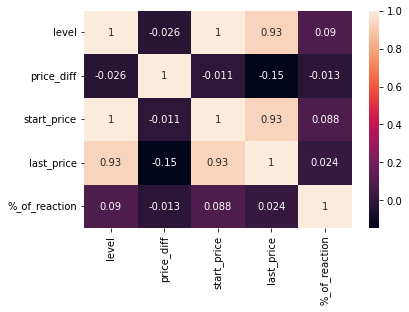

In [ ]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc3fc3d85b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc3fc3d8b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc3fc3d8430>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc3fbf5d160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc3fbf5d430>],
 'means': []}

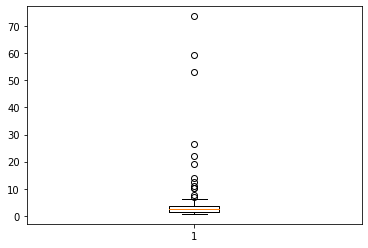

In [ ]:
plt.boxplot(df_reactions["%_of_reaction"])

In [ ]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

42.28897530560457

In [ ]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

2.950885330248654

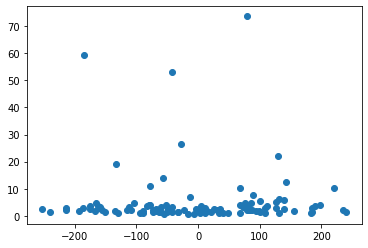

In [ ]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [ ]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [ ]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction  \
count    105.000000  105.000000    105.000000    105.000000     105.000000   
mean   37352.257333   -5.134762  37335.244286  37291.495429       5.198776   
std    14442.438457  117.441147  14440.024889  14797.928041      10.708960   
min    16541.770000 -252.810000  16499.010000  15476.000000       0.681926   
25%    20490.740000  -82.210000  20539.900000  20541.480000       1.566535   
50%    38466.900000   -7.010000  38415.400000  39362.080000       2.332391   
75%    47100.890000   85.410000  47186.300000  46836.860000       3.635052   
max    61299.810000  240.510000  61431.290000  69000.000000      73.688975   

       %_diff_of_lvl  
count     105.000000  
mean       -0.012534  
std         0.290224  
min        -0.488297  
25%        -0.264115  
50%        -0.033743  
75%         0.228183  
max         0.492553

# Weekly levels


## testing the Weekly levels with Z=1

### Testing the price action in the 15 minute timeframe

In [22]:
Z_parameter = [0.5,1]
#Statistics_hfprc = []
Statistics_oneprc = []

for statistics in Statistics :
  statistics.drop_duplicates(subset=["levels"],inplace = True)
  statistics["level_min"] = statistics.levels * (1-(1/100))
  statistics["level_max"] = statistics.levels * (1+(1/100))
  statistics["touches as supp"] = [0]*len(statistics)
  statistics["touches as resistance"] = [0]*len(statistics)
  statistics["num bounces"] = [0]*len(statistics)
  statistics["num rejections"] = [0]*len(statistics)


  #print("wow")
  Statistics_oneprc.append(statistics)


In [23]:
for stat in Statistics_hfprc:
  print(len(stat))

12
59
422


In [24]:
from operator import is_
#####real

touches_suppport = []
touches_resistance = []
reactions = []
indexes = []


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_oneprc[1]
testing_price = testing_levels[0]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-1 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

In [25]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-1 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

In [26]:
statistics

dates    levels   level_min   level_max  touches as supp  \
0  2021-01-11 00:59:59.999  38150.02  37768.5198  38531.5202              116   
1  2021-02-22 00:59:59.999  57412.35  56838.2265  57986.4735              111   
2  2021-03-15 00:59:59.999  58976.08  58386.3192  59565.8408               72   
3  2021-04-11 23:59:59.999  59998.80  59398.8120  60598.7880               24   
4  2021-05-10 00:59:59.999  58240.83  57658.4217  58823.2383               28   
5  2021-06-14 00:59:59.999  39020.56  38630.3544  39410.7656              106   
6  2021-07-05 00:59:59.999  35288.13  34935.2487  35641.0113               16   
7  2021-08-23 00:59:59.999  49239.22  48746.8278  49731.6122               61   
8  2021-09-06 00:59:59.999  51756.88  51239.3112  52274.4488               15   
9  2021-09-20 00:59:59.999  47241.75  46769.3325  47714.1675               66   
10 2021-10-18 00:59:59.999  61528.32  60913.0368  62143.6032               55   
11 2021-11-15 00:59:59.999  65519.11  64863.9189  66174.3011                1   
12 2021-12-13 00:59:59.999  50053.90  49553.3610  50554.4390                3   
13 2021-12-27 00:59:59.999  50775.48  50267.7252  51283.2348                4   
14 2022-01-17 00:59:59.999  43071.66  42640.9434  43502.3766               34   
15 2022-02-07 00:59:59.999  42380.87  41957.0613  42804.6787               39   
16 2022-03-07 00:59:59.999  38420.80  38036.5920  38805.0080               25   
17 2022-03-27 23:59:59.999  46827.76  46359.4824  47296.0376               15   
18 2022-06-06 00:59:59.999  29919.20  29620.0080  30218.3920                5   
19 2022-06-27 00:59:59.999  21038.08  20827.6992  21248.4608               63   
20 2022-07-11 00:59:59.999  20861.11  20652.4989  21069.7211               52   
21 2022-08-01 00:59:59.999  23296.36  23063.3964  23529.3236               65   
22 2022-08-15 00:59:59.999  24305.25  24062.1975  24548.3025               11   
23 2022-09-12 00:59:59.999  21826.87  21608.6013  22045.1387                1   
24 2022-10-10 00:59:59.999  19439.96  19245.5604  19634.3596               23   
25 2022-11-07 00:59:59.999  20905.58  20696.5242  21114.6358               29   
26 2022-12-05 00:59:59.999  17106.65  16935.5835  17277.7165               19   
27 2022-12-26 00:59:59.999  16832.11  16663.7889  17000.4311               26   
28 2023-01-30 00:59:59.999  23743.37  23505.9363  23980.8037                9   
29 2023-02-20 00:59:59.999  24272.51  24029.7849  24515.2351                0   
32 2021-01-25 00:59:59.999  32259.45  31936.8555  32582.0445               48   
33 2021-03-01 00:59:59.999  45134.11  44682.7689  45585.4511               55   
34 2021-03-28 23:59:59.999  55777.65  55219.8735  56335.4265               52   
35 2021-04-26 00:59:59.999  49066.76  48576.0924  49557.4276               79   
36 2021-05-24 00:59:59.999  34681.44  34334.6256  35028.2544               66   
37 2021-06-28 00:59:59.999  34702.49  34355.4651  35049.5149               44   
38 2021-07-19 00:59:59.999  31778.57  31460.7843  32096.3557               19   
39 2021-08-30 00:59:59.999  48767.84  48280.1616  49255.5184               58   
40 2021-09-13 00:59:59.999  46025.23  45564.9777  46485.4823               21   
41 2021-09-27 00:59:59.999  43160.90  42729.2910  43592.5090               65   
42 2021-10-25 00:59:59.999  60852.22  60243.6978  61460.7422               27   
43 2021-12-06 00:59:59.999  49396.32  48902.3568  49890.2832               25   
44 2021-12-20 00:59:59.999  46681.24  46214.4276  47148.0524               32   
45 2022-01-10 00:59:59.999  41864.62  41445.9738  42283.2662               62   
46 2022-01-24 00:59:59.999  36244.55  35882.1045  36606.9955               20   
47 2022-02-28 00:59:59.999  37699.08  37322.0892  38076.0708               10   
48 2022-03-14 00:59:59.999  37777.35  37399.5765  38155.1235                4   
49 2022-05-30 00:59:59.999  29468.10  29173.4190  29762.7810                8   
50 2022-06-20 00:59:59.999  20574.00  20368.2600  20

In [27]:
stats = statistics.sum()

<ipython-input-27-ac83d3a43aa2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats = statistics.sum()


In [28]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  2131697.05  2.110380e+06  2.153014e+06           2139.0   

   touches as resistance  num bounces  num rejections  
0                 2103.0        635.0           613.0

In [29]:
st = pd.DataFrame(stats)

In [30]:
st["data"] = st.index

In [31]:
st

0                   data
levels                 2.131697e+06                 levels
level_min              2.110380e+06              level_min
level_max              2.153014e+06              level_max
touches as supp        2.139000e+03        touches as supp
touches as resistance  2.103000e+03  touches as resistance
num bounces            6.350000e+02            num bounces
num rejections         6.130000e+02         num rejections

Touches as suport :

In [34]:
st[0].iloc[3]

2139.0

Touches as resistance :

In [35]:
st[0].iloc[4]

2103.0

number of bounces :

In [37]:
st[0].iloc[5]

635.0

number of rejections

In [38]:
st[0].iloc[6]

613.0

<AxesSubplot:xlabel='data'>

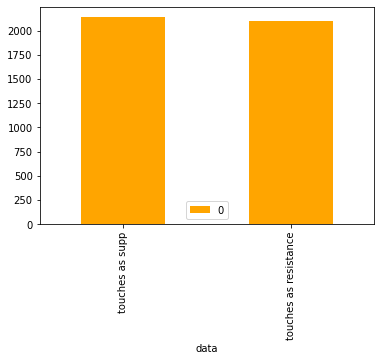

In [39]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

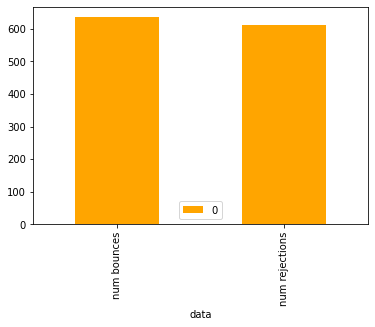

In [40]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [41]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

29.42008486562942 %


In [42]:
df_reactions = pd.DataFrame(reactions)

In [43]:
df_reactions

0       1     2                       3          4  \
0     38150.02 -373.02   wig 2021-01-14 07:59:59.999     bounce   
1     38150.02 -287.98   wig 2021-01-14 10:59:59.999     bounce   
2     38150.02 -222.68  body 2021-01-14 13:29:59.999     bounce   
3     38150.02 -133.85   wig 2021-01-15 10:14:59.999     bounce   
4     38150.02 -350.02   wig 2021-02-04 08:59:59.999     bounce   
...        ...     ...   ...                     ...        ...   
1243  16279.50   35.50  wick 2022-11-22 16:59:59.999  rejection   
1244  16279.50   30.93  wick 2022-11-28 15:44:59.999  rejection   
1245  16739.00    3.63  wick 2022-12-19 16:29:59.999  rejection   
1246  16739.00  129.52  wick 2022-12-22 10:44:59.999  rejection   
1247  16739.00  143.03  wick 2022-12-27 10:59:59.999  rejection   

                                                      5  
0     (38786.1, 37777.0, 37992.9474, 2021-01-14 10:2...  
1     (38622.6, 37862.04, 38024.79984, 2021-01-14 13...  
2     (40100.0, 37707.0, 38219.102, 2021-01-15 06:59...  
3     (38780.0, 38016.17, 38179.62962, 2021-01-15 12...  
4     (38708.27, 37800.0, 37994.36978, 2021-02-04 09...  
...                                                 ...  
1243  (16049.87, 16315.0, 16258.26218, 2022-11-23 01...  
1244  (15995.27, 16310.43, 16242.98576, 2022-11-28 1...  
1245  (16256.3, 16742.63, 16638.55538, 2022-12-20 03...  
1246  (16559.85, 16868.52, 16802.46462, 2022-12-22 2...  
1247  (16333.0, 16882.03, 16764.53758, 2023-01-02 08...  

[1248 rows x 6 columns]

In [44]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     38150.02     -373.02       wig 2021-01-14 07:59:59.999     bounce   
1     38150.02     -287.98       wig 2021-01-14 10:59:59.999     bounce   
2     38150.02     -222.68      body 2021-01-14 13:29:59.999     bounce   
3     38150.02     -133.85       wig 2021-01-15 10:14:59.999     bounce   
4     38150.02     -350.02       wig 2021-02-04 08:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
1243  16279.50       35.50      wick 2022-11-22 16:59:59.999  rejection   
1244  16279.50       30.93      wick 2022-11-28 15:44:59.999  rejection   
1245  16739.00        3.63      wick 2022-12-19 16:29:59.999  rejection   
1246  16739.00      129.52      wick 2022-12-22 10:44:59.999  rejection   
1247  16739.00      143.03      wick 2022-12-27 10:59:59.999  rejection   

                                          reaction_info  
0     (38786.1, 37777.0, 37992.9474, 2021-01-14 10:2...  
1     (38622.6, 37862.04, 38024.79984, 2021-01-14 13...  
2     (40100.0, 37707.0, 38219.102, 2021-01-15 06:59...  
3     (38780.0, 38016.17, 38179.62962, 2021-01-15 12...  
4     (38708.27, 37800.0, 37994.36978, 2021-02-04 09...  
...                                                 ...  
1243  (16049.87, 16315.0, 16258.26218, 2022-11-23 01...  
1244  (15995.27, 16310.43, 16242.98576, 2022-11-28 1...  
1245  (16256.3, 16742.63, 16638.55538, 2022-12-20 03...  
1246  (16559.85, 16868.52, 16802.46462, 2022-12-22 2...  
1247  (16333.0, 16882.03, 16764.53758, 2023-01-02 08...  

[1248 rows x 6 columns]

In [45]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [46]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [47]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     38150.02     -373.02       wig 2021-01-14 07:59:59.999     bounce   
1     38150.02     -287.98       wig 2021-01-14 10:59:59.999     bounce   
2     38150.02     -222.68      body 2021-01-14 13:29:59.999     bounce   
3     38150.02     -133.85       wig 2021-01-15 10:14:59.999     bounce   
4     38150.02     -350.02       wig 2021-02-04 08:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
1243  16279.50       35.50      wick 2022-11-22 16:59:59.999  rejection   
1244  16279.50       30.93      wick 2022-11-28 15:44:59.999  rejection   
1245  16739.00        3.63      wick 2022-12-19 16:29:59.999  rejection   
1246  16739.00      129.52      wick 2022-12-22 10:44:59.999  rejection   
1247  16739.00      143.03      wick 2022-12-27 10:59:59.999  rejection   

      start_price  last_price           end_of_bounce  
0        37777.00    38786.10 2021-01-14 10:29:59.999  
1        37862.04    38622.60 2021-01-14 13:14:59.999  
2        37707.00    40100.00 2021-01-15 06:59:59.999  
3        38016.17    38780.00 2021-01-15 12:14:59.999  
4        37800.00    38708.27 2021-02-04 09:59:59.999  
...           ...         ...                     ...  
1243     16315.00    16049.87 2022-11-23 01:29:59.999  
1244     16310.43    15995.27 2022-11-28 17:59:59.999  
1245     16742.63    16256.30 2022-12-20 03:44:59.999  
1246     16868.52    16559.85 2022-12-22 21:29:59.999  
1247     16882.03    16333.00 2023-01-02 08:29:59.999  

[1248 rows x 8 columns]

In [48]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [49]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [50]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction
count   1248.000000  1248.000000   1248.000000   1248.000000    1248.000000
mean   39785.387204   -10.969984  39769.832732  39616.139808       5.447652
std    12953.783252   260.458668  12956.079507  13332.490440       9.823115
min    16279.500000  -597.680000  16100.000000  15476.000000       1.008081
25%    32259.450000  -201.782500  32038.887500  31153.752500       1.992772
50%    39020.560000    -6.155000  39254.455000  39688.700000       2.761594
75%    49066.760000   189.202500  48981.482500  48447.500000       4.747704
max    65519.110000   587.340000  65946.630000  69000.000000     116.136162

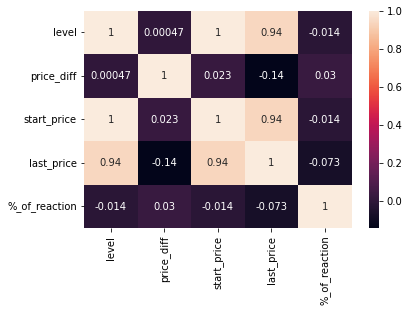

In [53]:
corr_matrix = df_reactions.corr()
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f54f133b4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54f133ba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54f133b1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54f134b040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54f134b310>],
 'means': []}

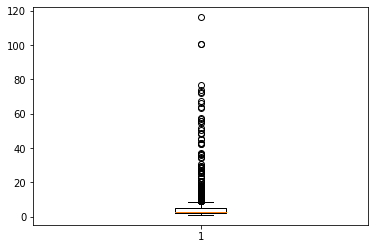

In [54]:
plt.boxplot(df_reactions["%_of_reaction"])

In [55]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

41.0177687381048

In [56]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

3.6197010835607273

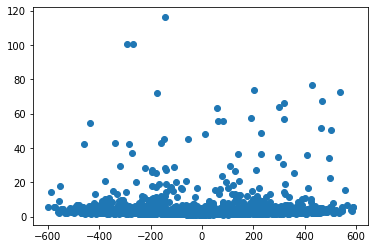

In [57]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [58]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [59]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [60]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction  \
count   1248.000000  1248.000000   1248.000000   1248.000000    1248.000000   
mean   39785.387204   -10.969984  39769.832732  39616.139808       5.447652   
std    12953.783252   260.458668  12956.079507  13332.490440       9.823115   
min    16279.500000  -597.680000  16100.000000  15476.000000       1.008081   
25%    32259.450000  -201.782500  32038.887500  31153.752500       1.992772   
50%    39020.560000    -6.155000  39254.455000  39688.700000       2.761594   
75%    49066.760000   189.202500  48981.482500  48447.500000       4.747704   
max    65519.110000   587.340000  65946.630000  69000.000000     116.136162   

       %_diff_of_lvl  
count    1248.000000  
mean       -0.031909  
std         0.625606  
min        -0.999646  
25%        -0.622407  
50%        -0.019307  
75%         0.539438  
max         0.998676

### Testing the price action in the 30 minute timeframe

In [61]:
for stat in Statistics_hfprc:
  print(len(stat))

12
59
422


Reinitializing the statistics table

In [62]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
Statistics_oneprc = []
for Z in Z_parameter:
  for statistics in Statistics :
    statistics.drop_duplicates(subset=["levels"],inplace = True)
    statistics["level_min"] = statistics.levels * (1-(Z/100))
    statistics["level_max"] = statistics.levels * (1+(Z/100))
    statistics["touches as supp"] = [0]*len(statistics)
    statistics["touches as resistance"] = [0]*len(statistics)
    statistics["num bounces"] = [0]*len(statistics)
    statistics["num rejections"] = [0]*len(statistics)

    if Z == 0.5:
      Statistics_hfprc.append(statistics)
    else :
      Statistics_oneprc.append(statistics)

Getting reactions for the red candles

In [68]:
from operator import is_
#####real

touches_suppport = []
touches_resistance = []
reactions = []
indexes = []


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_oneprc[1]
testing_price = testing_levels[1]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [69]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [70]:
statistics

dates    levels   level_min   level_max  touches as supp  \
0  2021-01-11 00:59:59.999  38150.02  37768.5198  38531.5202               86   
1  2021-02-22 00:59:59.999  57412.35  56838.2265  57986.4735               75   
2  2021-03-15 00:59:59.999  58976.08  58386.3192  59565.8408               44   
3  2021-04-11 23:59:59.999  59998.80  59398.8120  60598.7880               19   
4  2021-05-10 00:59:59.999  58240.83  57658.4217  58823.2383               21   
5  2021-06-14 00:59:59.999  39020.56  38630.3544  39410.7656               67   
6  2021-07-05 00:59:59.999  35288.13  34935.2487  35641.0113               13   
7  2021-08-23 00:59:59.999  49239.22  48746.8278  49731.6122               35   
8  2021-09-06 00:59:59.999  51756.88  51239.3112  52274.4488               12   
9  2021-09-20 00:59:59.999  47241.75  46769.3325  47714.1675               51   
10 2021-10-18 00:59:59.999  61528.32  60913.0368  62143.6032               33   
11 2021-11-15 00:59:59.999  65519.11  64863.9189  66174.3011                1   
12 2021-12-13 00:59:59.999  50053.90  49553.3610  50554.4390                2   
13 2021-12-27 00:59:59.999  50775.48  50267.7252  51283.2348                4   
14 2022-01-17 00:59:59.999  43071.66  42640.9434  43502.3766               27   
15 2022-02-07 00:59:59.999  42380.87  41957.0613  42804.6787               24   
16 2022-03-07 00:59:59.999  38420.80  38036.5920  38805.0080               16   
17 2022-03-27 23:59:59.999  46827.76  46359.4824  47296.0376                9   
18 2022-06-06 00:59:59.999  29919.20  29620.0080  30218.3920                3   
19 2022-06-27 00:59:59.999  21038.08  20827.6992  21248.4608               44   
20 2022-07-11 00:59:59.999  20861.11  20652.4989  21069.7211               36   
21 2022-08-01 00:59:59.999  23296.36  23063.3964  23529.3236               47   
22 2022-08-15 00:59:59.999  24305.25  24062.1975  24548.3025               16   
23 2022-09-12 00:59:59.999  21826.87  21608.6013  22045.1387               11   
24 2022-10-10 00:59:59.999  19439.96  19245.5604  19634.3596               19   
25 2022-11-07 00:59:59.999  20905.58  20696.5242  21114.6358               18   
26 2022-12-05 00:59:59.999  17106.65  16935.5835  17277.7165               14   
27 2022-12-26 00:59:59.999  16832.11  16663.7889  17000.4311               21   
28 2023-01-30 00:59:59.999  23743.37  23505.9363  23980.8037               14   
29 2023-02-20 00:59:59.999  24272.51  24029.7849  24515.2351                7   
32 2021-01-25 00:59:59.999  32259.45  31936.8555  32582.0445               38   
33 2021-03-01 00:59:59.999  45134.11  44682.7689  45585.4511               41   
34 2021-03-28 23:59:59.999  55777.65  55219.8735  56335.4265               33   
35 2021-04-26 00:59:59.999  49066.76  48576.0924  49557.4276               53   
36 2021-05-24 00:59:59.999  34681.44  34334.6256  35028.2544               42   
37 2021-06-28 00:59:59.999  34702.49  34355.4651  35049.5149               29   
38 2021-07-19 00:59:59.999  31778.57  31460.7843  32096.3557               13   
39 2021-08-30 00:59:59.999  48767.84  48280.1616  49255.5184               38   
40 2021-09-13 00:59:59.999  46025.23  45564.9777  46485.4823               18   
41 2021-09-27 00:59:59.999  43160.90  42729.2910  43592.5090               47   
42 2021-10-25 00:59:59.999  60852.22  60243.6978  61460.7422               18   
43 2021-12-06 00:59:59.999  49396.32  48902.3568  49890.2832               19   
44 2021-12-20 00:59:59.999  46681.24  46214.4276  47148.0524               24   
45 2022-01-10 00:59:59.999  41864.62  41445.9738  42283.2662               40   
46 2022-01-24 00:59:59.999  36244.55  35882.1045  36606.9955               15   
47 2022-02-28 00:59:59.999  37699.08  37322.0892  38076.0708                9   
48 2022-03-14 00:59:59.999  37777.35  37399.5765  38155.1235                4   
49 2022-05-30 00:59:59.999  29468.10  29173.4190  29762.7810                5   
50 2022-06-20 00:59:59.999  20574.00  20368.2600  20

In [71]:
stats = statistics.sum()

<ipython-input-71-ac83d3a43aa2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats = statistics.sum()


number of reactions

In [72]:
len(reactions)

1141

In [73]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  2131697.05  2.110380e+06  2.153014e+06           1524.0   

   touches as resistance  num bounces  num rejections  
0                 1417.0        575.0           566.0

In [74]:
st = pd.DataFrame(stats)

In [75]:
st["data"] = st.index

In [76]:
st

0                   data
levels                 2.131697e+06                 levels
level_min              2.110380e+06              level_min
level_max              2.153014e+06              level_max
touches as supp        1.524000e+03        touches as supp
touches as resistance  1.417000e+03  touches as resistance
num bounces            5.750000e+02            num bounces
num rejections         5.660000e+02         num rejections

Touches as support :

In [77]:
st[0].iloc[3]

1524.0

Touches as resistance :

In [78]:
st[0].iloc[4]

1417.0

number of bounces :

In [79]:
st[0].iloc[5]

575.0

number of rejections

In [80]:
st[0].iloc[6]

566.0

<AxesSubplot:xlabel='data'>

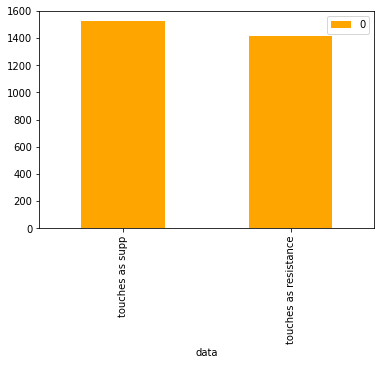

In [81]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

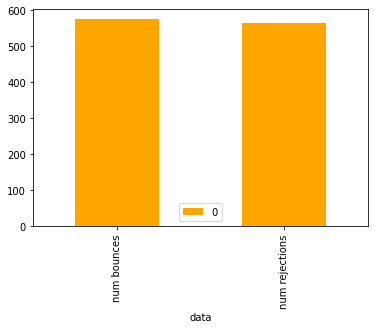

In [82]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [83]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

38.796327779666775 %


In [84]:
df_reactions = pd.DataFrame(reactions)

In [85]:
df_reactions

0       1     2                       3          4  \
0     38150.02 -373.02   wig 2021-01-14 07:59:59.999     bounce   
1     38150.02 -287.98   wig 2021-01-14 10:59:59.999     bounce   
2     38150.02 -350.02   wig 2021-02-04 08:59:59.999     bounce   
3     38150.02 -381.36   wig 2021-02-05 23:59:59.999     bounce   
4     38150.02 -227.02   wig 2021-02-07 05:59:59.999     bounce   
...        ...     ...   ...                     ...        ...   
1136  16739.00   26.71  wick 2022-12-19 15:59:59.999  rejection   
1137  16739.00  129.52  wick 2022-12-22 10:59:59.999  rejection   
1138  16739.00  143.03  wick 2022-12-27 10:59:59.999  rejection   
1139  21782.37  112.62  wick 2023-02-13 08:29:59.999  rejection   
1140  21782.37  114.63  wick 2023-02-14 13:59:59.999  rejection   

                                                      5  
0     (38786.1, 37777.0, 37992.9474, 2021-01-14 10:2...  
1     (38622.6, 37862.04, 38024.79984, 2021-01-14 13...  
2     (38708.27, 37800.0, 37994.36978, 2021-02-04 09...  
3     (40955.51, 37768.66, 38450.6459, 2021-02-07 03...  
4     (39700.0, 37923.0, 38303.278, 2021-02-07 15:29...  
...                                                 ...  
1136  (16256.3, 16765.71, 16656.69626, 2022-12-20 03...  
1137  (16559.85, 16868.52, 16802.46462, 2022-12-22 2...  
1138  (16333.0, 16882.03, 16764.53758, 2023-01-02 08...  
1139  (21351.07, 21894.99, 21778.59112, 2023-02-14 0...  
1140  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  

[1141 rows x 6 columns]

In [86]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     38150.02     -373.02       wig 2021-01-14 07:59:59.999     bounce   
1     38150.02     -287.98       wig 2021-01-14 10:59:59.999     bounce   
2     38150.02     -350.02       wig 2021-02-04 08:59:59.999     bounce   
3     38150.02     -381.36       wig 2021-02-05 23:59:59.999     bounce   
4     38150.02     -227.02       wig 2021-02-07 05:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
1136  16739.00       26.71      wick 2022-12-19 15:59:59.999  rejection   
1137  16739.00      129.52      wick 2022-12-22 10:59:59.999  rejection   
1138  16739.00      143.03      wick 2022-12-27 10:59:59.999  rejection   
1139  21782.37      112.62      wick 2023-02-13 08:29:59.999  rejection   
1140  21782.37      114.63      wick 2023-02-14 13:59:59.999  rejection   

                                          reaction_info  
0     (38786.1, 37777.0, 37992.9474, 2021-01-14 10:2...  
1     (38622.6, 37862.04, 38024.79984, 2021-01-14 13...  
2     (38708.27, 37800.0, 37994.36978, 2021-02-04 09...  
3     (40955.51, 37768.66, 38450.6459, 2021-02-07 03...  
4     (39700.0, 37923.0, 38303.278, 2021-02-07 15:29...  
...                                                 ...  
1136  (16256.3, 16765.71, 16656.69626, 2022-12-20 03...  
1137  (16559.85, 16868.52, 16802.46462, 2022-12-22 2...  
1138  (16333.0, 16882.03, 16764.53758, 2023-01-02 08...  
1139  (21351.07, 21894.99, 21778.59112, 2023-02-14 0...  
1140  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  

[1141 rows x 6 columns]

In [87]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [88]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [89]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     38150.02     -373.02       wig 2021-01-14 07:59:59.999     bounce   
1     38150.02     -287.98       wig 2021-01-14 10:59:59.999     bounce   
2     38150.02     -350.02       wig 2021-02-04 08:59:59.999     bounce   
3     38150.02     -381.36       wig 2021-02-05 23:59:59.999     bounce   
4     38150.02     -227.02       wig 2021-02-07 05:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
1136  16739.00       26.71      wick 2022-12-19 15:59:59.999  rejection   
1137  16739.00      129.52      wick 2022-12-22 10:59:59.999  rejection   
1138  16739.00      143.03      wick 2022-12-27 10:59:59.999  rejection   
1139  21782.37      112.62      wick 2023-02-13 08:29:59.999  rejection   
1140  21782.37      114.63      wick 2023-02-14 13:59:59.999  rejection   

      start_price  last_price           end_of_bounce  
0        37777.00    38786.10 2021-01-14 10:29:59.999  
1        37862.04    38622.60 2021-01-14 13:29:59.999  
2        37800.00    38708.27 2021-02-04 09:59:59.999  
3        37768.66    40955.51 2021-02-07 03:29:59.999  
4        37923.00    39700.00 2021-02-07 15:29:59.999  
...           ...         ...                     ...  
1136     16765.71    16256.30 2022-12-20 03:59:59.999  
1137     16868.52    16559.85 2022-12-22 21:29:59.999  
1138     16882.03    16333.00 2023-01-02 08:29:59.999  
1139     21894.99    21351.07 2023-02-14 00:29:59.999  
1140     21897.00    21532.77 2023-02-14 15:59:59.999  

[1141 rows x 8 columns]

In [90]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [91]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     38150.02     -373.02       wig 2021-01-14 07:59:59.999     bounce   
1     38150.02     -287.98       wig 2021-01-14 10:59:59.999     bounce   
2     38150.02     -350.02       wig 2021-02-04 08:59:59.999     bounce   
3     38150.02     -381.36       wig 2021-02-05 23:59:59.999     bounce   
4     38150.02     -227.02       wig 2021-02-07 05:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
1136  16739.00       26.71      wick 2022-12-19 15:59:59.999  rejection   
1137  16739.00      129.52      wick 2022-12-22 10:59:59.999  rejection   
1138  16739.00      143.03      wick 2022-12-27 10:59:59.999  rejection   
1139  21782.37      112.62      wick 2023-02-13 08:29:59.999  rejection   
1140  21782.37      114.63      wick 2023-02-14 13:59:59.999  rejection   

      start_price  last_price           end_of_bounce  %_of_reaction  
0        37777.00    38786.10 2021-01-14 10:29:59.999      -2.671202  
1        37862.04    38622.60 2021-01-14 13:29:59.999      -2.008767  
2        37800.00    38708.27 2021-02-04 09:59:59.999      -2.402831  
3        37768.66    40955.51 2021-02-07 03:29:59.999      -8.437816  
4        37923.00    39700.00 2021-02-07 15:29:59.999      -4.685811  
...           ...         ...                     ...            ...  
1136     16765.71    16256.30 2022-12-20 03:59:59.999       3.038404  
1137     16868.52    16559.85 2022-12-22 21:29:59.999       1.829858  
1138     16882.03    16333.00 2023-01-02 08:29:59.999       3.252156  
1139     21894.99    21351.07 2023-02-14 00:29:59.999       2.484221  
1140     21897.00    21532.77 2023-02-14 15:59:59.999       1.663379  

[1141 rows x 9 columns]

In [92]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [93]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction
count   1141.000000  1141.000000   1141.000000   1141.000000    1141.000000
mean   39233.362699    -2.240026  39231.621481  39063.850833       5.988834
std    13357.345837   257.997377  13367.070521  13802.433173      10.815527
min    16279.500000  -597.680000  16100.000000  15476.000000       1.046935
25%    24305.250000  -192.770000  24164.100000  24255.000000       2.069131
50%    39020.560000    -1.760000  38965.160000  39450.940000       2.862650
75%    49066.760000   190.010000  48977.650000  48548.260000       4.902843
max    65519.110000   615.280000  66401.820000  69000.000000     116.136162

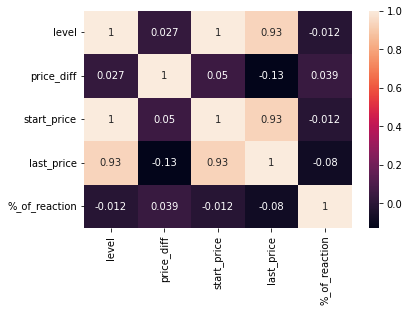

In [94]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f54fe3e0fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54f9df85b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54fe3e0e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54f9df8b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54f9df8e20>],
 'means': []}

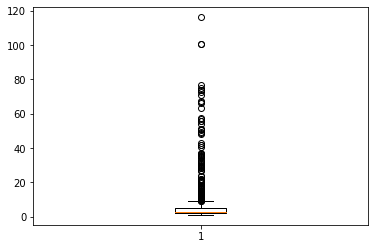

In [95]:
plt.boxplot(df_reactions["%_of_reaction"])

In [96]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

41.66691864309744

In [97]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

3.7277809457160664

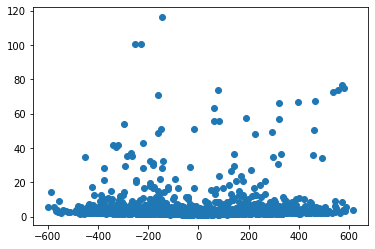

In [98]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [99]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [100]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [101]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction  \
count   1141.000000  1141.000000   1141.000000   1141.000000    1141.000000   
mean   39233.362699    -2.240026  39231.621481  39063.850833       5.988834   
std    13357.345837   257.997377  13367.070521  13802.433173      10.815527   
min    16279.500000  -597.680000  16100.000000  15476.000000       1.046935   
25%    24305.250000  -192.770000  24164.100000  24255.000000       2.069131   
50%    39020.560000    -1.760000  38965.160000  39450.940000       2.862650   
75%    49066.760000   190.010000  48977.650000  48548.260000       4.902843   
max    65519.110000   615.280000  66401.820000  69000.000000     116.136162   

       %_diff_of_lvl  
count    1141.000000  
mean       -0.014016  
std         0.629907  
min        -0.999646  
25%        -0.611773  
50%        -0.003892  
75%         0.567021  
max         0.999995

### Testing the price action in the 1 hour timeframe

Reinitializing the statistics table

In [102]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
Statistics_oneprc = []
for Z in Z_parameter:
  for statistics in Statistics :
    statistics.drop_duplicates(subset=["levels"],inplace = True)
    statistics["level_min"] = statistics.levels * (1-(Z/100))
    statistics["level_max"] = statistics.levels * (1+(Z/100))
    statistics["touches as supp"] = [0]*len(statistics)
    statistics["touches as resistance"] = [0]*len(statistics)
    statistics["num bounces"] = [0]*len(statistics)
    statistics["num rejections"] = [0]*len(statistics)

    if Z == 0.5:
      Statistics_hfprc.append(statistics)
    else :
      Statistics_oneprc.append(statistics)

Getting reactions for the red candles

In [103]:
from operator import is_
#####real




touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_oneprc[1]
testing_price = testing_levels[2]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [104]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [105]:
statistics

dates    levels   level_min   level_max  touches as supp  \
0  2021-01-11 00:59:59.999  38150.02  37768.5198  38531.5202               54   
1  2021-02-22 00:59:59.999  57412.35  56838.2265  57986.4735               47   
2  2021-03-15 00:59:59.999  58976.08  58386.3192  59565.8408               35   
3  2021-04-11 23:59:59.999  59998.80  59398.8120  60598.7880               16   
4  2021-05-10 00:59:59.999  58240.83  57658.4217  58823.2383               16   
5  2021-06-14 00:59:59.999  39020.56  38630.3544  39410.7656               45   
6  2021-07-05 00:59:59.999  35288.13  34935.2487  35641.0113                8   
7  2021-08-23 00:59:59.999  49239.22  48746.8278  49731.6122               22   
8  2021-09-06 00:59:59.999  51756.88  51239.3112  52274.4488                5   
9  2021-09-20 00:59:59.999  47241.75  46769.3325  47714.1675               27   
10 2021-10-18 00:59:59.999  61528.32  60913.0368  62143.6032               24   
11 2021-11-15 00:59:59.999  65519.11  64863.9189  66174.3011                2   
12 2021-12-13 00:59:59.999  50053.90  49553.3610  50554.4390                2   
13 2021-12-27 00:59:59.999  50775.48  50267.7252  51283.2348                3   
14 2022-01-17 00:59:59.999  43071.66  42640.9434  43502.3766               17   
15 2022-02-07 00:59:59.999  42380.87  41957.0613  42804.6787               18   
16 2022-03-07 00:59:59.999  38420.80  38036.5920  38805.0080               14   
17 2022-03-27 23:59:59.999  46827.76  46359.4824  47296.0376                7   
18 2022-06-06 00:59:59.999  29919.20  29620.0080  30218.3920                3   
19 2022-06-27 00:59:59.999  21038.08  20827.6992  21248.4608               25   
20 2022-07-11 00:59:59.999  20861.11  20652.4989  21069.7211               21   
21 2022-08-01 00:59:59.999  23296.36  23063.3964  23529.3236               28   
22 2022-08-15 00:59:59.999  24305.25  24062.1975  24548.3025                8   
23 2022-09-12 00:59:59.999  21826.87  21608.6013  22045.1387                6   
24 2022-10-10 00:59:59.999  19439.96  19245.5604  19634.3596               11   
25 2022-11-07 00:59:59.999  20905.58  20696.5242  21114.6358               10   
26 2022-12-05 00:59:59.999  17106.65  16935.5835  17277.7165               13   
27 2022-12-26 00:59:59.999  16832.11  16663.7889  17000.4311               11   
28 2023-01-30 00:59:59.999  23743.37  23505.9363  23980.8037                8   
29 2023-02-20 00:59:59.999  24272.51  24029.7849  24515.2351                3   
32 2021-01-25 00:59:59.999  32259.45  31936.8555  32582.0445               24   
33 2021-03-01 00:59:59.999  45134.11  44682.7689  45585.4511               27   
34 2021-03-28 23:59:59.999  55777.65  55219.8735  56335.4265               19   
35 2021-04-26 00:59:59.999  49066.76  48576.0924  49557.4276               34   
36 2021-05-24 00:59:59.999  34681.44  34334.6256  35028.2544               26   
37 2021-06-28 00:59:59.999  34702.49  34355.4651  35049.5149               19   
38 2021-07-19 00:59:59.999  31778.57  31460.7843  32096.3557               11   
39 2021-08-30 00:59:59.999  48767.84  48280.1616  49255.5184               29   
40 2021-09-13 00:59:59.999  46025.23  45564.9777  46485.4823               15   
41 2021-09-27 00:59:59.999  43160.90  42729.2910  43592.5090               29   
42 2021-10-25 00:59:59.999  60852.22  60243.6978  61460.7422               14   
43 2021-12-06 00:59:59.999  49396.32  48902.3568  49890.2832               12   
44 2021-12-20 00:59:59.999  46681.24  46214.4276  47148.0524               15   
45 2022-01-10 00:59:59.999  41864.62  41445.9738  42283.2662               25   
46 2022-01-24 00:59:59.999  36244.55  35882.1045  36606.9955               12   
47 2022-02-28 00:59:59.999  37699.08  37322.0892  38076.0708                5   
48 2022-03-14 00:59:59.999  37777.35  37399.5765  38155.1235                4   
49 2022-05-30 00:59:59.999  29468.10  29173.4190  29762.7810                6   
50 2022-06-20 00:59:59.999  20574.00  20368.2600  20

In [106]:
stats = statistics.sum()

<ipython-input-106-ac83d3a43aa2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats = statistics.sum()


number of reactions

In [107]:
len(reactions)

915

In [108]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  2131697.05  2.110380e+06  2.153014e+06            983.0   

   touches as resistance  num bounces  num rejections  
0                  945.0        448.0           467.0

In [109]:
st = pd.DataFrame(stats)

In [110]:
st["data"] = st.index

In [111]:
st

0                   data
levels                 2.131697e+06                 levels
level_min              2.110380e+06              level_min
level_max              2.153014e+06              level_max
touches as supp        9.830000e+02        touches as supp
touches as resistance  9.450000e+02  touches as resistance
num bounces            4.480000e+02            num bounces
num rejections         4.670000e+02         num rejections

Touches as suport :

In [112]:
st[0].iloc[3]

983.0

Touches as resistance :

In [113]:
st[0].iloc[4]

945.0

number of bounces :

In [114]:
st[0].iloc[5]

448.0

number of rejections

In [115]:
st[0].iloc[6]

467.0

<AxesSubplot:xlabel='data'>

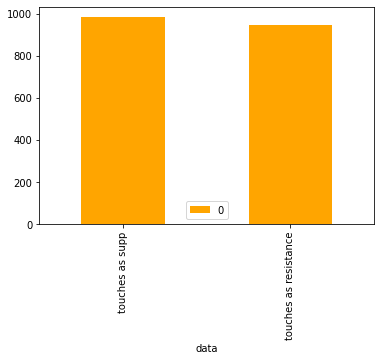

In [116]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

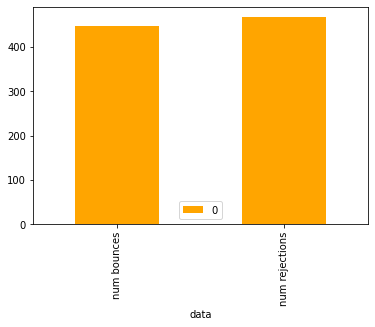

In [117]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [118]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

47.45850622406639 %


In [119]:
df_reactions = pd.DataFrame(reactions)

In [120]:
df_reactions

0       1     2                       3          4  \
0    38150.02 -287.98   wig 2021-01-14 10:59:59.999     bounce   
1    38150.02 -365.90  body 2021-02-05 23:59:59.999     bounce   
2    38150.02 -227.02   wig 2021-02-07 05:59:59.999     bounce   
3    38150.02 -174.02   wig 2021-02-07 20:59:59.999     bounce   
4    38150.02 -161.13   wig 2021-02-08 04:59:59.999     bounce   
..        ...     ...   ...                     ...        ...   
910  16739.00   45.00  wick 2022-12-19 11:59:59.999  rejection   
911  16739.00  129.52  wick 2022-12-22 10:59:59.999  rejection   
912  16739.00  143.03  wick 2022-12-27 10:59:59.999  rejection   
913  21782.37  112.62  wick 2023-02-13 08:59:59.999  rejection   
914  21782.37  114.63  wick 2023-02-14 13:59:59.999  rejection   

                                                     5  
0    (38622.6, 37862.04, 38024.79984, 2021-01-14 13...  
1    (40955.51, 37652.79, 38359.57208, 2021-02-07 0...  
2    (39700.0, 37923.0, 38303.278, 2021-02-07 15:59...  
3    (39130.0, 37976.0, 38222.956, 2021-02-08 03:59...  
4    (64854.0, 37988.89, 43738.023539999995, 2021-0...  
..                                                 ...  
910  (16256.3, 16784.0, 16671.0722, 2022-12-20 03:5...  
911  (16559.85, 16868.52, 16802.46462, 2022-12-22 2...  
912  (16333.0, 16882.03, 16764.53758, 2023-01-02 08...  
913  (21351.07, 21894.99, 21778.59112, 2023-02-14 0...  
914  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  

[915 rows x 6 columns]

In [121]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    38150.02     -287.98       wig 2021-01-14 10:59:59.999     bounce   
1    38150.02     -365.90      body 2021-02-05 23:59:59.999     bounce   
2    38150.02     -227.02       wig 2021-02-07 05:59:59.999     bounce   
3    38150.02     -174.02       wig 2021-02-07 20:59:59.999     bounce   
4    38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
910  16739.00       45.00      wick 2022-12-19 11:59:59.999  rejection   
911  16739.00      129.52      wick 2022-12-22 10:59:59.999  rejection   
912  16739.00      143.03      wick 2022-12-27 10:59:59.999  rejection   
913  21782.37      112.62      wick 2023-02-13 08:59:59.999  rejection   
914  21782.37      114.63      wick 2023-02-14 13:59:59.999  rejection   

                                         reaction_info  
0    (38622.6, 37862.04, 38024.79984, 2021-01-14 13...  
1    (40955.51, 37652.79, 38359.57208, 2021-02-07 0...  
2    (39700.0, 37923.0, 38303.278, 2021-02-07 15:59...  
3    (39130.0, 37976.0, 38222.956, 2021-02-08 03:59...  
4    (64854.0, 37988.89, 43738.023539999995, 2021-0...  
..                                                 ...  
910  (16256.3, 16784.0, 16671.0722, 2022-12-20 03:5...  
911  (16559.85, 16868.52, 16802.46462, 2022-12-22 2...  
912  (16333.0, 16882.03, 16764.53758, 2023-01-02 08...  
913  (21351.07, 21894.99, 21778.59112, 2023-02-14 0...  
914  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  

[915 rows x 6 columns]

In [122]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [123]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [124]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    38150.02     -287.98       wig 2021-01-14 10:59:59.999     bounce   
1    38150.02     -365.90      body 2021-02-05 23:59:59.999     bounce   
2    38150.02     -227.02       wig 2021-02-07 05:59:59.999     bounce   
3    38150.02     -174.02       wig 2021-02-07 20:59:59.999     bounce   
4    38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
910  16739.00       45.00      wick 2022-12-19 11:59:59.999  rejection   
911  16739.00      129.52      wick 2022-12-22 10:59:59.999  rejection   
912  16739.00      143.03      wick 2022-12-27 10:59:59.999  rejection   
913  21782.37      112.62      wick 2023-02-13 08:59:59.999  rejection   
914  21782.37      114.63      wick 2023-02-14 13:59:59.999  rejection   

     start_price  last_price           end_of_bounce  
0       37862.04    38622.60 2021-01-14 13:59:59.999  
1       37652.79    40955.51 2021-02-07 03:59:59.999  
2       37923.00    39700.00 2021-02-07 15:59:59.999  
3       37976.00    39130.00 2021-02-08 03:59:59.999  
4       37988.89    64854.00 2021-05-17 04:59:59.999  
..           ...         ...                     ...  
910     16784.00    16256.30 2022-12-20 03:59:59.999  
911     16868.52    16559.85 2022-12-22 21:59:59.999  
912     16882.03    16333.00 2023-01-02 08:59:59.999  
913     21894.99    21351.07 2023-02-14 00:59:59.999  
914     21897.00    21532.77 2023-02-14 15:59:59.999  

[915 rows x 8 columns]

In [125]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [126]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    38150.02     -287.98       wig 2021-01-14 10:59:59.999     bounce   
1    38150.02     -365.90      body 2021-02-05 23:59:59.999     bounce   
2    38150.02     -227.02       wig 2021-02-07 05:59:59.999     bounce   
3    38150.02     -174.02       wig 2021-02-07 20:59:59.999     bounce   
4    38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
910  16739.00       45.00      wick 2022-12-19 11:59:59.999  rejection   
911  16739.00      129.52      wick 2022-12-22 10:59:59.999  rejection   
912  16739.00      143.03      wick 2022-12-27 10:59:59.999  rejection   
913  21782.37      112.62      wick 2023-02-13 08:59:59.999  rejection   
914  21782.37      114.63      wick 2023-02-14 13:59:59.999  rejection   

     start_price  last_price           end_of_bounce  %_of_reaction  
0       37862.04    38622.60 2021-01-14 13:59:59.999      -2.008767  
1       37652.79    40955.51 2021-02-07 03:59:59.999      -8.771515  
2       37923.00    39700.00 2021-02-07 15:59:59.999      -4.685811  
3       37976.00    39130.00 2021-02-08 03:59:59.999      -3.038761  
4       37988.89    64854.00 2021-05-17 04:59:59.999     -70.718334  
..           ...         ...                     ...            ...  
910     16784.00    16256.30 2022-12-20 03:59:59.999       3.144066  
911     16868.52    16559.85 2022-12-22 21:59:59.999       1.829858  
912     16882.03    16333.00 2023-01-02 08:59:59.999       3.252156  
913     21894.99    21351.07 2023-02-14 00:59:59.999       2.484221  
914     21897.00    21532.77 2023-02-14 15:59:59.999       1.663379  

[915 rows x 9 columns]

In [127]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [128]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction
count    915.000000  915.000000    915.000000    915.000000     915.000000
mean   38917.927705    7.052459  38924.987552  38764.482186       6.100617
std    13313.799862  253.107130  13327.472469  13760.948261      10.551822
min    16279.500000 -597.680000  16100.000000  15476.000000       1.025673
25%    23743.370000 -177.900000  23732.890000  24417.640000       2.131250
50%    39020.560000    4.250000  38886.510000  39299.000000       3.088238
75%    49066.760000  195.630000  48768.130000  48189.840000       5.218331
max    65519.110000  578.620000  66401.820000  69000.000000     116.136162

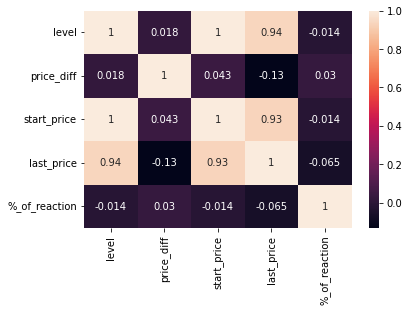

In [129]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f54f9cd9e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54f9cf8460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54f9cd9cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54f9cf8a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54f9cf8cd0>],
 'means': []}

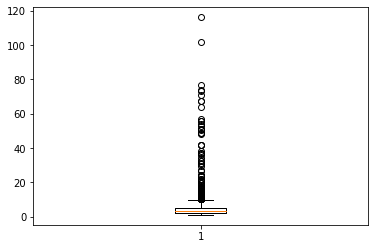

In [130]:
plt.boxplot(df_reactions["%_of_reaction"])

In [131]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

40.94600989843816

In [132]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

3.915191665366842

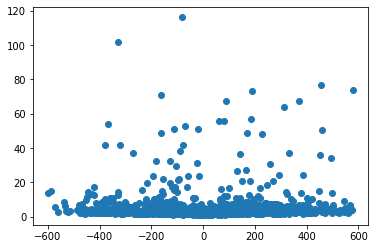

In [133]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [134]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [135]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [136]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction  \
count    915.000000  915.000000    915.000000    915.000000     915.000000   
mean   38917.927705    7.052459  38924.987552  38764.482186       6.100617   
std    13313.799862  253.107130  13327.472469  13760.948261      10.551822   
min    16279.500000 -597.680000  16100.000000  15476.000000       1.025673   
25%    23743.370000 -177.900000  23732.890000  24417.640000       2.131250   
50%    39020.560000    4.250000  38886.510000  39299.000000       3.088238   
75%    49066.760000  195.630000  48768.130000  48189.840000       5.218331   
max    65519.110000  578.620000  66401.820000  69000.000000     116.136162   

       %_diff_of_lvl  
count     915.000000  
mean        0.015924  
std         0.616039  
min        -0.999646  
25%        -0.564573  
50%         0.014962  
75%         0.577587  
max         0.998576

### Testing the price action in the 4 hour timeframe

Reinitializing the statistics table

In [138]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
Statistics_oneprc = []
for Z in Z_parameter:
  for statistics in Statistics :
    statistics.drop_duplicates(subset=["levels"],inplace = True)
    statistics["level_min"] = statistics.levels * (1-(Z/100))
    statistics["level_max"] = statistics.levels * (1+(Z/100))
    statistics["touches as supp"] = [0]*len(statistics)
    statistics["touches as resistance"] = [0]*len(statistics)
    statistics["num bounces"] = [0]*len(statistics)
    statistics["num rejections"] = [0]*len(statistics)

    if Z == 0.5:
      Statistics_hfprc.append(statistics)
    else :
      Statistics_oneprc.append(statistics)

Getting reactions for the red candles

In [139]:
from operator import is_
#####real



touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_oneprc[1]
testing_price = testing_levels[3]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [140]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [142]:
statistics

dates    levels   level_min   level_max  touches as supp  \
0  2021-01-11 00:59:59.999  38150.02  37768.5198  38531.5202               27   
1  2021-02-22 00:59:59.999  57412.35  56838.2265  57986.4735               24   
2  2021-03-15 00:59:59.999  58976.08  58386.3192  59565.8408               12   
3  2021-04-11 23:59:59.999  59998.80  59398.8120  60598.7880                7   
4  2021-05-10 00:59:59.999  58240.83  57658.4217  58823.2383                6   
5  2021-06-14 00:59:59.999  39020.56  38630.3544  39410.7656               18   
6  2021-07-05 00:59:59.999  35288.13  34935.2487  35641.0113                4   
7  2021-08-23 00:59:59.999  49239.22  48746.8278  49731.6122               12   
8  2021-09-06 00:59:59.999  51756.88  51239.3112  52274.4488                3   
9  2021-09-20 00:59:59.999  47241.75  46769.3325  47714.1675               10   
10 2021-10-18 00:59:59.999  61528.32  60913.0368  62143.6032                7   
11 2021-11-15 00:59:59.999  65519.11  64863.9189  66174.3011                1   
12 2021-12-13 00:59:59.999  50053.90  49553.3610  50554.4390                1   
13 2021-12-27 00:59:59.999  50775.48  50267.7252  51283.2348                2   
14 2022-01-17 00:59:59.999  43071.66  42640.9434  43502.3766                9   
15 2022-02-07 00:59:59.999  42380.87  41957.0613  42804.6787                8   
16 2022-03-07 00:59:59.999  38420.80  38036.5920  38805.0080                7   
17 2022-03-27 23:59:59.999  46827.76  46359.4824  47296.0376                6   
18 2022-06-06 00:59:59.999  29919.20  29620.0080  30218.3920                2   
19 2022-06-27 00:59:59.999  21038.08  20827.6992  21248.4608               13   
20 2022-07-11 00:59:59.999  20861.11  20652.4989  21069.7211               10   
21 2022-08-01 00:59:59.999  23296.36  23063.3964  23529.3236               13   
22 2022-08-15 00:59:59.999  24305.25  24062.1975  24548.3025                3   
23 2022-09-12 00:59:59.999  21826.87  21608.6013  22045.1387                3   
24 2022-10-10 00:59:59.999  19439.96  19245.5604  19634.3596                6   
25 2022-11-07 00:59:59.999  20905.58  20696.5242  21114.6358                2   
26 2022-12-05 00:59:59.999  17106.65  16935.5835  17277.7165                9   
27 2022-12-26 00:59:59.999  16832.11  16663.7889  17000.4311                4   
28 2023-01-30 00:59:59.999  23743.37  23505.9363  23980.8037                5   
29 2023-02-20 00:59:59.999  24272.51  24029.7849  24515.2351                1   
32 2021-01-25 00:59:59.999  32259.45  31936.8555  32582.0445                8   
33 2021-03-01 00:59:59.999  45134.11  44682.7689  45585.4511                8   
34 2021-03-28 23:59:59.999  55777.65  55219.8735  56335.4265               12   
35 2021-04-26 00:59:59.999  49066.76  48576.0924  49557.4276               16   
36 2021-05-24 00:59:59.999  34681.44  34334.6256  35028.2544               11   
37 2021-06-28 00:59:59.999  34702.49  34355.4651  35049.5149                7   
38 2021-07-19 00:59:59.999  31778.57  31460.7843  32096.3557                4   
39 2021-08-30 00:59:59.999  48767.84  48280.1616  49255.5184               10   
40 2021-09-13 00:59:59.999  46025.23  45564.9777  46485.4823                7   
41 2021-09-27 00:59:59.999  43160.90  42729.2910  43592.5090               14   
42 2021-10-25 00:59:59.999  60852.22  60243.6978  61460.7422                6   
43 2021-12-06 00:59:59.999  49396.32  48902.3568  49890.2832                5   
44 2021-12-20 00:59:59.999  46681.24  46214.4276  47148.0524                9   
45 2022-01-10 00:59:59.999  41864.62  41445.9738  42283.2662               13   
46 2022-01-24 00:59:59.999  36244.55  35882.1045  36606.9955                5   
47 2022-02-28 00:59:59.999  37699.08  37322.0892  38076.0708                4   
48 2022-03-14 00:59:59.999  37777.35  37399.5765  38155.1235                3   
49 2022-05-30 00:59:59.999  29468.10  29173.4190  29762.7810                3   
50 2022-06-20 00:59:59.999  20574.00  20368.2600  20

In [143]:
stats = statistics.sum()

<ipython-input-143-ac83d3a43aa2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats = statistics.sum()


number of reactions

In [144]:
len(reactions)

507

In [145]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  2131697.05  2.110380e+06  2.153014e+06            458.0   

   touches as resistance  num bounces  num rejections  
0                  462.0        250.0           257.0

In [146]:
st = pd.DataFrame(stats)

In [147]:
st["data"] = st.index

In [148]:
st

0                   data
levels                 2.131697e+06                 levels
level_min              2.110380e+06              level_min
level_max              2.153014e+06              level_max
touches as supp        4.580000e+02        touches as supp
touches as resistance  4.620000e+02  touches as resistance
num bounces            2.500000e+02            num bounces
num rejections         2.570000e+02         num rejections

Touches as suport :

In [150]:
st[0].iloc[3]

458.0

Touches as resistance :

In [151]:
st[0].iloc[4]

462.0

number of bounces :

In [152]:
st[0].iloc[5]

250.0

number of rejections

In [153]:
st[0].iloc[6]

257.0

<AxesSubplot:xlabel='data'>

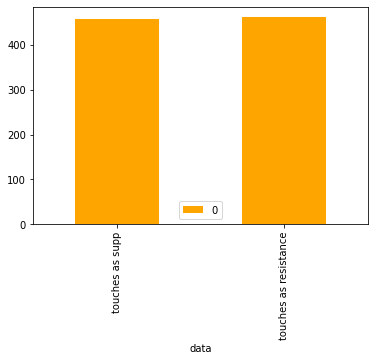

In [154]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

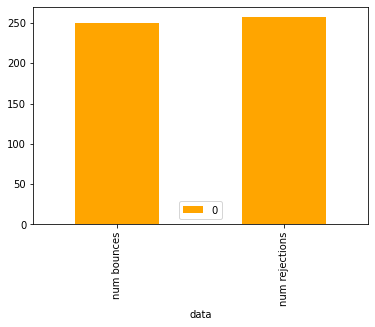

In [155]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [156]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

55.108695652173914 %


In [157]:
df_reactions = pd.DataFrame(reactions)

In [158]:
df_reactions

0       1     2                       3          4  \
0    38150.02 -161.13   wig 2021-02-08 04:59:59.999     bounce   
1    38150.02  -40.02   wig 2021-05-20 20:59:59.999     bounce   
2    38150.02 -349.52   wig 2021-05-25 04:59:59.999     bounce   
3    38150.02 -249.99   wig 2021-05-26 20:59:59.999     bounce   
4    38150.02  -34.01   wig 2021-06-17 00:59:59.999     bounce   
..        ...     ...   ...                     ...        ...   
502  16279.50    4.50  wick 2022-11-21 16:59:59.999  rejection   
503  16279.50  120.19  wick 2022-11-28 20:59:59.999  rejection   
504  16739.00   45.00  wick 2022-12-19 12:59:59.999  rejection   
505  16739.00  129.52  wick 2022-12-22 12:59:59.999  rejection   
506  21782.37  112.62  wick 2023-02-13 08:59:59.999  rejection   

                                                     5  
0    (64854.0, 37988.89, 43738.023539999995, 2021-0...  
1    (42200.0, 38110.0, 38985.26, 2021-05-21 16:59:...  
2    (39200.0, 37800.5, 38099.993, 2021-05-25 12:59...  
3    (39450.69, 37900.03, 38231.87124, 2021-05-27 0...  
4    (39559.88, 38116.01, 38424.99818, 2021-06-17 1...  
..                                                 ...  
502  (15476.0, 16284.0, 16111.088, 2022-11-22 16:59...  
503  (16100.0, 16399.69, 16335.55634, 2022-11-29 08...  
504  (16256.3, 16784.0, 16671.0722, 2022-12-20 04:5...  
505  (16559.85, 16868.52, 16802.46462, 2022-12-23 0...  
506  (21351.07, 21894.99, 21778.59112, 2023-02-14 0...  

[507 rows x 6 columns]

In [159]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
1    38150.02      -40.02       wig 2021-05-20 20:59:59.999     bounce   
2    38150.02     -349.52       wig 2021-05-25 04:59:59.999     bounce   
3    38150.02     -249.99       wig 2021-05-26 20:59:59.999     bounce   
4    38150.02      -34.01       wig 2021-06-17 00:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
502  16279.50        4.50      wick 2022-11-21 16:59:59.999  rejection   
503  16279.50      120.19      wick 2022-11-28 20:59:59.999  rejection   
504  16739.00       45.00      wick 2022-12-19 12:59:59.999  rejection   
505  16739.00      129.52      wick 2022-12-22 12:59:59.999  rejection   
506  21782.37      112.62      wick 2023-02-13 08:59:59.999  rejection   

                                         reaction_info  
0    (64854.0, 37988.89, 43738.023539999995, 2021-0...  
1    (42200.0, 38110.0, 38985.26, 2021-05-21 16:59:...  
2    (39200.0, 37800.5, 38099.993, 2021-05-25 12:59...  
3    (39450.69, 37900.03, 38231.87124, 2021-05-27 0...  
4    (39559.88, 38116.01, 38424.99818, 2021-06-17 1...  
..                                                 ...  
502  (15476.0, 16284.0, 16111.088, 2022-11-22 16:59...  
503  (16100.0, 16399.69, 16335.55634, 2022-11-29 08...  
504  (16256.3, 16784.0, 16671.0722, 2022-12-20 04:5...  
505  (16559.85, 16868.52, 16802.46462, 2022-12-23 0...  
506  (21351.07, 21894.99, 21778.59112, 2023-02-14 0...  

[507 rows x 6 columns]

In [160]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [161]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [162]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
1    38150.02      -40.02       wig 2021-05-20 20:59:59.999     bounce   
2    38150.02     -349.52       wig 2021-05-25 04:59:59.999     bounce   
3    38150.02     -249.99       wig 2021-05-26 20:59:59.999     bounce   
4    38150.02      -34.01       wig 2021-06-17 00:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
502  16279.50        4.50      wick 2022-11-21 16:59:59.999  rejection   
503  16279.50      120.19      wick 2022-11-28 20:59:59.999  rejection   
504  16739.00       45.00      wick 2022-12-19 12:59:59.999  rejection   
505  16739.00      129.52      wick 2022-12-22 12:59:59.999  rejection   
506  21782.37      112.62      wick 2023-02-13 08:59:59.999  rejection   

     start_price  last_price           end_of_bounce  
0       37988.89    64854.00 2021-05-17 04:59:59.999  
1       38110.00    42200.00 2021-05-21 16:59:59.999  
2       37800.50    39200.00 2021-05-25 12:59:59.999  
3       37900.03    39450.69 2021-05-27 04:59:59.999  
4       38116.01    39559.88 2021-06-17 16:59:59.999  
..           ...         ...                     ...  
502     16284.00    15476.00 2022-11-22 16:59:59.999  
503     16399.69    16100.00 2022-11-29 08:59:59.999  
504     16784.00    16256.30 2022-12-20 04:59:59.999  
505     16868.52    16559.85 2022-12-23 00:59:59.999  
506     21894.99    21351.07 2023-02-14 00:59:59.999  

[507 rows x 8 columns]

In [163]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [164]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
1    38150.02      -40.02       wig 2021-05-20 20:59:59.999     bounce   
2    38150.02     -349.52       wig 2021-05-25 04:59:59.999     bounce   
3    38150.02     -249.99       wig 2021-05-26 20:59:59.999     bounce   
4    38150.02      -34.01       wig 2021-06-17 00:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
502  16279.50        4.50      wick 2022-11-21 16:59:59.999  rejection   
503  16279.50      120.19      wick 2022-11-28 20:59:59.999  rejection   
504  16739.00       45.00      wick 2022-12-19 12:59:59.999  rejection   
505  16739.00      129.52      wick 2022-12-22 12:59:59.999  rejection   
506  21782.37      112.62      wick 2023-02-13 08:59:59.999  rejection   

     start_price  last_price           end_of_bounce  %_of_reaction  
0       37988.89    64854.00 2021-05-17 04:59:59.999     -70.718334  
1       38110.00    42200.00 2021-05-21 16:59:59.999     -10.732091  
2       37800.50    39200.00 2021-05-25 12:59:59.999      -3.702332  
3       37900.03    39450.69 2021-05-27 04:59:59.999      -4.091448  
4       38116.01    39559.88 2021-06-17 16:59:59.999      -3.788093  
..           ...         ...                     ...            ...  
502     16284.00    15476.00 2022-11-22 16:59:59.999       4.961926  
503     16399.69    16100.00 2022-11-29 08:59:59.999       1.827413  
504     16784.00    16256.30 2022-12-20 04:59:59.999       3.144066  
505     16868.52    16559.85 2022-12-23 00:59:59.999       1.829858  
506     21894.99    21351.07 2023-02-14 00:59:59.999       2.484221  

[507 rows x 9 columns]

In [165]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [166]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction
count    507.000000  507.000000    507.000000    507.000000     507.000000
mean   38545.746450   -2.974911  38532.141341  38271.185345       7.191717
std    13329.583336  254.243985  13325.441761  13888.464654      11.294107
min    16279.500000 -595.280000  16049.870000  15476.000000       1.142843
25%    23296.360000 -192.480000  23425.220000  22898.895000       2.550048
50%    39020.560000    4.500000  38795.380000  39368.400000       3.702332
75%    48767.840000  170.380000  48578.045000  48189.840000       6.819033
max    65519.110000  576.280000  66401.820000  69000.000000     116.136162

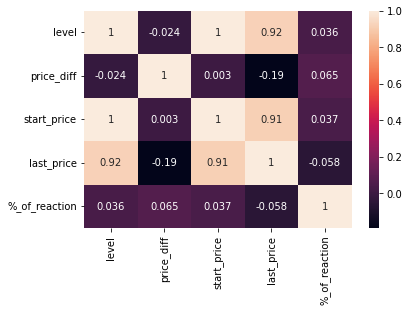

In [167]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f54ff8f7880>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54ff8f7e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54ff8f76d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54fb10e430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54fb10e700>],
 'means': []}

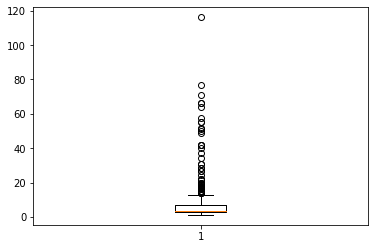

In [168]:
plt.boxplot(df_reactions["%_of_reaction"])

In [169]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

39.31460368120187

In [170]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

4.589009807156576

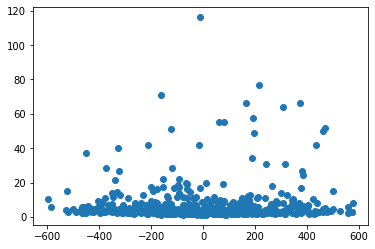

In [171]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [172]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [173]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [174]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction  \
count    507.000000  507.000000    507.000000    507.000000     507.000000   
mean   38545.746450   -2.974911  38532.141341  38271.185345       7.191717   
std    13329.583336  254.243985  13325.441761  13888.464654      11.294107   
min    16279.500000 -595.280000  16049.870000  15476.000000       1.142843   
25%    23296.360000 -192.480000  23425.220000  22898.895000       2.550048   
50%    39020.560000    4.500000  38795.380000  39368.400000       3.702332   
75%    48767.840000  170.380000  48578.045000  48189.840000       6.819033   
max    65519.110000  576.280000  66401.820000  69000.000000     116.136162   

       %_diff_of_lvl  
count     507.000000  
mean        0.000905  
std         0.611837  
min        -0.998691  
25%        -0.575332  
50%         0.012810  
75%         0.575559  
max         0.997037

## testing the Weekly levels with Z=0.5

### Testing the price action in the 15 minute timeframe

In [175]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
#Statistics_oneprc = []

for statistics in Statistics :
  statistics.drop_duplicates(subset=["levels"],inplace = True)
  statistics["level_min"] = statistics.levels * (1-(0.5/100))
  statistics["level_max"] = statistics.levels * (1+(0.5/100))
  statistics["touches as supp"] = [0]*len(statistics)
  statistics["touches as resistance"] = [0]*len(statistics)
  statistics["num bounces"] = [0]*len(statistics)
  statistics["num rejections"] = [0]*len(statistics)


  #print("wow")
  Statistics_hfprc.append(statistics)

In [176]:
for stat in Statistics_hfprc:
  print(len(stat))

12
59
422


In [177]:
from operator import is_
#####real


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_hfprc[1]
testing_price = testing_levels[0]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-1 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

In [178]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-1 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

In [179]:
statistics

dates    levels    level_min    level_max  \
0  2021-01-11 00:59:59.999  38150.02  37959.26990  38340.77010   
1  2021-02-22 00:59:59.999  57412.35  57125.28825  57699.41175   
2  2021-03-15 00:59:59.999  58976.08  58681.19960  59270.96040   
3  2021-04-11 23:59:59.999  59998.80  59698.80600  60298.79400   
4  2021-05-10 00:59:59.999  58240.83  57949.62585  58532.03415   
5  2021-06-14 00:59:59.999  39020.56  38825.45720  39215.66280   
6  2021-07-05 00:59:59.999  35288.13  35111.68935  35464.57065   
7  2021-08-23 00:59:59.999  49239.22  48993.02390  49485.41610   
8  2021-09-06 00:59:59.999  51756.88  51498.09560  52015.66440   
9  2021-09-20 00:59:59.999  47241.75  47005.54125  47477.95875   
10 2021-10-18 00:59:59.999  61528.32  61220.67840  61835.96160   
11 2021-11-15 00:59:59.999  65519.11  65191.51445  65846.70555   
12 2021-12-13 00:59:59.999  50053.90  49803.63050  50304.16950   
13 2021-12-27 00:59:59.999  50775.48  50521.60260  51029.35740   
14 2022-01-17 00:59:59.999  43071.66  42856.30170  43287.01830   
15 2022-02-07 00:59:59.999  42380.87  42168.96565  42592.77435   
16 2022-03-07 00:59:59.999  38420.80  38228.69600  38612.90400   
17 2022-03-27 23:59:59.999  46827.76  46593.62120  47061.89880   
18 2022-06-06 00:59:59.999  29919.20  29769.60400  30068.79600   
19 2022-06-27 00:59:59.999  21038.08  20932.88960  21143.27040   
20 2022-07-11 00:59:59.999  20861.11  20756.80445  20965.41555   
21 2022-08-01 00:59:59.999  23296.36  23179.87820  23412.84180   
22 2022-08-15 00:59:59.999  24305.25  24183.72375  24426.77625   
23 2022-09-12 00:59:59.999  21826.87  21717.73565  21936.00435   
24 2022-10-10 00:59:59.999  19439.96  19342.76020  19537.15980   
25 2022-11-07 00:59:59.999  20905.58  20801.05210  21010.10790   
26 2022-12-05 00:59:59.999  17106.65  17021.11675  17192.18325   
27 2022-12-26 00:59:59.999  16832.11  16747.94945  16916.27055   
28 2023-01-30 00:59:59.999  23743.37  23624.65315  23862.08685   
29 2023-02-20 00:59:59.999  24272.51  24151.14745  24393.87255   
32 2021-01-25 00:59:59.999  32259.45  32098.15275  32420.74725   
33 2021-03-01 00:59:59.999  45134.11  44908.43945  45359.78055   
34 2021-03-28 23:59:59.999  55777.65  55498.76175  56056.53825   
35 2021-04-26 00:59:59.999  49066.76  48821.42620  49312.09380   
36 2021-05-24 00:59:59.999  34681.44  34508.03280  34854.84720   
37 2021-06-28 00:59:59.999  34702.49  34528.97755  34876.00245   
38 2021-07-19 00:59:59.999  31778.57  31619.67715  31937.46285   
39 2021-08-30 00:59:59.999  48767.84  48524.00080  49011.67920   
40 2021-09-13 00:59:59.999  46025.23  45795.10385  46255.35615   
41 2021-09-27 00:59:59.999  43160.90  42945.09550  43376.70450   
42 2021-10-25 00:59:59.999  60852.22  60547.95890  61156.48110   
43 2021-12-06 00:59:59.999  49396.32  49149.33840  49643.30160   
44 2021-12-20 00:59:59.999  46681.24  46447.83380  46914.64620   
45 2022-01-10 00:59:59.999  41864.62  41655.29690  42073.94310   
46 2022-01-24 00:59:59.999  36244.55  36063.32725  36425.77275   
47 2022-02-28 00:59:59.999  37699.08  37510.58460  37887.57540   
48 2022-03-14 00:59:59.999  37777.35  37588.46325  37966.23675   
49 2022-05-30 00:59:59.999  29468.10  29320.75950  29615.44050   
50 2022-06-20 00:59:59.999  20574.00  20471.13000  20676.87000   
51 2022-07-04 00:59:59.999  19315.83  19219.25085  19412.40915   
52 2022-07-18 00:59:59.999  20799.58  20695.58210  20903.57790   
53 2022-08-08 00:59:59.999  23174.39  23058.51805  23290.26195   
54 2022-08-29 00:59:59.999  19555.61  19457.83195  19653.38805   
55 2022-09-26 00:59:59.999  18809.13  18715.08435  18903.17565   
56 2022-10-17 00:59:59.999  19262.98  19166.66510  19359.29490   
57 2022-11-21 00:59:59.999  16279.50  16198.10250  16360.89750   
58 2022-12-19 00:59:59.999  16739.00  16655.30500  16822.69500   
59 2023-01-02 00:59:59.999  16617.17  16534.08415  16700.25585   
60 2023-02-13 00:59:59.999  21782.37  21673.45815  21891.28185   

    touches as supp  touches as resistance  num bounces  num

In [180]:
stats = statistics.sum()

<ipython-input-180-ac83d3a43aa2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats = statistics.sum()


In [181]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  2131697.05  2.121039e+06  2.142356e+06           1945.0   

   touches as resistance  num bounces  num rejections  
0                 1873.0        796.0           869.0

In [182]:
st = pd.DataFrame(stats)

In [183]:
st["data"] = st.index

In [184]:
st

0                   data
levels                 2.131697e+06                 levels
level_min              2.121039e+06              level_min
level_max              2.142356e+06              level_max
touches as supp        1.945000e+03        touches as supp
touches as resistance  1.873000e+03  touches as resistance
num bounces            7.960000e+02            num bounces
num rejections         8.690000e+02         num rejections

Touches as suport :

In [185]:
st[0].iloc[3]

1945.0

Touches as resistance :

In [186]:
st[0].iloc[4]

1873.0

number of bounces :

In [187]:
st[0].iloc[5]

796.0

number of rejections

In [188]:
st[0].iloc[6]

869.0

<AxesSubplot:xlabel='data'>

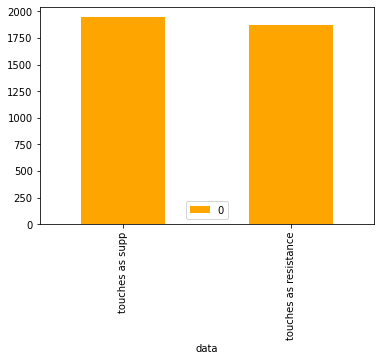

In [189]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

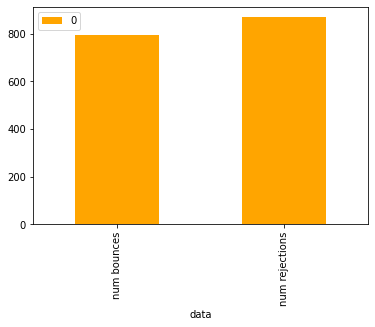

In [190]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [191]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

43.60921948664222 %


In [192]:
df_reactions = pd.DataFrame(reactions)

In [193]:
df_reactions

0       1     2                       3          4  \
0     38150.02  -39.02   wig 2021-01-14 08:59:59.999     bounce   
1     38150.02  -85.55  body 2021-01-14 10:29:59.999     bounce   
2     38150.02 -149.14   wig 2021-01-14 11:44:59.999     bounce   
3     38150.02  -90.02   wig 2021-01-14 12:44:59.999     bounce   
4     38150.02 -133.85   wig 2021-01-15 10:14:59.999     bounce   
...        ...     ...   ...                     ...        ...   
1660  16739.00   50.47  wick 2022-12-22 14:59:59.999  rejection   
1661  16739.00   45.33  wick 2022-12-27 18:14:59.999  rejection   
1662  16739.00   46.19  wick 2022-12-28 16:14:59.999  rejection   
1663  16739.00   60.23  wick 2023-01-02 22:59:59.999  rejection   
1664  16739.00   34.00  wick 2023-01-03 15:44:59.999  rejection   

                                                      5  
0     (38786.1, 38111.0, 38255.4714, 2021-01-14 10:1...  
1     (38371.0, 37955.0, 38044.024, 2021-01-14 10:59...  
2     (38622.6, 38000.88, 38133.92808, 2021-01-14 12...  
3     (38380.0, 38060.0, 38128.48, 2021-01-14 13:14:...  
4     (38780.0, 38016.17, 38179.62962, 2021-01-15 12...  
...                                                 ...  
1660  (16559.85, 16789.47, 16740.33132, 2022-12-22 2...  
1661  (16592.37, 16784.33, 16743.25056, 2022-12-28 0...  
1662  (16333.0, 16785.19, 16688.42134, 2023-01-02 04...  
1663  (16647.81, 16799.23, 16766.82612, 2023-01-03 0...  
1664  (16605.28, 16773.0, 16737.10792, 2023-01-04 02...  

[1665 rows x 6 columns]

In [194]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     38150.02      -39.02       wig 2021-01-14 08:59:59.999     bounce   
1     38150.02      -85.55      body 2021-01-14 10:29:59.999     bounce   
2     38150.02     -149.14       wig 2021-01-14 11:44:59.999     bounce   
3     38150.02      -90.02       wig 2021-01-14 12:44:59.999     bounce   
4     38150.02     -133.85       wig 2021-01-15 10:14:59.999     bounce   
...        ...         ...       ...                     ...        ...   
1660  16739.00       50.47      wick 2022-12-22 14:59:59.999  rejection   
1661  16739.00       45.33      wick 2022-12-27 18:14:59.999  rejection   
1662  16739.00       46.19      wick 2022-12-28 16:14:59.999  rejection   
1663  16739.00       60.23      wick 2023-01-02 22:59:59.999  rejection   
1664  16739.00       34.00      wick 2023-01-03 15:44:59.999  rejection   

                                          reaction_info  
0     (38786.1, 38111.0, 38255.4714, 2021-01-14 10:1...  
1     (38371.0, 37955.0, 38044.024, 2021-01-14 10:59...  
2     (38622.6, 38000.88, 38133.92808, 2021-01-14 12...  
3     (38380.0, 38060.0, 38128.48, 2021-01-14 13:14:...  
4     (38780.0, 38016.17, 38179.62962, 2021-01-15 12...  
...                                                 ...  
1660  (16559.85, 16789.47, 16740.33132, 2022-12-22 2...  
1661  (16592.37, 16784.33, 16743.25056, 2022-12-28 0...  
1662  (16333.0, 16785.19, 16688.42134, 2023-01-02 04...  
1663  (16647.81, 16799.23, 16766.82612, 2023-01-03 0...  
1664  (16605.28, 16773.0, 16737.10792, 2023-01-04 02...  

[1665 rows x 6 columns]

In [195]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [196]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [197]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     38150.02      -39.02       wig 2021-01-14 08:59:59.999     bounce   
1     38150.02      -85.55      body 2021-01-14 10:29:59.999     bounce   
2     38150.02     -149.14       wig 2021-01-14 11:44:59.999     bounce   
3     38150.02      -90.02       wig 2021-01-14 12:44:59.999     bounce   
4     38150.02     -133.85       wig 2021-01-15 10:14:59.999     bounce   
...        ...         ...       ...                     ...        ...   
1660  16739.00       50.47      wick 2022-12-22 14:59:59.999  rejection   
1661  16739.00       45.33      wick 2022-12-27 18:14:59.999  rejection   
1662  16739.00       46.19      wick 2022-12-28 16:14:59.999  rejection   
1663  16739.00       60.23      wick 2023-01-02 22:59:59.999  rejection   
1664  16739.00       34.00      wick 2023-01-03 15:44:59.999  rejection   

      start_price  last_price           end_of_bounce  
0        38111.00    38786.10 2021-01-14 10:14:59.999  
1        37955.00    38371.00 2021-01-14 10:59:59.999  
2        38000.88    38622.60 2021-01-14 12:29:59.999  
3        38060.00    38380.00 2021-01-14 13:14:59.999  
4        38016.17    38780.00 2021-01-15 12:14:59.999  
...           ...         ...                     ...  
1660     16789.47    16559.85 2022-12-22 21:29:59.999  
1661     16784.33    16592.37 2022-12-28 02:44:59.999  
1662     16785.19    16333.00 2023-01-02 04:59:59.999  
1663     16799.23    16647.81 2023-01-03 07:44:59.999  
1664     16773.00    16605.28 2023-01-04 02:29:59.999  

[1665 rows x 8 columns]

In [198]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [199]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [200]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction
count   1665.000000  1665.000000   1665.000000   1665.000000    1665.000000
mean   39684.726679     0.885099  39683.974643  39600.435610       3.262686
std    13160.187740   130.743867  13162.398214  13344.023409       7.558808
min    16279.500000  -298.800000  16256.300000  15476.000000       0.537088
25%    31778.570000   -98.430000  31854.770000  30200.000000       1.074443
50%    39020.560000     9.460000  39251.570000  39920.000000       1.565896
75%    49066.760000    96.880000  49009.140000  48555.000000       2.681772
max    65519.110000   317.800000  65946.630000  69000.000000     116.136162

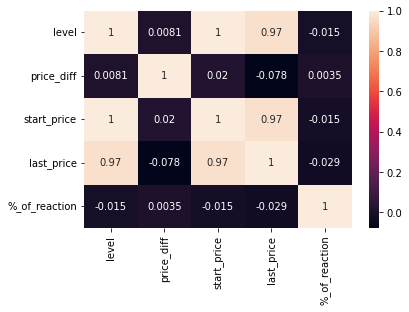

In [201]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f54f84a8bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54f934d190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54f84a8a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54f934d730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54f934da00>],
 'means': []}

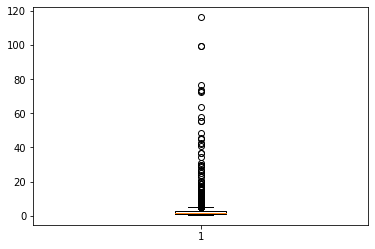

In [202]:
plt.boxplot(df_reactions["%_of_reaction"])

In [203]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

42.113798414252585

In [204]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

2.3063508942692734

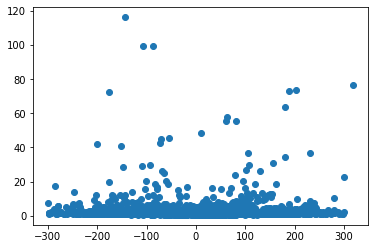

In [205]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [206]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [207]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [208]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction  \
count   1665.000000  1665.000000   1665.000000   1665.000000    1665.000000   
mean   39684.726679     0.885099  39683.974643  39600.435610       3.262686   
std    13160.187740   130.743867  13162.398214  13344.023409       7.558808   
min    16279.500000  -298.800000  16256.300000  15476.000000       0.537088   
25%    31778.570000   -98.430000  31854.770000  30200.000000       1.074443   
50%    39020.560000     9.460000  39251.570000  39920.000000       1.565896   
75%    49066.760000    96.880000  49009.140000  48555.000000       2.681772   
max    65519.110000   317.800000  65946.630000  69000.000000     116.136162   

       %_diff_of_lvl  
count    1665.000000  
mean        0.001293  
std         0.311036  
min        -0.499704  
25%        -0.294649  
50%         0.025202  
75%         0.285269  
max         0.499810

### Testing the price action in the 30 minute timeframe

In [213]:
for stat in Statistics_hfprc:
  print(len(stat))

12
59
422


Reinitializing the statistics table

In [214]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
#Statistics_oneprc = []

for statistics in Statistics :
  statistics.drop_duplicates(subset=["levels"],inplace = True)
  statistics["level_min"] = statistics.levels * (1-(0.5/100))
  statistics["level_max"] = statistics.levels * (1+(0.5/100))
  statistics["touches as supp"] = [0]*len(statistics)
  statistics["touches as resistance"] = [0]*len(statistics)
  statistics["num bounces"] = [0]*len(statistics)
  statistics["num rejections"] = [0]*len(statistics)


  #print("wow")
  Statistics_hfprc.append(statistics)


Getting reactions for the red candles

In [215]:
from operator import is_
#####real

touches_suppport = []
touches_resistance = []
reactions = []
indexes = []


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_hfprc[1]
testing_price = testing_levels[1]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [216]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [217]:
statistics

dates    levels    level_min    level_max  \
0  2021-01-11 00:59:59.999  38150.02  37959.26990  38340.77010   
1  2021-02-22 00:59:59.999  57412.35  57125.28825  57699.41175   
2  2021-03-15 00:59:59.999  58976.08  58681.19960  59270.96040   
3  2021-04-11 23:59:59.999  59998.80  59698.80600  60298.79400   
4  2021-05-10 00:59:59.999  58240.83  57949.62585  58532.03415   
5  2021-06-14 00:59:59.999  39020.56  38825.45720  39215.66280   
6  2021-07-05 00:59:59.999  35288.13  35111.68935  35464.57065   
7  2021-08-23 00:59:59.999  49239.22  48993.02390  49485.41610   
8  2021-09-06 00:59:59.999  51756.88  51498.09560  52015.66440   
9  2021-09-20 00:59:59.999  47241.75  47005.54125  47477.95875   
10 2021-10-18 00:59:59.999  61528.32  61220.67840  61835.96160   
11 2021-11-15 00:59:59.999  65519.11  65191.51445  65846.70555   
12 2021-12-13 00:59:59.999  50053.90  49803.63050  50304.16950   
13 2021-12-27 00:59:59.999  50775.48  50521.60260  51029.35740   
14 2022-01-17 00:59:59.999  43071.66  42856.30170  43287.01830   
15 2022-02-07 00:59:59.999  42380.87  42168.96565  42592.77435   
16 2022-03-07 00:59:59.999  38420.80  38228.69600  38612.90400   
17 2022-03-27 23:59:59.999  46827.76  46593.62120  47061.89880   
18 2022-06-06 00:59:59.999  29919.20  29769.60400  30068.79600   
19 2022-06-27 00:59:59.999  21038.08  20932.88960  21143.27040   
20 2022-07-11 00:59:59.999  20861.11  20756.80445  20965.41555   
21 2022-08-01 00:59:59.999  23296.36  23179.87820  23412.84180   
22 2022-08-15 00:59:59.999  24305.25  24183.72375  24426.77625   
23 2022-09-12 00:59:59.999  21826.87  21717.73565  21936.00435   
24 2022-10-10 00:59:59.999  19439.96  19342.76020  19537.15980   
25 2022-11-07 00:59:59.999  20905.58  20801.05210  21010.10790   
26 2022-12-05 00:59:59.999  17106.65  17021.11675  17192.18325   
27 2022-12-26 00:59:59.999  16832.11  16747.94945  16916.27055   
28 2023-01-30 00:59:59.999  23743.37  23624.65315  23862.08685   
29 2023-02-20 00:59:59.999  24272.51  24151.14745  24393.87255   
32 2021-01-25 00:59:59.999  32259.45  32098.15275  32420.74725   
33 2021-03-01 00:59:59.999  45134.11  44908.43945  45359.78055   
34 2021-03-28 23:59:59.999  55777.65  55498.76175  56056.53825   
35 2021-04-26 00:59:59.999  49066.76  48821.42620  49312.09380   
36 2021-05-24 00:59:59.999  34681.44  34508.03280  34854.84720   
37 2021-06-28 00:59:59.999  34702.49  34528.97755  34876.00245   
38 2021-07-19 00:59:59.999  31778.57  31619.67715  31937.46285   
39 2021-08-30 00:59:59.999  48767.84  48524.00080  49011.67920   
40 2021-09-13 00:59:59.999  46025.23  45795.10385  46255.35615   
41 2021-09-27 00:59:59.999  43160.90  42945.09550  43376.70450   
42 2021-10-25 00:59:59.999  60852.22  60547.95890  61156.48110   
43 2021-12-06 00:59:59.999  49396.32  49149.33840  49643.30160   
44 2021-12-20 00:59:59.999  46681.24  46447.83380  46914.64620   
45 2022-01-10 00:59:59.999  41864.62  41655.29690  42073.94310   
46 2022-01-24 00:59:59.999  36244.55  36063.32725  36425.77275   
47 2022-02-28 00:59:59.999  37699.08  37510.58460  37887.57540   
48 2022-03-14 00:59:59.999  37777.35  37588.46325  37966.23675   
49 2022-05-30 00:59:59.999  29468.10  29320.75950  29615.44050   
50 2022-06-20 00:59:59.999  20574.00  20471.13000  20676.87000   
51 2022-07-04 00:59:59.999  19315.83  19219.25085  19412.40915   
52 2022-07-18 00:59:59.999  20799.58  20695.58210  20903.57790   
53 2022-08-08 00:59:59.999  23174.39  23058.51805  23290.26195   
54 2022-08-29 00:59:59.999  19555.61  19457.83195  19653.38805   
55 2022-09-26 00:59:59.999  18809.13  18715.08435  18903.17565   
56 2022-10-17 00:59:59.999  19262.98  19166.66510  19359.29490   
57 2022-11-21 00:59:59.999  16279.50  16198.10250  16360.89750   
58 2022-12-19 00:59:59.999  16739.00  16655.30500  16822.69500   
59 2023-01-02 00:59:59.999  16617.17  16534.08415  16700.25585   
60 2023-02-13 00:59:59.999  21782.37  21673.45815  21891.28185   

    touches as supp  touches as resistance  num bounces  num

In [218]:
stats = statistics.sum()

<ipython-input-218-ac83d3a43aa2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats = statistics.sum()


In [220]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  2131697.05  2.121039e+06  2.142356e+06           1327.0   

   touches as resistance  num bounces  num rejections  
0                 1261.0        663.0           680.0

In [221]:
st = pd.DataFrame(stats)

In [222]:
st["data"] = st.index

In [223]:
st

0                   data
levels                 2.131697e+06                 levels
level_min              2.121039e+06              level_min
level_max              2.142356e+06              level_max
touches as supp        1.327000e+03        touches as supp
touches as resistance  1.261000e+03  touches as resistance
num bounces            6.630000e+02            num bounces
num rejections         6.800000e+02         num rejections

Touches as suport :

In [228]:
st[0].iloc[3]

1327.0

Touches as resistance :

In [229]:
st[0].iloc[4]

1261.0

number of bounces :

In [230]:
st[0].iloc[5]

663.0

number of rejections

In [231]:
st[0].iloc[6]

680.0

<AxesSubplot:xlabel='data'>

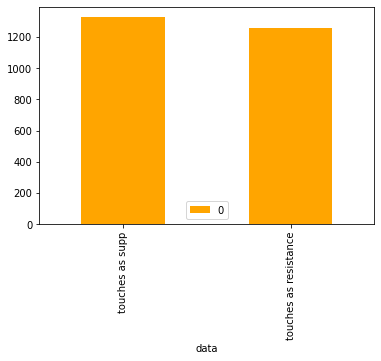

In [232]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

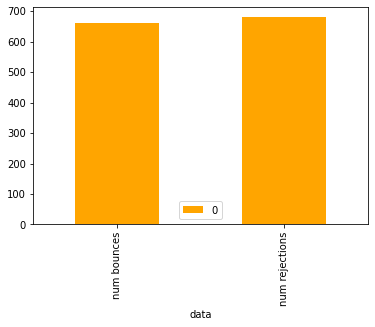

In [233]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [234]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

51.893353941267385 %


In [235]:
df_reactions = pd.DataFrame(reactions)

In [236]:
df_reactions

0       1     2                       3          4  \
0     38150.02  -39.02   wig 2021-01-14 08:59:59.999     bounce   
1     38150.02  -25.48   wig 2021-01-14 12:29:59.999     bounce   
2     38150.02 -174.02   wig 2021-02-07 20:59:59.999     bounce   
3     38150.02 -161.13   wig 2021-02-08 04:59:59.999     bounce   
4     38150.02 -112.02   wig 2021-05-19 12:29:59.999     bounce   
...        ...     ...   ...                     ...        ...   
1338  16739.00    8.89  wick 2023-01-03 15:29:59.999  rejection   
1339  21782.37   94.06  wick 2023-02-13 01:59:59.999  rejection   
1340  21782.37   86.91  body 2023-02-13 08:29:59.999  rejection   
1341  21782.37    7.09  wick 2023-02-14 08:59:59.999  rejection   
1342  21782.37   76.95  body 2023-02-14 13:59:59.999  rejection   

                                                      5  
0     (38786.1, 38111.0, 38255.4714, 2021-01-14 10:2...  
1     (38380.0, 38124.54, 38179.20844, 2021-01-14 13...  
2     (39130.0, 37976.0, 38222.956, 2021-02-08 03:59...  
3     (64854.0, 37988.89, 43738.023539999995, 2021-0...  
4     (38901.8, 38038.0, 38222.8532, 2021-05-19 13:2...  
...                                                 ...  
1338  (16605.28, 16747.89, 16717.37146, 2023-01-04 0...  
1339  (21622.47, 21876.43, 21822.08256, 2023-02-13 0...  
1340  (21351.07, 21894.99, 21778.59112, 2023-02-14 0...  
1341  (21666.39, 21789.46, 21763.12302, 2023-02-14 1...  
1342  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  

[1343 rows x 6 columns]

In [237]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     38150.02      -39.02       wig 2021-01-14 08:59:59.999     bounce   
1     38150.02      -25.48       wig 2021-01-14 12:29:59.999     bounce   
2     38150.02     -174.02       wig 2021-02-07 20:59:59.999     bounce   
3     38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
4     38150.02     -112.02       wig 2021-05-19 12:29:59.999     bounce   
...        ...         ...       ...                     ...        ...   
1338  16739.00        8.89      wick 2023-01-03 15:29:59.999  rejection   
1339  21782.37       94.06      wick 2023-02-13 01:59:59.999  rejection   
1340  21782.37       86.91      body 2023-02-13 08:29:59.999  rejection   
1341  21782.37        7.09      wick 2023-02-14 08:59:59.999  rejection   
1342  21782.37       76.95      body 2023-02-14 13:59:59.999  rejection   

                                          reaction_info  
0     (38786.1, 38111.0, 38255.4714, 2021-01-14 10:2...  
1     (38380.0, 38124.54, 38179.20844, 2021-01-14 13...  
2     (39130.0, 37976.0, 38222.956, 2021-02-08 03:59...  
3     (64854.0, 37988.89, 43738.023539999995, 2021-0...  
4     (38901.8, 38038.0, 38222.8532, 2021-05-19 13:2...  
...                                                 ...  
1338  (16605.28, 16747.89, 16717.37146, 2023-01-04 0...  
1339  (21622.47, 21876.43, 21822.08256, 2023-02-13 0...  
1340  (21351.07, 21894.99, 21778.59112, 2023-02-14 0...  
1341  (21666.39, 21789.46, 21763.12302, 2023-02-14 1...  
1342  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  

[1343 rows x 6 columns]

In [238]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [239]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [240]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     38150.02      -39.02       wig 2021-01-14 08:59:59.999     bounce   
1     38150.02      -25.48       wig 2021-01-14 12:29:59.999     bounce   
2     38150.02     -174.02       wig 2021-02-07 20:59:59.999     bounce   
3     38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
4     38150.02     -112.02       wig 2021-05-19 12:29:59.999     bounce   
...        ...         ...       ...                     ...        ...   
1338  16739.00        8.89      wick 2023-01-03 15:29:59.999  rejection   
1339  21782.37       94.06      wick 2023-02-13 01:59:59.999  rejection   
1340  21782.37       86.91      body 2023-02-13 08:29:59.999  rejection   
1341  21782.37        7.09      wick 2023-02-14 08:59:59.999  rejection   
1342  21782.37       76.95      body 2023-02-14 13:59:59.999  rejection   

      start_price  last_price           end_of_bounce  
0        38111.00    38786.10 2021-01-14 10:29:59.999  
1        38124.54    38380.00 2021-01-14 13:29:59.999  
2        37976.00    39130.00 2021-02-08 03:59:59.999  
3        37988.89    64854.00 2021-05-17 04:29:59.999  
4        38038.00    38901.80 2021-05-19 13:29:59.999  
...           ...         ...                     ...  
1338     16747.89    16605.28 2023-01-04 02:29:59.999  
1339     21876.43    21622.47 2023-02-13 05:29:59.999  
1340     21894.99    21351.07 2023-02-14 00:29:59.999  
1341     21789.46    21666.39 2023-02-14 10:59:59.999  
1342     21897.00    21532.77 2023-02-14 15:59:59.999  

[1343 rows x 8 columns]

In [241]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [242]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     38150.02      -39.02       wig 2021-01-14 08:59:59.999     bounce   
1     38150.02      -25.48       wig 2021-01-14 12:29:59.999     bounce   
2     38150.02     -174.02       wig 2021-02-07 20:59:59.999     bounce   
3     38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
4     38150.02     -112.02       wig 2021-05-19 12:29:59.999     bounce   
...        ...         ...       ...                     ...        ...   
1338  16739.00        8.89      wick 2023-01-03 15:29:59.999  rejection   
1339  21782.37       94.06      wick 2023-02-13 01:59:59.999  rejection   
1340  21782.37       86.91      body 2023-02-13 08:29:59.999  rejection   
1341  21782.37        7.09      wick 2023-02-14 08:59:59.999  rejection   
1342  21782.37       76.95      body 2023-02-14 13:59:59.999  rejection   

      start_price  last_price           end_of_bounce  %_of_reaction  
0        38111.00    38786.10 2021-01-14 10:29:59.999      -1.771405  
1        38124.54    38380.00 2021-01-14 13:29:59.999      -0.670067  
2        37976.00    39130.00 2021-02-08 03:59:59.999      -3.038761  
3        37988.89    64854.00 2021-05-17 04:29:59.999     -70.718334  
4        38038.00    38901.80 2021-05-19 13:29:59.999      -2.270887  
...           ...         ...                     ...            ...  
1338     16747.89    16605.28 2023-01-04 02:29:59.999       0.851510  
1339     21876.43    21622.47 2023-02-13 05:29:59.999       1.160884  
1340     21894.99    21351.07 2023-02-14 00:29:59.999       2.484221  
1341     21789.46    21666.39 2023-02-14 10:59:59.999       0.564814  
1342     21897.00    21532.77 2023-02-14 15:59:59.999       1.663379  

[1343 rows x 9 columns]

In [243]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [244]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction
count   1343.000000  1343.00000   1343.000000   1343.000000    1343.000000
mean   39082.168764    -0.25443  39083.701422  38974.023254       3.489945
std    13623.803630   126.67218  13625.857764  13801.123744       7.320515
min    16279.500000  -298.80000  16256.300000  15476.000000       0.537088
25%    23296.360000   -91.60500  23334.895000  23476.000000       1.151183
50%    39020.560000     1.83000  39138.200000  39310.000000       1.717983
75%    49066.760000    91.70500  49041.470000  48804.375000       2.965941
max    65519.110000   317.07000  65836.180000  69000.000000     116.136162

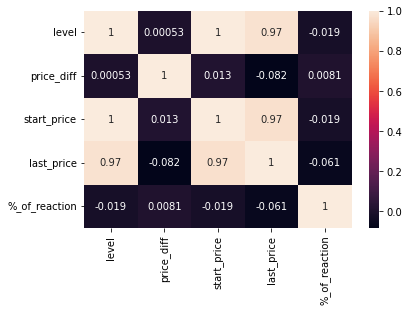

In [245]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f54fe064df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54f955f3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54fe064c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54f955f970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54f955fc40>],
 'means': []}

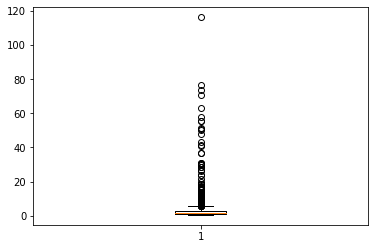

In [246]:
plt.boxplot(df_reactions["%_of_reaction"])

In [247]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

40.26454275466077

In [248]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

2.5059150726443447

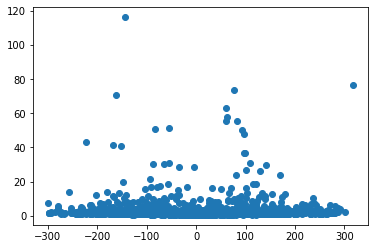

In [249]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [250]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [251]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [252]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction  \
count   1343.000000  1343.00000   1343.000000   1343.000000    1343.000000   
mean   39082.168764    -0.25443  39083.701422  38974.023254       3.489945   
std    13623.803630   126.67218  13625.857764  13801.123744       7.320515   
min    16279.500000  -298.80000  16256.300000  15476.000000       0.537088   
25%    23296.360000   -91.60500  23334.895000  23476.000000       1.151183   
50%    39020.560000     1.83000  39138.200000  39310.000000       1.717983   
75%    49066.760000    91.70500  49041.470000  48804.375000       2.965941   
max    65519.110000   317.07000  65836.180000  69000.000000     116.136162   

       %_diff_of_lvl  
count    1343.000000  
mean       -0.001168  
std         0.305408  
min        -0.499570  
25%        -0.281598  
50%         0.006596  
75%         0.280211  
max         0.499174

### Testing the price action in the 1 hour timeframe

Reinitializing the statistics table

In [253]:
Statistics_hfprc = []
#Statistics_oneprc = []

for statistics in Statistics :
  statistics.drop_duplicates(subset=["levels"],inplace = True)
  statistics["level_min"] = statistics.levels * (1-(0.5/100))
  statistics["level_max"] = statistics.levels * (1+(0.5/100))
  statistics["touches as supp"] = [0]*len(statistics)
  statistics["touches as resistance"] = [0]*len(statistics)
  statistics["num bounces"] = [0]*len(statistics)
  statistics["num rejections"] = [0]*len(statistics)


  #print("wow")
  Statistics_hfprc.append(statistics)


Getting reactions for the red candles

In [254]:
from operator import is_
#####real



touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_hfprc[1]
testing_price = testing_levels[2]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [255]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [256]:
statistics

dates    levels    level_min    level_max  \
0  2021-01-11 00:59:59.999  38150.02  37959.26990  38340.77010   
1  2021-02-22 00:59:59.999  57412.35  57125.28825  57699.41175   
2  2021-03-15 00:59:59.999  58976.08  58681.19960  59270.96040   
3  2021-04-11 23:59:59.999  59998.80  59698.80600  60298.79400   
4  2021-05-10 00:59:59.999  58240.83  57949.62585  58532.03415   
5  2021-06-14 00:59:59.999  39020.56  38825.45720  39215.66280   
6  2021-07-05 00:59:59.999  35288.13  35111.68935  35464.57065   
7  2021-08-23 00:59:59.999  49239.22  48993.02390  49485.41610   
8  2021-09-06 00:59:59.999  51756.88  51498.09560  52015.66440   
9  2021-09-20 00:59:59.999  47241.75  47005.54125  47477.95875   
10 2021-10-18 00:59:59.999  61528.32  61220.67840  61835.96160   
11 2021-11-15 00:59:59.999  65519.11  65191.51445  65846.70555   
12 2021-12-13 00:59:59.999  50053.90  49803.63050  50304.16950   
13 2021-12-27 00:59:59.999  50775.48  50521.60260  51029.35740   
14 2022-01-17 00:59:59.999  43071.66  42856.30170  43287.01830   
15 2022-02-07 00:59:59.999  42380.87  42168.96565  42592.77435   
16 2022-03-07 00:59:59.999  38420.80  38228.69600  38612.90400   
17 2022-03-27 23:59:59.999  46827.76  46593.62120  47061.89880   
18 2022-06-06 00:59:59.999  29919.20  29769.60400  30068.79600   
19 2022-06-27 00:59:59.999  21038.08  20932.88960  21143.27040   
20 2022-07-11 00:59:59.999  20861.11  20756.80445  20965.41555   
21 2022-08-01 00:59:59.999  23296.36  23179.87820  23412.84180   
22 2022-08-15 00:59:59.999  24305.25  24183.72375  24426.77625   
23 2022-09-12 00:59:59.999  21826.87  21717.73565  21936.00435   
24 2022-10-10 00:59:59.999  19439.96  19342.76020  19537.15980   
25 2022-11-07 00:59:59.999  20905.58  20801.05210  21010.10790   
26 2022-12-05 00:59:59.999  17106.65  17021.11675  17192.18325   
27 2022-12-26 00:59:59.999  16832.11  16747.94945  16916.27055   
28 2023-01-30 00:59:59.999  23743.37  23624.65315  23862.08685   
29 2023-02-20 00:59:59.999  24272.51  24151.14745  24393.87255   
32 2021-01-25 00:59:59.999  32259.45  32098.15275  32420.74725   
33 2021-03-01 00:59:59.999  45134.11  44908.43945  45359.78055   
34 2021-03-28 23:59:59.999  55777.65  55498.76175  56056.53825   
35 2021-04-26 00:59:59.999  49066.76  48821.42620  49312.09380   
36 2021-05-24 00:59:59.999  34681.44  34508.03280  34854.84720   
37 2021-06-28 00:59:59.999  34702.49  34528.97755  34876.00245   
38 2021-07-19 00:59:59.999  31778.57  31619.67715  31937.46285   
39 2021-08-30 00:59:59.999  48767.84  48524.00080  49011.67920   
40 2021-09-13 00:59:59.999  46025.23  45795.10385  46255.35615   
41 2021-09-27 00:59:59.999  43160.90  42945.09550  43376.70450   
42 2021-10-25 00:59:59.999  60852.22  60547.95890  61156.48110   
43 2021-12-06 00:59:59.999  49396.32  49149.33840  49643.30160   
44 2021-12-20 00:59:59.999  46681.24  46447.83380  46914.64620   
45 2022-01-10 00:59:59.999  41864.62  41655.29690  42073.94310   
46 2022-01-24 00:59:59.999  36244.55  36063.32725  36425.77275   
47 2022-02-28 00:59:59.999  37699.08  37510.58460  37887.57540   
48 2022-03-14 00:59:59.999  37777.35  37588.46325  37966.23675   
49 2022-05-30 00:59:59.999  29468.10  29320.75950  29615.44050   
50 2022-06-20 00:59:59.999  20574.00  20471.13000  20676.87000   
51 2022-07-04 00:59:59.999  19315.83  19219.25085  19412.40915   
52 2022-07-18 00:59:59.999  20799.58  20695.58210  20903.57790   
53 2022-08-08 00:59:59.999  23174.39  23058.51805  23290.26195   
54 2022-08-29 00:59:59.999  19555.61  19457.83195  19653.38805   
55 2022-09-26 00:59:59.999  18809.13  18715.08435  18903.17565   
56 2022-10-17 00:59:59.999  19262.98  19166.66510  19359.29490   
57 2022-11-21 00:59:59.999  16279.50  16198.10250  16360.89750   
58 2022-12-19 00:59:59.999  16739.00  16655.30500  16822.69500   
59 2023-01-02 00:59:59.999  16617.17  16534.08415  16700.25585   
60 2023-02-13 00:59:59.999  21782.37  21673.45815  21891.28185   

    touches as supp  touches as resistance  num bounces  num

In [257]:
stats = statistics.sum()

<ipython-input-257-ac83d3a43aa2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats = statistics.sum()


number of reactions

In [258]:
len(reactions)

965

In [259]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  2131697.05  2.121039e+06  2.142356e+06            844.0   

   touches as resistance  num bounces  num rejections  
0                  823.0        461.0           504.0

In [260]:
st = pd.DataFrame(stats)

In [261]:
st["data"] = st.index

In [262]:
st

0                   data
levels                 2.131697e+06                 levels
level_min              2.121039e+06              level_min
level_max              2.142356e+06              level_max
touches as supp        8.440000e+02        touches as supp
touches as resistance  8.230000e+02  touches as resistance
num bounces            4.610000e+02            num bounces
num rejections         5.040000e+02         num rejections

Touches as suport :

In [263]:
st[0].iloc[3]

844.0

Touches as resistance :

In [264]:
st[0].iloc[4]

823.0

number of bounces :

In [265]:
st[0].iloc[5]

461.0

number of rejections

In [266]:
st[0].iloc[6]

504.0

<AxesSubplot:xlabel='data'>

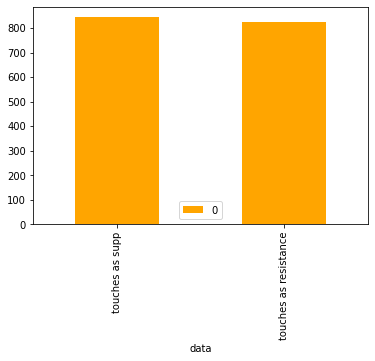

In [267]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

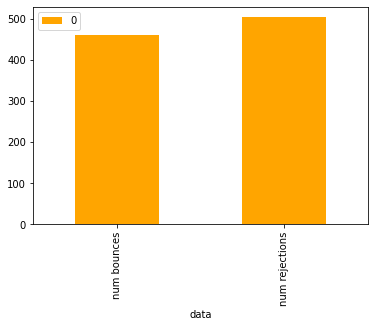

In [268]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [269]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

57.88842231553689 %


In [270]:
df_reactions = pd.DataFrame(reactions)

In [271]:
df_reactions

0       1     2                       3          4  \
0    38150.02 -174.02   wig 2021-02-07 20:59:59.999     bounce   
1    38150.02 -161.13   wig 2021-02-08 04:59:59.999     bounce   
2    38150.02 -189.00  body 2021-05-19 19:59:59.999     bounce   
3    38150.02 -187.11   wig 2021-05-19 21:59:59.999     bounce   
4    38150.02  -40.02   wig 2021-05-20 17:59:59.999     bounce   
..        ...     ...   ...                     ...        ...   
960  16739.00    0.93  wick 2023-01-03 14:59:59.999  rejection   
961  21782.37   94.06  wick 2023-02-13 01:59:59.999  rejection   
962  21782.37   85.32  body 2023-02-13 08:59:59.999  rejection   
963  21782.37    7.09  wick 2023-02-14 08:59:59.999  rejection   
964  21782.37   76.95  body 2023-02-14 13:59:59.999  rejection   

                                                     5  
0    (39130.0, 37976.0, 38222.956, 2021-02-08 03:59...  
1    (64854.0, 37988.89, 43738.023539999995, 2021-0...  
2    (39499.94, 37600.0, 38006.58716, 2021-05-19 21...  
3    (38956.99, 37962.91, 38175.64312, 2021-05-19 2...  
4    (42200.0, 38110.0, 38985.26, 2021-05-21 15:59:...  
..                                                 ...  
960  (16605.28, 16739.93, 16711.1149, 2023-01-04 02...  
961  (21622.47, 21876.43, 21822.08256, 2023-02-13 0...  
962  (21351.07, 21894.99, 21778.59112, 2023-02-14 0...  
963  (21666.39, 21789.46, 21763.12302, 2023-02-14 1...  
964  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  

[965 rows x 6 columns]

In [272]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    38150.02     -174.02       wig 2021-02-07 20:59:59.999     bounce   
1    38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
2    38150.02     -189.00      body 2021-05-19 19:59:59.999     bounce   
3    38150.02     -187.11       wig 2021-05-19 21:59:59.999     bounce   
4    38150.02      -40.02       wig 2021-05-20 17:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
960  16739.00        0.93      wick 2023-01-03 14:59:59.999  rejection   
961  21782.37       94.06      wick 2023-02-13 01:59:59.999  rejection   
962  21782.37       85.32      body 2023-02-13 08:59:59.999  rejection   
963  21782.37        7.09      wick 2023-02-14 08:59:59.999  rejection   
964  21782.37       76.95      body 2023-02-14 13:59:59.999  rejection   

                                         reaction_info  
0    (39130.0, 37976.0, 38222.956, 2021-02-08 03:59...  
1    (64854.0, 37988.89, 43738.023539999995, 2021-0...  
2    (39499.94, 37600.0, 38006.58716, 2021-05-19 21...  
3    (38956.99, 37962.91, 38175.64312, 2021-05-19 2...  
4    (42200.0, 38110.0, 38985.26, 2021-05-21 15:59:...  
..                                                 ...  
960  (16605.28, 16739.93, 16711.1149, 2023-01-04 02...  
961  (21622.47, 21876.43, 21822.08256, 2023-02-13 0...  
962  (21351.07, 21894.99, 21778.59112, 2023-02-14 0...  
963  (21666.39, 21789.46, 21763.12302, 2023-02-14 1...  
964  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  

[965 rows x 6 columns]

In [273]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [274]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [275]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    38150.02     -174.02       wig 2021-02-07 20:59:59.999     bounce   
1    38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
2    38150.02     -189.00      body 2021-05-19 19:59:59.999     bounce   
3    38150.02     -187.11       wig 2021-05-19 21:59:59.999     bounce   
4    38150.02      -40.02       wig 2021-05-20 17:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
960  16739.00        0.93      wick 2023-01-03 14:59:59.999  rejection   
961  21782.37       94.06      wick 2023-02-13 01:59:59.999  rejection   
962  21782.37       85.32      body 2023-02-13 08:59:59.999  rejection   
963  21782.37        7.09      wick 2023-02-14 08:59:59.999  rejection   
964  21782.37       76.95      body 2023-02-14 13:59:59.999  rejection   

     start_price  last_price           end_of_bounce  
0       37976.00    39130.00 2021-02-08 03:59:59.999  
1       37988.89    64854.00 2021-05-17 04:59:59.999  
2       37600.00    39499.94 2021-05-19 21:59:59.999  
3       37962.91    38956.99 2021-05-19 23:59:59.999  
4       38110.00    42200.00 2021-05-21 15:59:59.999  
..           ...         ...                     ...  
960     16739.93    16605.28 2023-01-04 02:59:59.999  
961     21876.43    21622.47 2023-02-13 05:59:59.999  
962     21894.99    21351.07 2023-02-14 00:59:59.999  
963     21789.46    21666.39 2023-02-14 10:59:59.999  
964     21897.00    21532.77 2023-02-14 15:59:59.999  

[965 rows x 8 columns]

In [276]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [277]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    38150.02     -174.02       wig 2021-02-07 20:59:59.999     bounce   
1    38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
2    38150.02     -189.00      body 2021-05-19 19:59:59.999     bounce   
3    38150.02     -187.11       wig 2021-05-19 21:59:59.999     bounce   
4    38150.02      -40.02       wig 2021-05-20 17:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
960  16739.00        0.93      wick 2023-01-03 14:59:59.999  rejection   
961  21782.37       94.06      wick 2023-02-13 01:59:59.999  rejection   
962  21782.37       85.32      body 2023-02-13 08:59:59.999  rejection   
963  21782.37        7.09      wick 2023-02-14 08:59:59.999  rejection   
964  21782.37       76.95      body 2023-02-14 13:59:59.999  rejection   

     start_price  last_price           end_of_bounce  %_of_reaction  
0       37976.00    39130.00 2021-02-08 03:59:59.999      -3.038761  
1       37988.89    64854.00 2021-05-17 04:59:59.999     -70.718334  
2       37600.00    39499.94 2021-05-19 21:59:59.999      -5.053032  
3       37962.91    38956.99 2021-05-19 23:59:59.999      -2.618556  
4       38110.00    42200.00 2021-05-21 15:59:59.999     -10.732091  
..           ...         ...                     ...            ...  
960     16739.93    16605.28 2023-01-04 02:59:59.999       0.804364  
961     21876.43    21622.47 2023-02-13 05:59:59.999       1.160884  
962     21894.99    21351.07 2023-02-14 00:59:59.999       2.484221  
963     21789.46    21666.39 2023-02-14 10:59:59.999       0.564814  
964     21897.00    21532.77 2023-02-14 15:59:59.999       1.663379  

[965 rows x 9 columns]

In [278]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [279]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction
count    965.000000  965.000000    965.000000    965.000000     965.000000
mean   38599.840922    3.595358  38604.047907  38516.711865       4.063213
std    13584.728319  126.027556  13588.242737  13841.520369       8.175468
min    16279.500000 -298.800000  16256.300000  15476.000000       0.526530
25%    23174.390000  -89.070000  23257.380000  22918.200000       1.288493
50%    39020.560000    4.480000  38920.710000  39217.410000       1.908074
75%    49066.760000   93.160000  48901.000000  48496.450000       3.548699
max    65519.110000  303.500000  65475.010000  69000.000000     116.136162

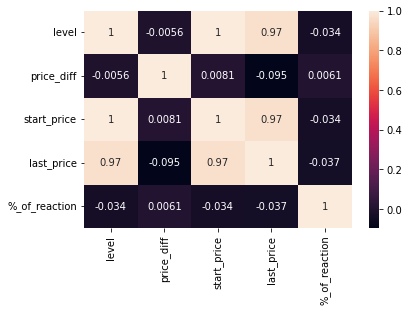

In [280]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f54ef358340>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54ef3588e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54ef358190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54ef358e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54f08fc190>],
 'means': []}

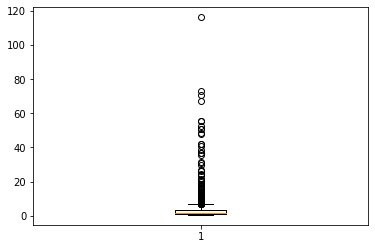

In [281]:
plt.boxplot(df_reactions["%_of_reaction"])

In [282]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

37.79007745615697

In [283]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

2.7184997413710623

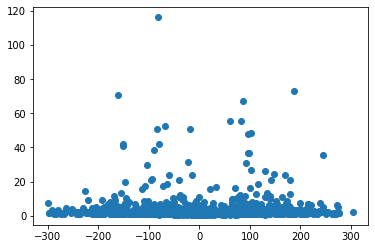

In [284]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [285]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [286]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [287]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction  \
count    965.000000  965.000000    965.000000    965.000000     965.000000   
mean   38599.840922    3.595358  38604.047907  38516.711865       4.063213   
std    13584.728319  126.027556  13588.242737  13841.520369       8.175468   
min    16279.500000 -298.800000  16256.300000  15476.000000       0.526530   
25%    23174.390000  -89.070000  23257.380000  22918.200000       1.288493   
50%    39020.560000    4.480000  38920.710000  39217.410000       1.908074   
75%    49066.760000   93.160000  48901.000000  48496.450000       3.548699   
max    65519.110000  303.500000  65475.010000  69000.000000     116.136162   

       %_diff_of_lvl  
count     965.000000  
mean        0.011389  
std         0.303675  
min        -0.499570  
25%        -0.259632  
50%         0.016298  
75%         0.284187  
max         0.499176

### Testing the price action in the 4 hour timeframe

Reinitializing the statistics table

In [288]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
#Statistics_oneprc = []

for statistics in Statistics :
  statistics.drop_duplicates(subset=["levels"],inplace = True)
  statistics["level_min"] = statistics.levels * (1-(0.5/100))
  statistics["level_max"] = statistics.levels * (1+(0.5/100))
  statistics["touches as supp"] = [0]*len(statistics)
  statistics["touches as resistance"] = [0]*len(statistics)
  statistics["num bounces"] = [0]*len(statistics)
  statistics["num rejections"] = [0]*len(statistics)


  #print("wow")
  Statistics_hfprc.append(statistics)


Getting reactions for the red candles

In [289]:
from operator import is_
#####real

touches_suppport = []
touches_resistance = []
reactions = []
indexes = []


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_hfprc[1]
testing_price = testing_levels[3]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [290]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [291]:
statistics

dates    levels    level_min    level_max  \
0  2021-01-11 00:59:59.999  38150.02  37959.26990  38340.77010   
1  2021-02-22 00:59:59.999  57412.35  57125.28825  57699.41175   
2  2021-03-15 00:59:59.999  58976.08  58681.19960  59270.96040   
3  2021-04-11 23:59:59.999  59998.80  59698.80600  60298.79400   
4  2021-05-10 00:59:59.999  58240.83  57949.62585  58532.03415   
5  2021-06-14 00:59:59.999  39020.56  38825.45720  39215.66280   
6  2021-07-05 00:59:59.999  35288.13  35111.68935  35464.57065   
7  2021-08-23 00:59:59.999  49239.22  48993.02390  49485.41610   
8  2021-09-06 00:59:59.999  51756.88  51498.09560  52015.66440   
9  2021-09-20 00:59:59.999  47241.75  47005.54125  47477.95875   
10 2021-10-18 00:59:59.999  61528.32  61220.67840  61835.96160   
11 2021-11-15 00:59:59.999  65519.11  65191.51445  65846.70555   
12 2021-12-13 00:59:59.999  50053.90  49803.63050  50304.16950   
13 2021-12-27 00:59:59.999  50775.48  50521.60260  51029.35740   
14 2022-01-17 00:59:59.999  43071.66  42856.30170  43287.01830   
15 2022-02-07 00:59:59.999  42380.87  42168.96565  42592.77435   
16 2022-03-07 00:59:59.999  38420.80  38228.69600  38612.90400   
17 2022-03-27 23:59:59.999  46827.76  46593.62120  47061.89880   
18 2022-06-06 00:59:59.999  29919.20  29769.60400  30068.79600   
19 2022-06-27 00:59:59.999  21038.08  20932.88960  21143.27040   
20 2022-07-11 00:59:59.999  20861.11  20756.80445  20965.41555   
21 2022-08-01 00:59:59.999  23296.36  23179.87820  23412.84180   
22 2022-08-15 00:59:59.999  24305.25  24183.72375  24426.77625   
23 2022-09-12 00:59:59.999  21826.87  21717.73565  21936.00435   
24 2022-10-10 00:59:59.999  19439.96  19342.76020  19537.15980   
25 2022-11-07 00:59:59.999  20905.58  20801.05210  21010.10790   
26 2022-12-05 00:59:59.999  17106.65  17021.11675  17192.18325   
27 2022-12-26 00:59:59.999  16832.11  16747.94945  16916.27055   
28 2023-01-30 00:59:59.999  23743.37  23624.65315  23862.08685   
29 2023-02-20 00:59:59.999  24272.51  24151.14745  24393.87255   
32 2021-01-25 00:59:59.999  32259.45  32098.15275  32420.74725   
33 2021-03-01 00:59:59.999  45134.11  44908.43945  45359.78055   
34 2021-03-28 23:59:59.999  55777.65  55498.76175  56056.53825   
35 2021-04-26 00:59:59.999  49066.76  48821.42620  49312.09380   
36 2021-05-24 00:59:59.999  34681.44  34508.03280  34854.84720   
37 2021-06-28 00:59:59.999  34702.49  34528.97755  34876.00245   
38 2021-07-19 00:59:59.999  31778.57  31619.67715  31937.46285   
39 2021-08-30 00:59:59.999  48767.84  48524.00080  49011.67920   
40 2021-09-13 00:59:59.999  46025.23  45795.10385  46255.35615   
41 2021-09-27 00:59:59.999  43160.90  42945.09550  43376.70450   
42 2021-10-25 00:59:59.999  60852.22  60547.95890  61156.48110   
43 2021-12-06 00:59:59.999  49396.32  49149.33840  49643.30160   
44 2021-12-20 00:59:59.999  46681.24  46447.83380  46914.64620   
45 2022-01-10 00:59:59.999  41864.62  41655.29690  42073.94310   
46 2022-01-24 00:59:59.999  36244.55  36063.32725  36425.77275   
47 2022-02-28 00:59:59.999  37699.08  37510.58460  37887.57540   
48 2022-03-14 00:59:59.999  37777.35  37588.46325  37966.23675   
49 2022-05-30 00:59:59.999  29468.10  29320.75950  29615.44050   
50 2022-06-20 00:59:59.999  20574.00  20471.13000  20676.87000   
51 2022-07-04 00:59:59.999  19315.83  19219.25085  19412.40915   
52 2022-07-18 00:59:59.999  20799.58  20695.58210  20903.57790   
53 2022-08-08 00:59:59.999  23174.39  23058.51805  23290.26195   
54 2022-08-29 00:59:59.999  19555.61  19457.83195  19653.38805   
55 2022-09-26 00:59:59.999  18809.13  18715.08435  18903.17565   
56 2022-10-17 00:59:59.999  19262.98  19166.66510  19359.29490   
57 2022-11-21 00:59:59.999  16279.50  16198.10250  16360.89750   
58 2022-12-19 00:59:59.999  16739.00  16655.30500  16822.69500   
59 2023-01-02 00:59:59.999  16617.17  16534.08415  16700.25585   
60 2023-02-13 00:59:59.999  21782.37  21673.45815  21891.28185   

    touches as supp  touches as resistance  num bounces  num

In [292]:
stats = statistics.sum()

<ipython-input-292-ac83d3a43aa2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats = statistics.sum()


number of reactions

In [293]:
len(reactions)

431

In [294]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  2131697.05  2.121039e+06  2.142356e+06            360.0   

   touches as resistance  num bounces  num rejections  
0                  374.0        204.0           227.0

In [295]:
st = pd.DataFrame(stats)

In [296]:
st["data"] = st.index

In [297]:
st

0                   data
levels                 2.131697e+06                 levels
level_min              2.121039e+06              level_min
level_max              2.142356e+06              level_max
touches as supp        3.600000e+02        touches as supp
touches as resistance  3.740000e+02  touches as resistance
num bounces            2.040000e+02            num bounces
num rejections         2.270000e+02         num rejections

Touches as suport :

In [298]:
st[0].iloc[3]

360.0

Touches as resistance :

In [299]:
st[0].iloc[4]

374.0

number of bounces :

In [300]:
st[0].iloc[5]

204.0

number of rejections

In [301]:
st[0].iloc[6]

227.0

<AxesSubplot:xlabel='data'>

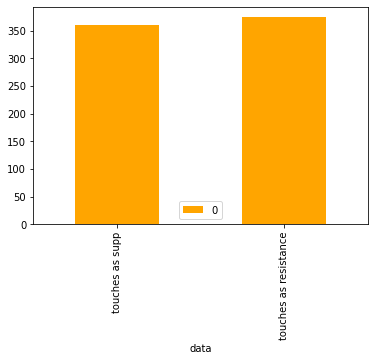

In [302]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

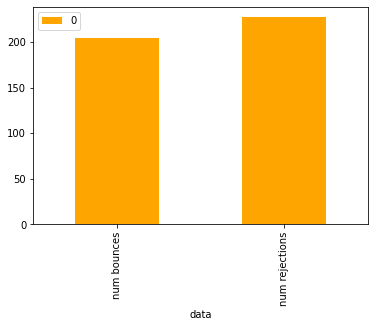

In [303]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [304]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

58.719346049046315 %


In [305]:
df_reactions = pd.DataFrame(reactions)

In [306]:
df_reactions

0       1     2                       3          4  \
0    38150.02 -161.13   wig 2021-02-08 04:59:59.999     bounce   
1    38150.02  -40.02   wig 2021-05-20 20:59:59.999     bounce   
2    38150.02  -34.01   wig 2021-06-17 00:59:59.999     bounce   
3    38150.02   -0.02  body 2021-07-26 08:59:59.999     bounce   
4    38150.02 -138.65  body 2021-08-03 20:59:59.999     bounce   
..        ...     ...   ...                     ...        ...   
426  19262.98   64.46  body 2022-10-19 00:59:59.999  rejection   
427  16279.50    4.50  wick 2022-11-21 16:59:59.999  rejection   
428  16739.00   45.00  wick 2022-12-19 12:59:59.999  rejection   
429  16739.00    0.64  wick 2023-01-02 20:59:59.999  rejection   
430  21782.37   85.32  body 2023-02-13 08:59:59.999  rejection   

                                                     5  
0    (64854.0, 37988.89, 43738.023539999995, 2021-0...  
1    (42200.0, 38110.0, 38985.26, 2021-05-21 16:59:...  
2    (39559.88, 38116.01, 38424.99818, 2021-06-17 1...  
3    (38738.51, 37724.03, 37941.12872, 2021-07-26 1...  
4    (38643.0, 37642.03, 37856.23758, 2021-08-04 08...  
..                                                 ...  
426  (18900.0, 19433.43, 19319.27598, 2022-10-20 16...  
427  (15476.0, 16284.0, 16111.088, 2022-11-22 16:59...  
428  (16256.3, 16784.0, 16671.0722, 2022-12-20 04:5...  
429  (16647.81, 16739.64, 16719.98838, 2023-01-03 0...  
430  (21351.07, 21894.99, 21778.59112, 2023-02-14 0...  

[431 rows x 6 columns]

In [307]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
1    38150.02      -40.02       wig 2021-05-20 20:59:59.999     bounce   
2    38150.02      -34.01       wig 2021-06-17 00:59:59.999     bounce   
3    38150.02       -0.02      body 2021-07-26 08:59:59.999     bounce   
4    38150.02     -138.65      body 2021-08-03 20:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
426  19262.98       64.46      body 2022-10-19 00:59:59.999  rejection   
427  16279.50        4.50      wick 2022-11-21 16:59:59.999  rejection   
428  16739.00       45.00      wick 2022-12-19 12:59:59.999  rejection   
429  16739.00        0.64      wick 2023-01-02 20:59:59.999  rejection   
430  21782.37       85.32      body 2023-02-13 08:59:59.999  rejection   

                                         reaction_info  
0    (64854.0, 37988.89, 43738.023539999995, 2021-0...  
1    (42200.0, 38110.0, 38985.26, 2021-05-21 16:59:...  
2    (39559.88, 38116.01, 38424.99818, 2021-06-17 1...  
3    (38738.51, 37724.03, 37941.12872, 2021-07-26 1...  
4    (38643.0, 37642.03, 37856.23758, 2021-08-04 08...  
..                                                 ...  
426  (18900.0, 19433.43, 19319.27598, 2022-10-20 16...  
427  (15476.0, 16284.0, 16111.088, 2022-11-22 16:59...  
428  (16256.3, 16784.0, 16671.0722, 2022-12-20 04:5...  
429  (16647.81, 16739.64, 16719.98838, 2023-01-03 0...  
430  (21351.07, 21894.99, 21778.59112, 2023-02-14 0...  

[431 rows x 6 columns]

In [308]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [309]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [310]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
1    38150.02      -40.02       wig 2021-05-20 20:59:59.999     bounce   
2    38150.02      -34.01       wig 2021-06-17 00:59:59.999     bounce   
3    38150.02       -0.02      body 2021-07-26 08:59:59.999     bounce   
4    38150.02     -138.65      body 2021-08-03 20:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
426  19262.98       64.46      body 2022-10-19 00:59:59.999  rejection   
427  16279.50        4.50      wick 2022-11-21 16:59:59.999  rejection   
428  16739.00       45.00      wick 2022-12-19 12:59:59.999  rejection   
429  16739.00        0.64      wick 2023-01-02 20:59:59.999  rejection   
430  21782.37       85.32      body 2023-02-13 08:59:59.999  rejection   

     start_price  last_price           end_of_bounce  
0       37988.89    64854.00 2021-05-17 04:59:59.999  
1       38110.00    42200.00 2021-05-21 16:59:59.999  
2       38116.01    39559.88 2021-06-17 16:59:59.999  
3       37724.03    38738.51 2021-07-26 16:59:59.999  
4       37642.03    38643.00 2021-08-04 08:59:59.999  
..           ...         ...                     ...  
426     19433.43    18900.00 2022-10-20 16:59:59.999  
427     16284.00    15476.00 2022-11-22 16:59:59.999  
428     16784.00    16256.30 2022-12-20 04:59:59.999  
429     16739.64    16647.81 2023-01-03 08:59:59.999  
430     21894.99    21351.07 2023-02-14 00:59:59.999  

[431 rows x 8 columns]

In [311]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [312]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0    38150.02     -161.13       wig 2021-02-08 04:59:59.999     bounce   
1    38150.02      -40.02       wig 2021-05-20 20:59:59.999     bounce   
2    38150.02      -34.01       wig 2021-06-17 00:59:59.999     bounce   
3    38150.02       -0.02      body 2021-07-26 08:59:59.999     bounce   
4    38150.02     -138.65      body 2021-08-03 20:59:59.999     bounce   
..        ...         ...       ...                     ...        ...   
426  19262.98       64.46      body 2022-10-19 00:59:59.999  rejection   
427  16279.50        4.50      wick 2022-11-21 16:59:59.999  rejection   
428  16739.00       45.00      wick 2022-12-19 12:59:59.999  rejection   
429  16739.00        0.64      wick 2023-01-02 20:59:59.999  rejection   
430  21782.37       85.32      body 2023-02-13 08:59:59.999  rejection   

     start_price  last_price           end_of_bounce  %_of_reaction  
0       37988.89    64854.00 2021-05-17 04:59:59.999     -70.718334  
1       38110.00    42200.00 2021-05-21 16:59:59.999     -10.732091  
2       38116.01    39559.88 2021-06-17 16:59:59.999      -3.788093  
3       37724.03    38738.51 2021-07-26 16:59:59.999      -2.689214  
4       37642.03    38643.00 2021-08-04 08:59:59.999      -2.659182  
..           ...         ...                     ...            ...  
426     19433.43    18900.00 2022-10-20 16:59:59.999       2.744909  
427     16284.00    15476.00 2022-11-22 16:59:59.999       4.961926  
428     16784.00    16256.30 2022-12-20 04:59:59.999       3.144066  
429     16739.64    16647.81 2023-01-03 08:59:59.999       0.548578  
430     21894.99    21351.07 2023-02-14 00:59:59.999       2.484221  

[431 rows x 9 columns]

In [313]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [314]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction
count    431.000000  431.000000    431.000000    431.000000     431.000000
mean   37957.799258    7.802065  37960.308979  37854.515684       5.787117
std    13766.512669  120.673036  13760.371018  14269.534546      11.067782
min    16279.500000 -283.460000  16186.000000  15476.000000       0.548578
25%    23174.390000  -77.595000  22978.285000  22500.000000       1.631137
50%    39020.560000    6.590000  38771.910000  38795.380000       2.730695
75%    48767.840000   91.320000  48824.690000  48282.625000       4.864977
max    65519.110000  287.220000  66401.820000  69000.000000     116.136162

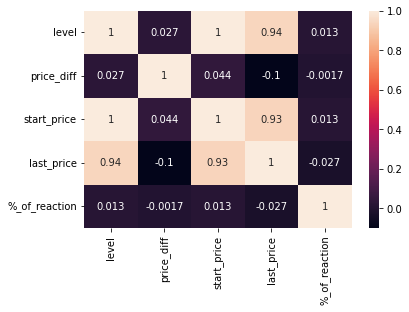

In [315]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f54fa496070>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54f9b7f490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54fa4968e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54f9b7f7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54f9b7fe20>],
 'means': []}

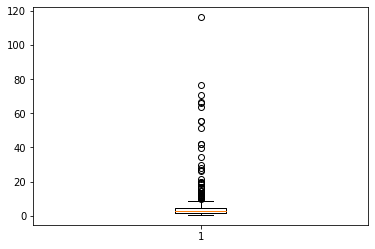

In [316]:
plt.boxplot(df_reactions["%_of_reaction"])

In [317]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

42.78967492345342

In [318]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

3.605147553598992

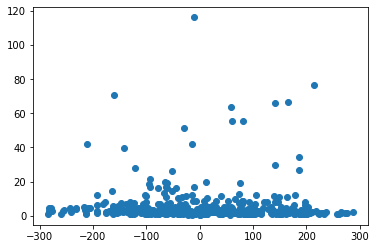

In [319]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [320]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [321]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [322]:
df_reactions.describe()

level  price_diff   start_price    last_price  %_of_reaction  \
count    431.000000  431.000000    431.000000    431.000000     431.000000   
mean   37957.799258    7.802065  37960.308979  37854.515684       5.787117   
std    13766.512669  120.673036  13760.371018  14269.534546      11.067782   
min    16279.500000 -283.460000  16186.000000  15476.000000       0.548578   
25%    23174.390000  -77.595000  22978.285000  22500.000000       1.631137   
50%    39020.560000    6.590000  38771.910000  38795.380000       2.730695   
75%    48767.840000   91.320000  48824.690000  48282.625000       4.864977   
max    65519.110000  287.220000  66401.820000  69000.000000     116.136162   

       %_diff_of_lvl  
count     431.000000  
mean        0.019145  
std         0.301455  
min        -0.496739  
25%        -0.241965  
50%         0.019862  
75%         0.300727  
max         0.499174

# Daily levels


## testing the Daily levels with Z=1

### Testing the price action in the 15 minute timeframe

In [23]:
Z_parameter = [0.5,1]
#Statistics_hfprc = []
Statistics_oneprc = []

for statistics in Statistics :
  statistics.drop_duplicates(subset=["levels"],inplace = True)
  statistics["level_min"] = statistics.levels * (1-(1/100))
  statistics["level_max"] = statistics.levels * (1+(1/100))
  statistics["touches as supp"] = [0]*len(statistics)
  statistics["touches as resistance"] = [0]*len(statistics)
  statistics["num bounces"] = [0]*len(statistics)
  statistics["num rejections"] = [0]*len(statistics)


  #print("wow")
  Statistics_oneprc.append(statistics)


In [24]:
for stat in Statistics_hfprc:
  print(len(stat))

12
59
422


In [25]:
from operator import is_
#####real



touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_oneprc[2]
testing_price = testing_levels[0]

for i,r in statistics.iterrows():
    print(i)
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-1 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

0
1


KeyboardInterrupt: ignored

In [28]:
for i,r in statistics.iterrows():
    print(i)
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-1 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [29]:
statistics

dates    levels   level_min   level_max  \
0   2021-01-04 00:59:59.999  33000.05  32670.0495  33330.0505   
1   2021-01-09 00:59:59.999  40586.96  40181.0904  40992.8296   
2   2021-01-15 00:59:59.999  39145.21  38753.7579  39536.6621   
3   2021-01-19 00:59:59.999  36622.46  36256.2354  36988.6846   
4   2021-01-23 00:59:59.999  32950.00  32620.5000  33279.5000   
..                      ...       ...         ...         ...   
417 2023-02-11 00:59:59.999  21625.19  21408.9381  21841.4419   
418 2023-02-14 00:59:59.999  21774.63  21556.8837  21992.3763   
419 2023-02-17 00:59:59.999  23517.72  23282.5428  23752.8972   
420 2023-02-20 00:59:59.999  24272.51  24029.7849  24515.2351   
421 2023-02-26 00:59:59.999  23157.07  22925.4993  23388.6407   

     touches as supp  touches as resistance  num bounces  num rejections  
0                146                     70           52              33  
1                194                     73           48              26  
2                282                    125           84              58  
3                 86                     93           37              35  
4                 58                     58           24              24  
..               ...                    ...          ...             ...  
417                0                      0            0               0  
418                0                      0            0               0  
419                0                      0            0               0  
420                0                      0            0               0  
421                0                      0            0               0  

[422 rows x 8 columns]

In [30]:
stats = statistics.sum()

<ipython-input-30-ac83d3a43aa2>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [31]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  15666276.78  1.550961e+07  1.582294e+07          16016.0   

   touches as resistance  num bounces  num rejections  
0                15032.0       4652.0          4545.0

In [32]:
st = pd.DataFrame(stats)

In [33]:
st["data"] = st.index

In [34]:
st

0                   data
levels                 1.566628e+07                 levels
level_min              1.550961e+07              level_min
level_max              1.582294e+07              level_max
touches as supp        1.601600e+04        touches as supp
touches as resistance  1.503200e+04  touches as resistance
num bounces            4.652000e+03            num bounces
num rejections         4.545000e+03         num rejections

Touches as suport :

In [35]:
st[0].iloc[3]

16016.0

Touches as resistance :

In [36]:
st[0].iloc[4]

15032.0

number of bounces :

In [37]:
st[0].iloc[5]

4652.0

number of rejections

In [38]:
st[0].iloc[6]

4545.0

<AxesSubplot:xlabel='data'>

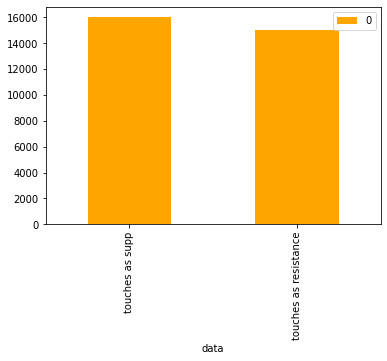

In [39]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

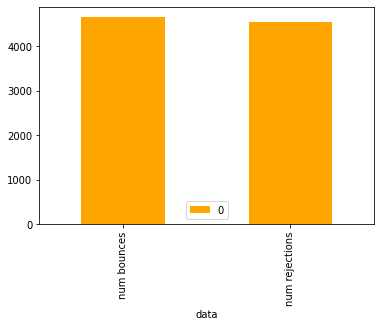

In [40]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [41]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

29.3255604225715 %


In [42]:
df_reactions = pd.DataFrame(reactions)

In [43]:
df_reactions

0       1     2                       3          4  \
0     33000.05 -303.57  body 2021-01-04 02:29:59.999     bounce   
1     33000.05 -123.94   wig 2021-01-05 19:29:59.999     bounce   
2     33000.05 -127.42  body 2021-01-11 07:59:59.999     bounce   
3     33000.05 -180.07   wig 2021-01-12 15:29:59.999     bounce   
4     33000.05 -272.78   wig 2021-01-28 22:44:59.999     bounce   
...        ...     ...   ...                     ...        ...   
9100  23009.65  193.99  wick 2023-02-05 16:14:59.999  rejection   
9101  23009.65   64.75  wick 2023-02-06 20:14:59.999  rejection   
9102  23021.40  194.91  wick 2023-01-30 18:14:59.999  rejection   
9103  23021.40  182.24  wick 2023-02-05 16:14:59.999  rejection   
9104  23021.40   53.00  wick 2023-02-06 20:14:59.999  rejection   

                                                      5  
0     (33600.0, 32620.01, 32829.72786, 2021-01-04 06...  
1     (35766.58, 32876.11, 33494.67058, 2021-01-06 1...  
2     (33850.0, 32550.0, 32828.2, 2021-01-11 08:29:5...  
3     (35550.0, 32819.98, 33404.204280000005, 2021-0...  
4     (34310.0, 32727.27, 33065.974220000004, 2021-0...  
...                                                 ...  
9100  (22628.13, 23203.64, 23080.48086, 2023-02-06 1...  
9101  (22638.0, 23074.4, 22981.010400000003, 2023-02...  
9102  (22500.0, 23216.31, 23063.01966, 2023-01-31 14...  
9103  (22628.13, 23203.64, 23080.48086, 2023-02-06 1...  
9104  (22638.0, 23074.4, 22981.010400000003, 2023-02...  

[9105 rows x 6 columns]

In [44]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -303.57      body 2021-01-04 02:29:59.999     bounce   
1     33000.05     -123.94       wig 2021-01-05 19:29:59.999     bounce   
2     33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
3     33000.05     -180.07       wig 2021-01-12 15:29:59.999     bounce   
4     33000.05     -272.78       wig 2021-01-28 22:44:59.999     bounce   
...        ...         ...       ...                     ...        ...   
9100  23009.65      193.99      wick 2023-02-05 16:14:59.999  rejection   
9101  23009.65       64.75      wick 2023-02-06 20:14:59.999  rejection   
9102  23021.40      194.91      wick 2023-01-30 18:14:59.999  rejection   
9103  23021.40      182.24      wick 2023-02-05 16:14:59.999  rejection   
9104  23021.40       53.00      wick 2023-02-06 20:14:59.999  rejection   

                                          reaction_info  
0     (33600.0, 32620.01, 32829.72786, 2021-01-04 06...  
1     (35766.58, 32876.11, 33494.67058, 2021-01-06 1...  
2     (33850.0, 32550.0, 32828.2, 2021-01-11 08:29:5...  
3     (35550.0, 32819.98, 33404.204280000005, 2021-0...  
4     (34310.0, 32727.27, 33065.974220000004, 2021-0...  
...                                                 ...  
9100  (22628.13, 23203.64, 23080.48086, 2023-02-06 1...  
9101  (22638.0, 23074.4, 22981.010400000003, 2023-02...  
9102  (22500.0, 23216.31, 23063.01966, 2023-01-31 14...  
9103  (22628.13, 23203.64, 23080.48086, 2023-02-06 1...  
9104  (22638.0, 23074.4, 22981.010400000003, 2023-02...  

[9105 rows x 6 columns]

In [45]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [46]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [47]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -303.57      body 2021-01-04 02:29:59.999     bounce   
1     33000.05     -123.94       wig 2021-01-05 19:29:59.999     bounce   
2     33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
3     33000.05     -180.07       wig 2021-01-12 15:29:59.999     bounce   
4     33000.05     -272.78       wig 2021-01-28 22:44:59.999     bounce   
...        ...         ...       ...                     ...        ...   
9100  23009.65      193.99      wick 2023-02-05 16:14:59.999  rejection   
9101  23009.65       64.75      wick 2023-02-06 20:14:59.999  rejection   
9102  23021.40      194.91      wick 2023-01-30 18:14:59.999  rejection   
9103  23021.40      182.24      wick 2023-02-05 16:14:59.999  rejection   
9104  23021.40       53.00      wick 2023-02-06 20:14:59.999  rejection   

      start_price  last_price           end_of_bounce  
0        32620.01    33600.00 2021-01-04 06:59:59.999  
1        32876.11    35766.58 2021-01-06 10:29:59.999  
2        32550.00    33850.00 2021-01-11 08:29:59.999  
3        32819.98    35550.00 2021-01-12 23:59:59.999  
4        32727.27    34310.00 2021-01-29 05:29:59.999  
...           ...         ...                     ...  
9100     23203.64    22628.13 2023-02-06 17:14:59.999  
9101     23074.40    22638.00 2023-02-07 07:29:59.999  
9102     23216.31    22500.00 2023-01-31 14:44:59.999  
9103     23203.64    22628.13 2023-02-06 17:14:59.999  
9104     23074.40    22638.00 2023-02-07 07:29:59.999  

[9105 rows x 8 columns]

In [48]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [49]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [50]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction
count   9105.000000  9105.000000   9105.000000   9105.000000    9105.000000
mean   40427.494723     0.195013  40425.282223  40174.811424       5.760417
std    12124.704056   264.480280  12133.233844  12685.832217      10.459730
min    15781.290000  -626.800000  15815.210000  15476.000000       1.027283
25%    33092.970000  -201.140000  33205.140000  32399.000000       2.023037
50%    39974.450000    -0.510000  39789.140000  39869.000000       2.802706
75%    48821.880000   202.670000  48747.460000  48761.000000       4.863577
max    67525.820000   638.340000  68116.560000  69000.000000     133.364652

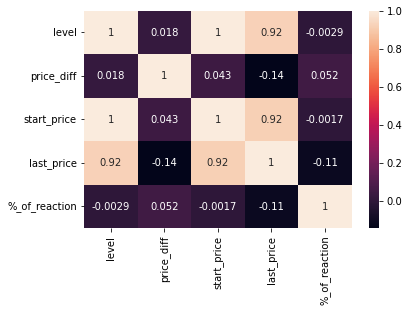

In [51]:
corr_matrix = df_reactions.corr()
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f75074d3280>,
 'caps': [<matplotlib.lines.Line2D at 0x7f75074d3820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f750323ef70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f75074d3dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f75074e20d0>],
 'means': []}

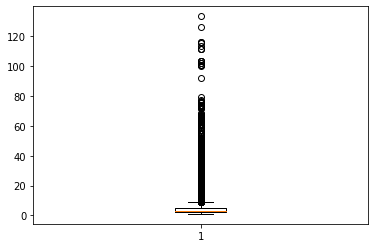

In [52]:
plt.boxplot(df_reactions["%_of_reaction"])

In [53]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

40.881728333462874

In [54]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

3.641768374928773

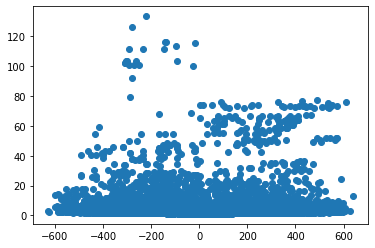

In [55]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [56]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [57]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [58]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction  \
count   9105.000000  9105.000000   9105.000000   9105.000000    9105.000000   
mean   40427.494723     0.195013  40425.282223  40174.811424       5.760417   
std    12124.704056   264.480280  12133.233844  12685.832217      10.459730   
min    15781.290000  -626.800000  15815.210000  15476.000000       1.027283   
25%    33092.970000  -201.140000  33205.140000  32399.000000       2.023037   
50%    39974.450000    -0.510000  39789.140000  39869.000000       2.802706   
75%    48821.880000   202.670000  48747.460000  48761.000000       4.863577   
max    67525.820000   638.340000  68116.560000  69000.000000     133.364652   

       %_diff_of_lvl  
count    9105.000000  
mean       -0.005204  
std         0.626207  
min        -0.999955  
25%        -0.589937  
50%        -0.001426  
75%         0.566056  
max         0.999875

### Testing the price action in the 30 minute timeframe

In [59]:
for stat in Statistics_hfprc:
  print(len(stat))

12
59
422


Reinitializing the statistics table

In [60]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
Statistics_oneprc = []
for Z in Z_parameter:
  for statistics in Statistics :
    statistics.drop_duplicates(subset=["levels"],inplace = True)
    statistics["level_min"] = statistics.levels * (1-(Z/100))
    statistics["level_max"] = statistics.levels * (1+(Z/100))
    statistics["touches as supp"] = [0]*len(statistics)
    statistics["touches as resistance"] = [0]*len(statistics)
    statistics["num bounces"] = [0]*len(statistics)
    statistics["num rejections"] = [0]*len(statistics)

    if Z == 0.5:
      Statistics_hfprc.append(statistics)
    else :
      Statistics_oneprc.append(statistics)

Getting reactions for the red candles

In [61]:
from operator import is_
#####real

touches_suppport = []
touches_resistance = []
reactions = []
indexes = []


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_oneprc[2]
testing_price = testing_levels[1]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [62]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [63]:
statistics

dates    levels   level_min   level_max  \
0   2021-01-04 00:59:59.999  33000.05  32670.0495  33330.0505   
1   2021-01-09 00:59:59.999  40586.96  40181.0904  40992.8296   
2   2021-01-15 00:59:59.999  39145.21  38753.7579  39536.6621   
3   2021-01-19 00:59:59.999  36622.46  36256.2354  36988.6846   
4   2021-01-23 00:59:59.999  32950.00  32620.5000  33279.5000   
..                      ...       ...         ...         ...   
417 2023-02-11 00:59:59.999  21625.19  21408.9381  21841.4419   
418 2023-02-14 00:59:59.999  21774.63  21556.8837  21992.3763   
419 2023-02-17 00:59:59.999  23517.72  23282.5428  23752.8972   
420 2023-02-20 00:59:59.999  24272.51  24029.7849  24515.2351   
421 2023-02-26 00:59:59.999  23157.07  22925.4993  23388.6407   

     touches as supp  touches as resistance  num bounces  num rejections  
0                 49                     47           24              26  
1                 64                     55           17              26  
2                 89                     84           32              49  
3                 58                     57           35              30  
4                 48                     35           22              19  
..               ...                    ...          ...             ...  
417                4                      7            2               0  
418                2                      2            1               1  
419                4                      6            0               0  
420                7                      5            1               2  
421                5                      3            1               0  

[422 rows x 8 columns]

In [64]:
stats = statistics.sum()

<ipython-input-64-ac83d3a43aa2>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



number of reactions

In [65]:
len(reactions)

7985

In [66]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  15666276.78  1.550961e+07  1.582294e+07          10740.0   

   touches as resistance  num bounces  num rejections  
0                10316.0       3944.0          4041.0

In [67]:
st = pd.DataFrame(stats)

In [68]:
st["data"] = st.index

In [69]:
st

0                   data
levels                 1.566628e+07                 levels
level_min              1.550961e+07              level_min
level_max              1.582294e+07              level_max
touches as supp        1.074000e+04        touches as supp
touches as resistance  1.031600e+04  touches as resistance
num bounces            3.944000e+03            num bounces
num rejections         4.041000e+03         num rejections

Touches as support :

In [70]:
st[0].iloc[3]

10740.0

Touches as resistance :

In [71]:
st[0].iloc[4]

10316.0

number of bounces :

In [72]:
st[0].iloc[5]

3944.0

number of rejections

In [73]:
st[0].iloc[6]

4041.0

<AxesSubplot:xlabel='data'>

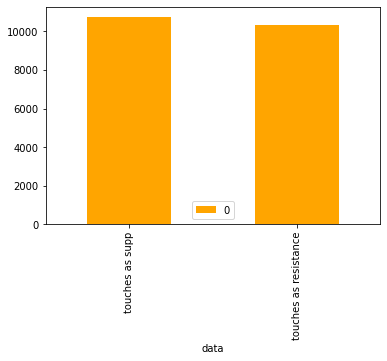

In [74]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

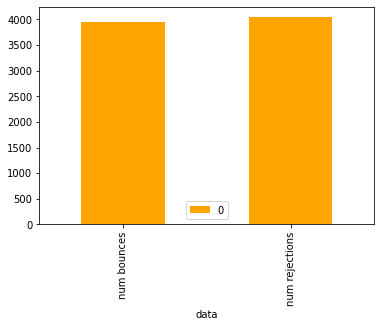

In [75]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [76]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

37.922682370820674 %


In [77]:
df_reactions = pd.DataFrame(reactions)

In [78]:
df_reactions

0       1     2                       3          4  \
0     33000.05 -303.57  body 2021-01-04 02:29:59.999     bounce   
1     33000.05 -127.42  body 2021-01-11 07:59:59.999     bounce   
2     33000.05 -300.05   wig 2021-01-11 14:59:59.999     bounce   
3     33000.05 -180.07   wig 2021-01-12 15:29:59.999     bounce   
4     33000.05 -250.05   wig 2021-01-13 03:29:59.999     bounce   
...        ...     ...   ...                     ...        ...   
7980  22827.38  184.01  wick 2023-02-09 01:29:59.999  rejection   
7981  22762.52  225.56  body 2023-02-09 01:29:59.999  rejection   
7982  21774.63  122.37  wick 2023-02-14 13:59:59.999  rejection   
7983  24272.51  139.01  wick 2023-02-20 01:29:59.999  rejection   
7984  24272.51  221.77  wick 2023-02-23 09:29:59.999  rejection   

                                                      5  
0     (33600.0, 32620.01, 32829.72786, 2021-01-04 06...  
1     (36360.0, 32550.0, 33365.34, 2021-01-11 13:29:...  
2     (33425.68, 32700.0, 32855.29552, 2021-01-11 15...  
3     (35550.0, 32819.98, 33404.204280000005, 2021-0...  
4     (34375.51, 32750.0, 33097.85914, 2021-01-13 05...  
...                                                 ...  
7980  (21351.07, 23011.39, 22656.08152, 2023-02-15 1...  
7981  (21351.07, 23011.39, 22656.08152, 2023-02-15 1...  
7982  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  
7983  (23840.83, 24411.52, 24289.392340000002, 2023-...  
7984  (22722.0, 24494.28, 24115.01208, 2023-02-27 11...  

[7985 rows x 6 columns]

In [79]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -303.57      body 2021-01-04 02:29:59.999     bounce   
1     33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
2     33000.05     -300.05       wig 2021-01-11 14:59:59.999     bounce   
3     33000.05     -180.07       wig 2021-01-12 15:29:59.999     bounce   
4     33000.05     -250.05       wig 2021-01-13 03:29:59.999     bounce   
...        ...         ...       ...                     ...        ...   
7980  22827.38      184.01      wick 2023-02-09 01:29:59.999  rejection   
7981  22762.52      225.56      body 2023-02-09 01:29:59.999  rejection   
7982  21774.63      122.37      wick 2023-02-14 13:59:59.999  rejection   
7983  24272.51      139.01      wick 2023-02-20 01:29:59.999  rejection   
7984  24272.51      221.77      wick 2023-02-23 09:29:59.999  rejection   

                                          reaction_info  
0     (33600.0, 32620.01, 32829.72786, 2021-01-04 06...  
1     (36360.0, 32550.0, 33365.34, 2021-01-11 13:29:...  
2     (33425.68, 32700.0, 32855.29552, 2021-01-11 15...  
3     (35550.0, 32819.98, 33404.204280000005, 2021-0...  
4     (34375.51, 32750.0, 33097.85914, 2021-01-13 05...  
...                                                 ...  
7980  (21351.07, 23011.39, 22656.08152, 2023-02-15 1...  
7981  (21351.07, 23011.39, 22656.08152, 2023-02-15 1...  
7982  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  
7983  (23840.83, 24411.52, 24289.392340000002, 2023-...  
7984  (22722.0, 24494.28, 24115.01208, 2023-02-27 11...  

[7985 rows x 6 columns]

In [80]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [81]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [82]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -303.57      body 2021-01-04 02:29:59.999     bounce   
1     33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
2     33000.05     -300.05       wig 2021-01-11 14:59:59.999     bounce   
3     33000.05     -180.07       wig 2021-01-12 15:29:59.999     bounce   
4     33000.05     -250.05       wig 2021-01-13 03:29:59.999     bounce   
...        ...         ...       ...                     ...        ...   
7980  22827.38      184.01      wick 2023-02-09 01:29:59.999  rejection   
7981  22762.52      225.56      body 2023-02-09 01:29:59.999  rejection   
7982  21774.63      122.37      wick 2023-02-14 13:59:59.999  rejection   
7983  24272.51      139.01      wick 2023-02-20 01:29:59.999  rejection   
7984  24272.51      221.77      wick 2023-02-23 09:29:59.999  rejection   

      start_price  last_price           end_of_bounce  
0        32620.01    33600.00 2021-01-04 06:59:59.999  
1        32550.00    36360.00 2021-01-11 13:29:59.999  
2        32700.00    33425.68 2021-01-11 15:59:59.999  
3        32819.98    35550.00 2021-01-12 23:59:59.999  
4        32750.00    34375.51 2021-01-13 05:59:59.999  
...           ...         ...                     ...  
7980     23011.39    21351.07 2023-02-15 13:29:59.999  
7981     23011.39    21351.07 2023-02-15 13:29:59.999  
7982     21897.00    21532.77 2023-02-14 15:59:59.999  
7983     24411.52    23840.83 2023-02-20 02:59:59.999  
7984     24494.28    22722.00 2023-02-27 11:59:59.999  

[7985 rows x 8 columns]

In [83]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [84]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -303.57      body 2021-01-04 02:29:59.999     bounce   
1     33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
2     33000.05     -300.05       wig 2021-01-11 14:59:59.999     bounce   
3     33000.05     -180.07       wig 2021-01-12 15:29:59.999     bounce   
4     33000.05     -250.05       wig 2021-01-13 03:29:59.999     bounce   
...        ...         ...       ...                     ...        ...   
7980  22827.38      184.01      wick 2023-02-09 01:29:59.999  rejection   
7981  22762.52      225.56      body 2023-02-09 01:29:59.999  rejection   
7982  21774.63      122.37      wick 2023-02-14 13:59:59.999  rejection   
7983  24272.51      139.01      wick 2023-02-20 01:29:59.999  rejection   
7984  24272.51      221.77      wick 2023-02-23 09:29:59.999  rejection   

      start_price  last_price           end_of_bounce  %_of_reaction  
0        32620.01    33600.00 2021-01-04 06:59:59.999      -3.004260  
1        32550.00    36360.00 2021-01-11 13:29:59.999     -11.705069  
2        32700.00    33425.68 2021-01-11 15:59:59.999      -2.219205  
3        32819.98    35550.00 2021-01-12 23:59:59.999      -8.318165  
4        32750.00    34375.51 2021-01-13 05:59:59.999      -4.963389  
...           ...         ...                     ...            ...  
7980     23011.39    21351.07 2023-02-15 13:29:59.999       7.215210  
7981     23011.39    21351.07 2023-02-15 13:29:59.999       7.215210  
7982     21897.00    21532.77 2023-02-14 15:59:59.999       1.663379  
7983     24411.52    23840.83 2023-02-20 02:59:59.999       2.337790  
7984     24494.28    22722.00 2023-02-27 11:59:59.999       7.235485  

[7985 rows x 9 columns]

In [85]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [86]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction
count   7985.000000  7985.000000   7985.000000   7985.000000    7985.000000
mean   39908.751068     6.033195  39913.487646  39679.797117       5.909082
std    12423.747644   257.321617  12433.948669  12950.278491      10.572355
min    15781.290000  -622.440000  15815.210000  15476.000000       1.011354
25%    32254.190000  -187.880000  32238.580000  31111.010000       2.051594
50%    39246.780000     4.810000  39476.000000  39476.000000       2.916047
75%    48821.880000   200.410000  48651.060000  48638.000000       4.994023
max    67525.820000   611.620000  68116.560000  69000.000000     133.463035

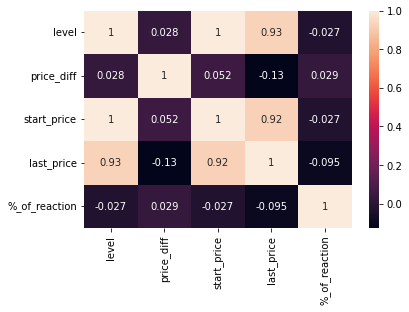

In [87]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7507b9fc40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7502a65220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7507b9fa90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7502a657c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7502a65a90>],
 'means': []}

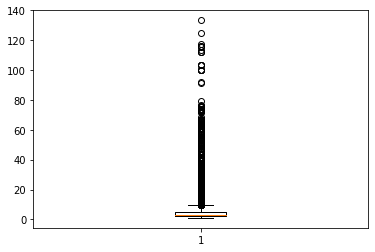

In [88]:
plt.boxplot(df_reactions["%_of_reaction"])

In [89]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

40.24769876100134

In [90]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

3.746919641001322

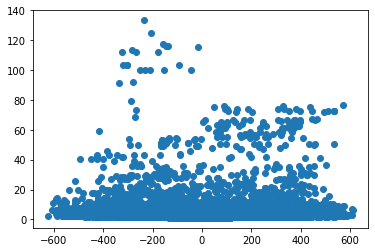

In [91]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [92]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [93]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [94]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction  \
count   7985.000000  7985.000000   7985.000000   7985.000000    7985.000000   
mean   39908.751068     6.033195  39913.487646  39679.797117       5.909082   
std    12423.747644   257.321617  12433.948669  12950.278491      10.572355   
min    15781.290000  -622.440000  15815.210000  15476.000000       1.011354   
25%    32254.190000  -187.880000  32238.580000  31111.010000       2.051594   
50%    39246.780000     4.810000  39476.000000  39476.000000       2.916047   
75%    48821.880000   200.410000  48651.060000  48638.000000       4.994023   
max    67525.820000   611.620000  68116.560000  69000.000000     133.463035   

       %_diff_of_lvl  
count    7985.000000  
mean        0.009418  
std         0.617178  
min        -0.999894  
25%        -0.558688  
50%         0.014216  
75%         0.573578  
max         0.999674

### Testing the price action in the 1 hour timeframe

Reinitializing the statistics table

In [95]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
Statistics_oneprc = []
for Z in Z_parameter:
  for statistics in Statistics :
    statistics.drop_duplicates(subset=["levels"],inplace = True)
    statistics["level_min"] = statistics.levels * (1-(Z/100))
    statistics["level_max"] = statistics.levels * (1+(Z/100))
    statistics["touches as supp"] = [0]*len(statistics)
    statistics["touches as resistance"] = [0]*len(statistics)
    statistics["num bounces"] = [0]*len(statistics)
    statistics["num rejections"] = [0]*len(statistics)

    if Z == 0.5:
      Statistics_hfprc.append(statistics)
    else :
      Statistics_oneprc.append(statistics)

Getting reactions for the red candles

In [96]:
from operator import is_
#####real




touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_oneprc[2]
testing_price = testing_levels[2]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [97]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [98]:
statistics

dates    levels   level_min   level_max  \
0   2021-01-04 00:59:59.999  33000.05  32670.0495  33330.0505   
1   2021-01-09 00:59:59.999  40586.96  40181.0904  40992.8296   
2   2021-01-15 00:59:59.999  39145.21  38753.7579  39536.6621   
3   2021-01-19 00:59:59.999  36622.46  36256.2354  36988.6846   
4   2021-01-23 00:59:59.999  32950.00  32620.5000  33279.5000   
..                      ...       ...         ...         ...   
417 2023-02-11 00:59:59.999  21625.19  21408.9381  21841.4419   
418 2023-02-14 00:59:59.999  21774.63  21556.8837  21992.3763   
419 2023-02-17 00:59:59.999  23517.72  23282.5428  23752.8972   
420 2023-02-20 00:59:59.999  24272.51  24029.7849  24515.2351   
421 2023-02-26 00:59:59.999  23157.07  22925.4993  23388.6407   

     touches as supp  touches as resistance  num bounces  num rejections  
0                 31                     32           16              19  
1                 48                     42           15              23  
2                 62                     56           23              45  
3                 41                     39           30              23  
4                 31                     25           17              15  
..               ...                    ...          ...             ...  
417                3                      4            2               1  
418                2                      1            1               1  
419                0                      1            0               0  
420                3                      2            0               0  
421                0                      0            0               0  

[422 rows x 8 columns]

In [99]:
stats = statistics.sum()

<ipython-input-99-ac83d3a43aa2>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



number of reactions

In [100]:
len(reactions)

6486

In [101]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  15666276.78  1.550961e+07  1.582294e+07           7126.0   

   touches as resistance  num bounces  num rejections  
0                 6862.0       3260.0          3226.0

In [102]:
st = pd.DataFrame(stats)

In [103]:
st["data"] = st.index

In [104]:
st

0                   data
levels                 1.566628e+07                 levels
level_min              1.550961e+07              level_min
level_max              1.582294e+07              level_max
touches as supp        7.126000e+03        touches as supp
touches as resistance  6.862000e+03  touches as resistance
num bounces            3.260000e+03            num bounces
num rejections         3.226000e+03         num rejections

Touches as suport :

In [105]:
st[0].iloc[3]

7126.0

Touches as resistance :

In [106]:
st[0].iloc[4]

6862.0

number of bounces :

In [107]:
st[0].iloc[5]

3260.0

number of rejections

In [108]:
st[0].iloc[6]

3226.0

<AxesSubplot:xlabel='data'>

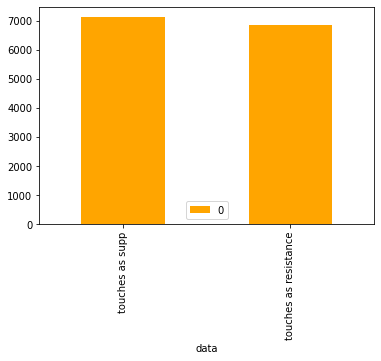

In [109]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

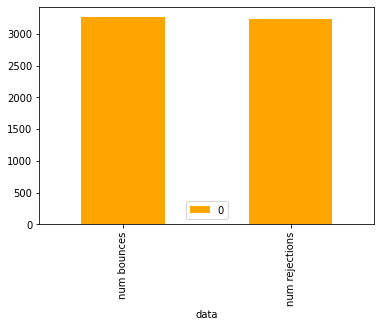

In [110]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [111]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

46.36831569917072 %


In [112]:
df_reactions = pd.DataFrame(reactions)

In [113]:
df_reactions

0       1     2                       3          4  \
0     33000.05 -156.17  body 2021-01-04 01:59:59.999     bounce   
1     33000.05 -127.42  body 2021-01-11 07:59:59.999     bounce   
2     33000.05 -300.05   wig 2021-01-11 14:59:59.999     bounce   
3     33000.05 -231.82  body 2021-01-25 03:59:59.999     bounce   
4     33000.05 -175.05   wig 2021-01-30 04:59:59.999     bounce   
...        ...     ...   ...                     ...        ...   
6481  23021.40    5.60  wick 2023-02-08 18:59:59.999  rejection   
6482  22827.38  184.01  wick 2023-02-09 01:59:59.999  rejection   
6483  22762.52  218.12  body 2023-02-09 01:59:59.999  rejection   
6484  21625.19   62.76  wick 2023-02-13 15:59:59.999  rejection   
6485  21774.63  122.37  wick 2023-02-14 13:59:59.999  rejection   

                                                      5  
0     (33600.0, 32400.25, 32656.9965, 2021-01-04 08:...  
1     (36360.0, 32550.0, 33365.34, 2021-01-11 13:59:...  
2     (33770.11, 32700.0, 32929.00354, 2021-01-11 16...  
3     (33797.96, 32636.36, 32884.9424, 2021-01-25 10...  
4     (34800.0, 32825.0, 33247.65, 2021-01-31 11:59:...  
...                                                 ...  
6481  (22778.93, 23027.0, 22973.91302, 2023-02-08 22...  
6482  (21351.07, 23011.39, 22656.08152, 2023-02-15 1...  
6483  (21351.07, 23011.39, 22656.08152, 2023-02-15 1...  
6484  (21351.07, 21687.95, 21615.85768, 2023-02-13 1...  
6485  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  

[6486 rows x 6 columns]

In [114]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -156.17      body 2021-01-04 01:59:59.999     bounce   
1     33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
2     33000.05     -300.05       wig 2021-01-11 14:59:59.999     bounce   
3     33000.05     -231.82      body 2021-01-25 03:59:59.999     bounce   
4     33000.05     -175.05       wig 2021-01-30 04:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
6481  23021.40        5.60      wick 2023-02-08 18:59:59.999  rejection   
6482  22827.38      184.01      wick 2023-02-09 01:59:59.999  rejection   
6483  22762.52      218.12      body 2023-02-09 01:59:59.999  rejection   
6484  21625.19       62.76      wick 2023-02-13 15:59:59.999  rejection   
6485  21774.63      122.37      wick 2023-02-14 13:59:59.999  rejection   

                                          reaction_info  
0     (33600.0, 32400.25, 32656.9965, 2021-01-04 08:...  
1     (36360.0, 32550.0, 33365.34, 2021-01-11 13:59:...  
2     (33770.11, 32700.0, 32929.00354, 2021-01-11 16...  
3     (33797.96, 32636.36, 32884.9424, 2021-01-25 10...  
4     (34800.0, 32825.0, 33247.65, 2021-01-31 11:59:...  
...                                                 ...  
6481  (22778.93, 23027.0, 22973.91302, 2023-02-08 22...  
6482  (21351.07, 23011.39, 22656.08152, 2023-02-15 1...  
6483  (21351.07, 23011.39, 22656.08152, 2023-02-15 1...  
6484  (21351.07, 21687.95, 21615.85768, 2023-02-13 1...  
6485  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  

[6486 rows x 6 columns]

In [115]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [116]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [117]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -156.17      body 2021-01-04 01:59:59.999     bounce   
1     33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
2     33000.05     -300.05       wig 2021-01-11 14:59:59.999     bounce   
3     33000.05     -231.82      body 2021-01-25 03:59:59.999     bounce   
4     33000.05     -175.05       wig 2021-01-30 04:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
6481  23021.40        5.60      wick 2023-02-08 18:59:59.999  rejection   
6482  22827.38      184.01      wick 2023-02-09 01:59:59.999  rejection   
6483  22762.52      218.12      body 2023-02-09 01:59:59.999  rejection   
6484  21625.19       62.76      wick 2023-02-13 15:59:59.999  rejection   
6485  21774.63      122.37      wick 2023-02-14 13:59:59.999  rejection   

      start_price  last_price           end_of_bounce  
0        32400.25    33600.00 2021-01-04 08:59:59.999  
1        32550.00    36360.00 2021-01-11 13:59:59.999  
2        32700.00    33770.11 2021-01-11 16:59:59.999  
3        32636.36    33797.96 2021-01-25 10:59:59.999  
4        32825.00    34800.00 2021-01-31 11:59:59.999  
...           ...         ...                     ...  
6481     23027.00    22778.93 2023-02-08 22:59:59.999  
6482     23011.39    21351.07 2023-02-15 13:59:59.999  
6483     23011.39    21351.07 2023-02-15 13:59:59.999  
6484     21687.95    21351.07 2023-02-13 19:59:59.999  
6485     21897.00    21532.77 2023-02-14 15:59:59.999  

[6486 rows x 8 columns]

In [118]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [119]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -156.17      body 2021-01-04 01:59:59.999     bounce   
1     33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
2     33000.05     -300.05       wig 2021-01-11 14:59:59.999     bounce   
3     33000.05     -231.82      body 2021-01-25 03:59:59.999     bounce   
4     33000.05     -175.05       wig 2021-01-30 04:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
6481  23021.40        5.60      wick 2023-02-08 18:59:59.999  rejection   
6482  22827.38      184.01      wick 2023-02-09 01:59:59.999  rejection   
6483  22762.52      218.12      body 2023-02-09 01:59:59.999  rejection   
6484  21625.19       62.76      wick 2023-02-13 15:59:59.999  rejection   
6485  21774.63      122.37      wick 2023-02-14 13:59:59.999  rejection   

      start_price  last_price           end_of_bounce  %_of_reaction  
0        32400.25    33600.00 2021-01-04 08:59:59.999      -3.702904  
1        32550.00    36360.00 2021-01-11 13:59:59.999     -11.705069  
2        32700.00    33770.11 2021-01-11 16:59:59.999      -3.272508  
3        32636.36    33797.96 2021-01-25 10:59:59.999      -3.559220  
4        32825.00    34800.00 2021-01-31 11:59:59.999      -6.016756  
...           ...         ...                     ...            ...  
6481     23027.00    22778.93 2023-02-08 22:59:59.999       1.077301  
6482     23011.39    21351.07 2023-02-15 13:59:59.999       7.215210  
6483     23011.39    21351.07 2023-02-15 13:59:59.999       7.215210  
6484     21687.95    21351.07 2023-02-13 19:59:59.999       1.553305  
6485     21897.00    21532.77 2023-02-14 15:59:59.999       1.663379  

[6486 rows x 9 columns]

In [120]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [121]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction
count   6486.000000  6486.000000   6486.000000   6486.000000    6486.000000
mean   39731.942203     1.304018  39731.853489  39488.529664       6.380302
std    12514.572585   253.883011  12523.629468  13122.650686      11.188039
min    15781.290000  -605.570000  15701.000000  15476.000000       1.020504
25%    32078.000000  -187.222500  32150.000000  30699.250000       2.147769
50%    39241.920000    -2.045000  39427.000000  39450.345000       3.124228
75%    48580.470000   192.100000  48600.000000  48548.260000       5.526887
max    67525.820000   638.340000  68116.560000  69000.000000     133.463035

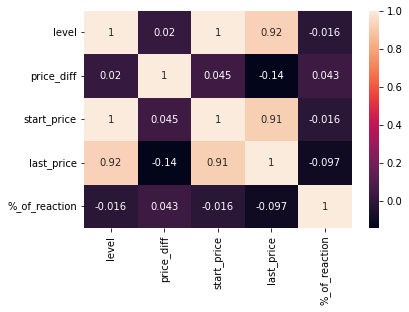

In [122]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7507546a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7507546fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7507546880>],
 'medians': [<matplotlib.lines.Line2D at 0x7f75089fb5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f75089fb880>],
 'means': []}

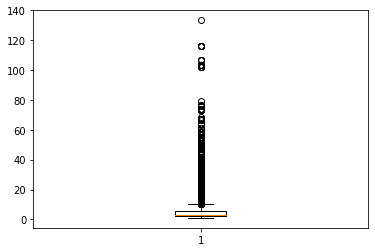

In [123]:
plt.boxplot(df_reactions["%_of_reaction"])

In [124]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

40.49751128033552

In [125]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

3.9155609251690477

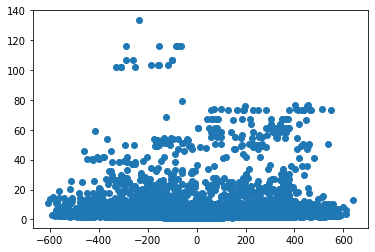

In [126]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [127]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [128]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [129]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction  \
count   6486.000000  6486.000000   6486.000000   6486.000000    6486.000000   
mean   39731.942203     1.304018  39731.853489  39488.529664       6.380302   
std    12514.572585   253.883011  12523.629468  13122.650686      11.188039   
min    15781.290000  -605.570000  15701.000000  15476.000000       1.020504   
25%    32078.000000  -187.222500  32150.000000  30699.250000       2.147769   
50%    39241.920000    -2.045000  39427.000000  39450.345000       3.124228   
75%    48580.470000   192.100000  48600.000000  48548.260000       5.526887   
max    67525.820000   638.340000  68116.560000  69000.000000     133.463035   

       %_diff_of_lvl  
count    6486.000000  
mean       -0.001057  
std         0.612964  
min        -0.999646  
25%        -0.572470  
50%        -0.005587  
75%         0.551191  
max         0.999674

### Testing the price action in the 4 hour timeframe

Reinitializing the statistics table

In [130]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
Statistics_oneprc = []
for Z in Z_parameter:
  for statistics in Statistics :
    statistics.drop_duplicates(subset=["levels"],inplace = True)
    statistics["level_min"] = statistics.levels * (1-(Z/100))
    statistics["level_max"] = statistics.levels * (1+(Z/100))
    statistics["touches as supp"] = [0]*len(statistics)
    statistics["touches as resistance"] = [0]*len(statistics)
    statistics["num bounces"] = [0]*len(statistics)
    statistics["num rejections"] = [0]*len(statistics)

    if Z == 0.5:
      Statistics_hfprc.append(statistics)
    else :
      Statistics_oneprc.append(statistics)

Getting reactions for the red candles

In [131]:
from operator import is_
#####real



touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_oneprc[2]
testing_price = testing_levels[3]

for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

Getting reactions for the green candles

In [132]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [133]:
statistics

dates    levels   level_min   level_max  \
0   2021-01-04 00:59:59.999  33000.05  32670.0495  33330.0505   
1   2021-01-09 00:59:59.999  40586.96  40181.0904  40992.8296   
2   2021-01-15 00:59:59.999  39145.21  38753.7579  39536.6621   
3   2021-01-19 00:59:59.999  36622.46  36256.2354  36988.6846   
4   2021-01-23 00:59:59.999  32950.00  32620.5000  33279.5000   
..                      ...       ...         ...         ...   
417 2023-02-11 00:59:59.999  21625.19  21408.9381  21841.4419   
418 2023-02-14 00:59:59.999  21774.63  21556.8837  21992.3763   
419 2023-02-17 00:59:59.999  23517.72  23282.5428  23752.8972   
420 2023-02-20 00:59:59.999  24272.51  24029.7849  24515.2351   
421 2023-02-26 00:59:59.999  23157.07  22925.4993  23388.6407   

     touches as supp  touches as resistance  num bounces  num rejections  
0                 10                      9           11               7  
1                 18                     17            6              12  
2                 21                     28           11              22  
3                 22                     15           15               6  
4                 12                      8           12               6  
..               ...                    ...          ...             ...  
417                2                      4            1               0  
418                1                      1            0               0  
419                2                      1            0               0  
420                1                      2            0               1  
421                1                      1            1               0  

[422 rows x 8 columns]

In [134]:
stats = statistics.sum()

<ipython-input-134-ac83d3a43aa2>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



number of reactions

In [135]:
len(reactions)

3652

In [136]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  15666276.78  1.550961e+07  1.582294e+07           3286.0   

   touches as resistance  num bounces  num rejections  
0                 3240.0       1890.0          1762.0

In [137]:
st = pd.DataFrame(stats)

In [138]:
st["data"] = st.index

In [139]:
st

0                   data
levels                 1.566628e+07                 levels
level_min              1.550961e+07              level_min
level_max              1.582294e+07              level_max
touches as supp        3.286000e+03        touches as supp
touches as resistance  3.240000e+03  touches as resistance
num bounces            1.890000e+03            num bounces
num rejections         1.762000e+03         num rejections

Touches as suport :

In [140]:
st[0].iloc[3]

3286.0

Touches as resistance :

In [141]:
st[0].iloc[4]

3240.0

number of bounces :

In [142]:
st[0].iloc[5]

1890.0

number of rejections

In [143]:
st[0].iloc[6]

1762.0

<AxesSubplot:xlabel='data'>

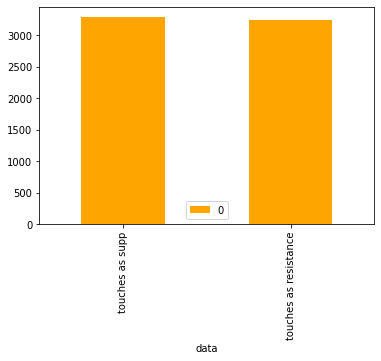

In [144]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

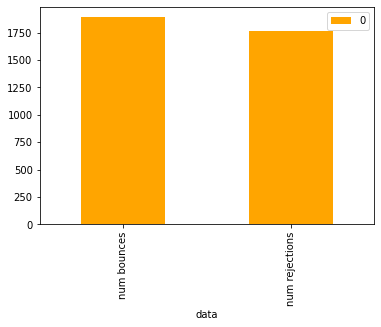

In [145]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [146]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

55.96077229543365 %


In [147]:
df_reactions = pd.DataFrame(reactions)

In [148]:
df_reactions

0       1     2                       3          4  \
0     33000.05 -249.96   wig 2021-01-25 12:59:59.999     bounce   
1     33000.05 -175.05   wig 2021-01-30 04:59:59.999     bounce   
2     33000.05 -182.96  body 2021-06-08 04:59:59.999     bounce   
3     33000.05 -136.98  body 2021-06-09 04:59:59.999     bounce   
4     33000.05 -129.06   wig 2021-06-23 20:59:59.999     bounce   
...        ...     ...   ...                     ...        ...   
3647  23021.40    8.60  wick 2023-02-06 00:59:59.999  rejection   
3648  23021.40  163.89  body 2023-02-25 00:59:59.999  rejection   
3649  22827.38  152.92  wick 2023-02-09 00:59:59.999  rejection   
3650  22762.52  217.78  wick 2023-02-09 00:59:59.999  rejection   
3651  24272.51  182.34  body 2023-02-23 04:59:59.999  rejection   

                                                      5  
0     (34875.0, 32750.09, 33204.82074, 2021-01-26 00...  
1     (34800.0, 32825.0, 33247.65, 2021-01-31 12:59:...  
2     (33373.01, 32351.0, 32569.71014, 2021-06-08 16...  
3     (41330.0, 32396.82, 34308.52052, 2021-06-20 12...  
4     (33785.26, 32870.99, 33066.64378, 2021-06-24 0...  
...                                                 ...  
3647  (22628.13, 23030.0, 22943.99982, 2023-02-06 16...  
3648  (22722.0, 23332.79, 23202.08094, 2023-02-26 04...  
3649  (21351.07, 22980.3, 22631.64478, 2023-02-15 16...  
3650  (21351.07, 22980.3, 22631.64478, 2023-02-15 16...  
3651  (22722.0, 24599.59, 24197.78574, 2023-02-27 12...  

[3652 rows x 6 columns]

In [149]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -249.96       wig 2021-01-25 12:59:59.999     bounce   
1     33000.05     -175.05       wig 2021-01-30 04:59:59.999     bounce   
2     33000.05     -182.96      body 2021-06-08 04:59:59.999     bounce   
3     33000.05     -136.98      body 2021-06-09 04:59:59.999     bounce   
4     33000.05     -129.06       wig 2021-06-23 20:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
3647  23021.40        8.60      wick 2023-02-06 00:59:59.999  rejection   
3648  23021.40      163.89      body 2023-02-25 00:59:59.999  rejection   
3649  22827.38      152.92      wick 2023-02-09 00:59:59.999  rejection   
3650  22762.52      217.78      wick 2023-02-09 00:59:59.999  rejection   
3651  24272.51      182.34      body 2023-02-23 04:59:59.999  rejection   

                                          reaction_info  
0     (34875.0, 32750.09, 33204.82074, 2021-01-26 00...  
1     (34800.0, 32825.0, 33247.65, 2021-01-31 12:59:...  
2     (33373.01, 32351.0, 32569.71014, 2021-06-08 16...  
3     (41330.0, 32396.82, 34308.52052, 2021-06-20 12...  
4     (33785.26, 32870.99, 33066.64378, 2021-06-24 0...  
...                                                 ...  
3647  (22628.13, 23030.0, 22943.99982, 2023-02-06 16...  
3648  (22722.0, 23332.79, 23202.08094, 2023-02-26 04...  
3649  (21351.07, 22980.3, 22631.64478, 2023-02-15 16...  
3650  (21351.07, 22980.3, 22631.64478, 2023-02-15 16...  
3651  (22722.0, 24599.59, 24197.78574, 2023-02-27 12...  

[3652 rows x 6 columns]

In [150]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [151]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [152]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -249.96       wig 2021-01-25 12:59:59.999     bounce   
1     33000.05     -175.05       wig 2021-01-30 04:59:59.999     bounce   
2     33000.05     -182.96      body 2021-06-08 04:59:59.999     bounce   
3     33000.05     -136.98      body 2021-06-09 04:59:59.999     bounce   
4     33000.05     -129.06       wig 2021-06-23 20:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
3647  23021.40        8.60      wick 2023-02-06 00:59:59.999  rejection   
3648  23021.40      163.89      body 2023-02-25 00:59:59.999  rejection   
3649  22827.38      152.92      wick 2023-02-09 00:59:59.999  rejection   
3650  22762.52      217.78      wick 2023-02-09 00:59:59.999  rejection   
3651  24272.51      182.34      body 2023-02-23 04:59:59.999  rejection   

      start_price  last_price           end_of_bounce  
0        32750.09    34875.00 2021-01-26 00:59:59.999  
1        32825.00    34800.00 2021-01-31 12:59:59.999  
2        32351.00    33373.01 2021-06-08 16:59:59.999  
3        32396.82    41330.00 2021-06-20 12:59:59.999  
4        32870.99    33785.26 2021-06-24 04:59:59.999  
...           ...         ...                     ...  
3647     23030.00    22628.13 2023-02-06 16:59:59.999  
3648     23332.79    22722.00 2023-02-26 04:59:59.999  
3649     22980.30    21351.07 2023-02-15 16:59:59.999  
3650     22980.30    21351.07 2023-02-15 16:59:59.999  
3651     24599.59    22722.00 2023-02-27 12:59:59.999  

[3652 rows x 8 columns]

In [153]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [154]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -249.96       wig 2021-01-25 12:59:59.999     bounce   
1     33000.05     -175.05       wig 2021-01-30 04:59:59.999     bounce   
2     33000.05     -182.96      body 2021-06-08 04:59:59.999     bounce   
3     33000.05     -136.98      body 2021-06-09 04:59:59.999     bounce   
4     33000.05     -129.06       wig 2021-06-23 20:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
3647  23021.40        8.60      wick 2023-02-06 00:59:59.999  rejection   
3648  23021.40      163.89      body 2023-02-25 00:59:59.999  rejection   
3649  22827.38      152.92      wick 2023-02-09 00:59:59.999  rejection   
3650  22762.52      217.78      wick 2023-02-09 00:59:59.999  rejection   
3651  24272.51      182.34      body 2023-02-23 04:59:59.999  rejection   

      start_price  last_price           end_of_bounce  %_of_reaction  
0        32750.09    34875.00 2021-01-26 00:59:59.999      -6.488257  
1        32825.00    34800.00 2021-01-31 12:59:59.999      -6.016756  
2        32351.00    33373.01 2021-06-08 16:59:59.999      -3.159130  
3        32396.82    41330.00 2021-06-20 12:59:59.999     -27.574250  
4        32870.99    33785.26 2021-06-24 04:59:59.999      -2.781389  
...           ...         ...                     ...            ...  
3647     23030.00    22628.13 2023-02-06 16:59:59.999       1.744985  
3648     23332.79    22722.00 2023-02-26 04:59:59.999       2.617732  
3649     22980.30    21351.07 2023-02-15 16:59:59.999       7.089681  
3650     22980.30    21351.07 2023-02-15 16:59:59.999       7.089681  
3651     24599.59    22722.00 2023-02-27 12:59:59.999       7.632607  

[3652 rows x 9 columns]

In [155]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [156]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction
count   3652.000000  3652.000000   3652.000000   3652.000000    3652.000000
mean   39546.004532    -7.507429  39528.559559  39334.046506       7.135574
std    12782.785787   250.494777  12789.535523  13418.470344      10.919572
min    15781.290000  -609.360000  15660.000000  15476.000000       1.042721
25%    30851.990000  -191.735000  30699.000000  29218.960000       2.536697
50%    39671.370000   -11.690000  39751.000000  39900.390000       3.800046
75%    48580.470000   177.677500  48556.090000  48556.090000       6.605771
max    67525.820000   578.370000  67800.270000  69000.000000     116.136162

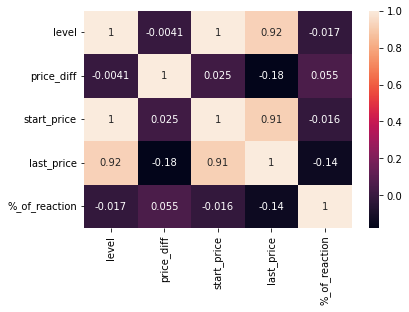

In [157]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f750289d490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f750289da30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f750289d2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f750289dfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f75048452e0>],
 'means': []}

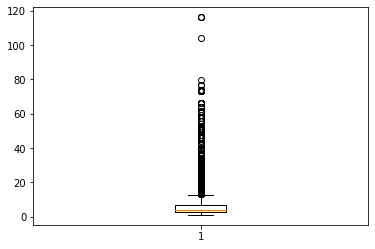

In [158]:
plt.boxplot(df_reactions["%_of_reaction"])

In [159]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

38.26891422426113

In [160]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

4.500289422886204

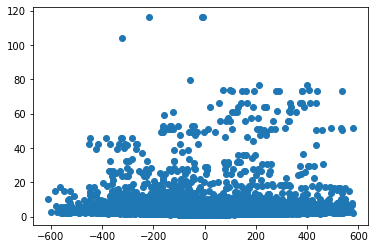

In [161]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [162]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [163]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [164]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction  \
count   3652.000000  3652.000000   3652.000000   3652.000000    3652.000000   
mean   39546.004532    -7.507429  39528.559559  39334.046506       7.135574   
std    12782.785787   250.494777  12789.535523  13418.470344      10.919572   
min    15781.290000  -609.360000  15660.000000  15476.000000       1.042721   
25%    30851.990000  -191.735000  30699.000000  29218.960000       2.536697   
50%    39671.370000   -11.690000  39751.000000  39900.390000       3.800046   
75%    48580.470000   177.677500  48556.090000  48556.090000       6.605771   
max    67525.820000   578.370000  67800.270000  69000.000000     116.136162   

       %_diff_of_lvl  
count    3652.000000  
mean       -0.019231  
std         0.602476  
min        -0.998691  
25%        -0.574000  
50%        -0.038393  
75%         0.527500  
max         0.999783

## testing the Daily levels with Z=0.5

### Testing the price action in the 15 minute timeframe

In [30]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
#Statistics_oneprc = []

for statistics in Statistics :
  statistics.drop_duplicates(subset=["levels"],inplace = True)
  statistics["level_min"] = statistics.levels * (1-(0.5/100))
  statistics["level_max"] = statistics.levels * (1+(0.5/100))
  statistics["touches as supp"] = [0]*len(statistics)
  statistics["touches as resistance"] = [0]*len(statistics)
  statistics["num bounces"] = [0]*len(statistics)
  statistics["num rejections"] = [0]*len(statistics)


  #print("wow")
  Statistics_hfprc.append(statistics)

In [31]:
for stat in Statistics_hfprc:
  print(len(stat))

12
59
422


In [32]:
from operator import is_
#####real


touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_hfprc[2]
testing_price = testing_levels[0]

for i,r in statistics.iterrows():
    print(i)
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-1 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [33]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    print(i)
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-1 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [34]:
statistics

dates    levels    level_min    level_max  \
0   2021-01-04 00:59:59.999  33000.05  32835.04975  33165.05025   
1   2021-01-09 00:59:59.999  40586.96  40384.02520  40789.89480   
2   2021-01-15 00:59:59.999  39145.21  38949.48395  39340.93605   
3   2021-01-19 00:59:59.999  36622.46  36439.34770  36805.57230   
4   2021-01-23 00:59:59.999  32950.00  32785.25000  33114.75000   
..                      ...       ...          ...          ...   
417 2023-02-11 00:59:59.999  21625.19  21517.06405  21733.31595   
418 2023-02-14 00:59:59.999  21774.63  21665.75685  21883.50315   
419 2023-02-17 00:59:59.999  23517.72  23400.13140  23635.30860   
420 2023-02-20 00:59:59.999  24272.51  24151.14745  24393.87255   
421 2023-02-26 00:59:59.999  23157.07  23041.28465  23272.85535   

     touches as supp  touches as resistance  num bounces  num rejections  
0                 64                     58           33              34  
1                 78                     61           34              36  
2                131                    104           49              68  
3                 84                     80           41              42  
4                 53                     54           28              35  
..               ...                    ...          ...             ...  
417                0                      0            0               0  
418                0                      0            0               0  
419                0                      0            0               0  
420                0                      0            0               0  
421                0                      0            0               0  

[422 rows x 8 columns]

In [35]:
stats = statistics.sum()

C:\Users\Hamza\AppData\Local\Temp/ipykernel_15740/1148250093.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [36]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  15666276.78  1.558795e+07  1.574461e+07          14066.0   

   touches as resistance  num bounces  num rejections  
0                13452.0       6183.0          6184.0

In [37]:
st = pd.DataFrame(stats)

In [38]:
st["data"] = st.index

In [39]:
st

0                   data
levels                 1.566628e+07                 levels
level_min              1.558795e+07              level_min
level_max              1.574461e+07              level_max
touches as supp        1.406600e+04        touches as supp
touches as resistance  1.345200e+04  touches as resistance
num bounces            6.183000e+03            num bounces
num rejections         6.184000e+03         num rejections

Touches as suport :

In [40]:
st[0].iloc[3]

14066.0

Touches as resistance :

In [41]:
st[0].iloc[4]

13452.0

number of bounces :

In [42]:
st[0].iloc[5]

6183.0

number of rejections

In [43]:
st[0].iloc[6]

6184.0

<AxesSubplot:xlabel='data'>

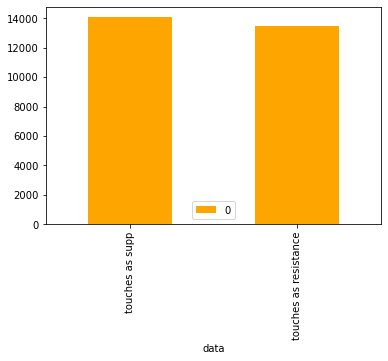

In [44]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

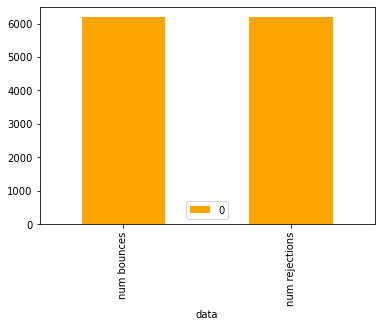

In [45]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [46]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

44.941492841049495 %


In [47]:
df_reactions = pd.DataFrame(reactions)

In [48]:
df_reactions

0       1     2                       3          4  \
0      33000.05 -123.94   wig 2021-01-05 19:29:59.999     bounce   
1      33000.05 -127.42  body 2021-01-11 07:59:59.999     bounce   
2      33000.05 -160.18  body 2021-01-11 18:59:59.999     bounce   
3      33000.05  -59.33  body 2021-01-12 15:29:59.999     bounce   
4      33000.05 -102.78   wig 2021-01-13 01:29:59.999     bounce   
...         ...     ...   ...                     ...        ...   
12362  23021.40   73.52  wick 2023-02-06 01:44:59.999  rejection   
12363  23021.40   53.00  wick 2023-02-06 20:14:59.999  rejection   
12364  23021.40   43.16  wick 2023-02-07 11:29:59.999  rejection   
12365  22827.38   63.18  wick 2023-02-06 06:14:59.999  rejection   
12366  22827.38   75.78  wick 2023-02-06 23:44:59.999  rejection   

                                                       5  
0      (35766.58, 32876.11, 33494.67058, 2021-01-06 1...  
1      (33850.0, 32550.0, 32828.2, 2021-01-11 08:29:5...  
2      (33247.12, 32321.0, 32519.18968, 2021-01-11 19...  
3      (35550.0, 32819.98, 33404.204280000005, 2021-0...  
4      (33254.23, 32897.27, 32973.659439999996, 2021-...  
...                                                  ...  
12362  (22628.13, 23094.92, 22995.02694, 2023-02-06 1...  
12363  (22638.0, 23074.4, 22981.010400000003, 2023-02...  
12364  (22870.23, 23064.56, 23022.97338, 2023-02-07 1...  
12365  (22628.13, 22890.56, 22834.399980000002, 2023-...  
12366  (22638.0, 22903.16, 22846.41576, 2023-02-07 02...  

[12367 rows x 6 columns]

In [49]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0      33000.05     -123.94       wig 2021-01-05 19:29:59.999     bounce   
1      33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
2      33000.05     -160.18      body 2021-01-11 18:59:59.999     bounce   
3      33000.05      -59.33      body 2021-01-12 15:29:59.999     bounce   
4      33000.05     -102.78       wig 2021-01-13 01:29:59.999     bounce   
...         ...         ...       ...                     ...        ...   
12362  23021.40       73.52      wick 2023-02-06 01:44:59.999  rejection   
12363  23021.40       53.00      wick 2023-02-06 20:14:59.999  rejection   
12364  23021.40       43.16      wick 2023-02-07 11:29:59.999  rejection   
12365  22827.38       63.18      wick 2023-02-06 06:14:59.999  rejection   
12366  22827.38       75.78      wick 2023-02-06 23:44:59.999  rejection   

                                           reaction_info  
0      (35766.58, 32876.11, 33494.67058, 2021-01-06 1...  
1      (33850.0, 32550.0, 32828.2, 2021-01-11 08:29:5...  
2      (33247.12, 32321.0, 32519.18968, 2021-01-11 19...  
3      (35550.0, 32819.98, 33404.204280000005, 2021-0...  
4      (33254.23, 32897.27, 32973.659439999996, 2021-...  
...                                                  ...  
12362  (22628.13, 23094.92, 22995.02694, 2023-02-06 1...  
12363  (22638.0, 23074.4, 22981.010400000003, 2023-02...  
12364  (22870.23, 23064.56, 23022.97338, 2023-02-07 1...  
12365  (22628.13, 22890.56, 22834.399980000002, 2023-...  
12366  (22638.0, 22903.16, 22846.41576, 2023-02-07 02...  

[12367 rows x 6 columns]

In [50]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [51]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [52]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0      33000.05     -123.94       wig 2021-01-05 19:29:59.999     bounce   
1      33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
2      33000.05     -160.18      body 2021-01-11 18:59:59.999     bounce   
3      33000.05      -59.33      body 2021-01-12 15:29:59.999     bounce   
4      33000.05     -102.78       wig 2021-01-13 01:29:59.999     bounce   
...         ...         ...       ...                     ...        ...   
12362  23021.40       73.52      wick 2023-02-06 01:44:59.999  rejection   
12363  23021.40       53.00      wick 2023-02-06 20:14:59.999  rejection   
12364  23021.40       43.16      wick 2023-02-07 11:29:59.999  rejection   
12365  22827.38       63.18      wick 2023-02-06 06:14:59.999  rejection   
12366  22827.38       75.78      wick 2023-02-06 23:44:59.999  rejection   

       start_price  last_price           end_of_bounce  
0         32876.11    35766.58 2021-01-06 10:29:59.999  
1         32550.00    33850.00 2021-01-11 08:29:59.999  
2         32321.00    33247.12 2021-01-11 19:59:59.999  
3         32819.98    35550.00 2021-01-12 23:59:59.999  
4         32897.27    33254.23 2021-01-13 01:59:59.999  
...            ...         ...                     ...  
12362     23094.92    22628.13 2023-02-06 16:59:59.999  
12363     23074.40    22638.00 2023-02-07 07:29:59.999  
12364     23064.56    22870.23 2023-02-07 17:44:59.999  
12365     22890.56    22628.13 2023-02-06 08:29:59.999  
12366     22903.16    22638.00 2023-02-07 02:14:59.999  

[12367 rows x 8 columns]

In [53]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [54]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [55]:
df_reactions.describe()

level    price_diff   start_price    last_price  %_of_reaction
count  12367.000000  12367.000000  12367.000000  12367.000000   12367.000000
mean   40474.862669      0.440813  40474.579888  40409.450332       3.294708
std    12499.243377    129.713772  12501.629555  12777.070359       7.597982
min    15781.290000   -305.140000  15770.010000  15476.000000       0.514907
25%    33000.050000    -97.315000  32953.530000  32597.760000       1.065082
50%    40525.390000      0.000000  40467.940000  40449.960000       1.546335
75%    48891.000000     98.790000  48888.965000  49003.135000       2.637328
max    67525.820000    321.670000  67800.270000  69000.000000     132.266222

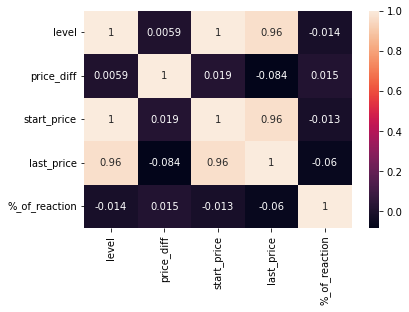

In [56]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1dab74b9be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1daae1a6340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dab74b97c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1daae1a6a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1daae1a6df0>],
 'means': []}

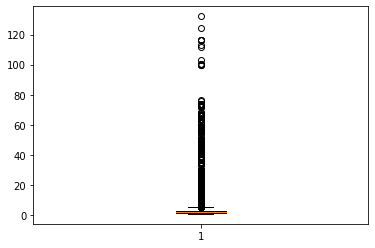

In [57]:
plt.boxplot(df_reactions["%_of_reaction"])

In [58]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

40.87562758896594

In [59]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

2.261201847391697

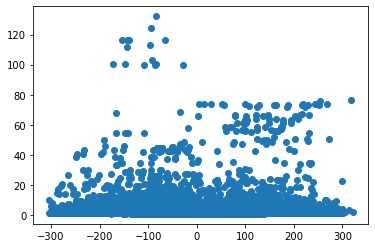

In [60]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [61]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [62]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [63]:
df_reactions.describe()

level    price_diff   start_price    last_price  %_of_reaction  \
count  12367.000000  12367.000000  12367.000000  12367.000000   12367.000000   
mean   40474.862669      0.440813  40474.579888  40409.450332       3.294708   
std    12499.243377    129.713772  12501.629555  12777.070359       7.597982   
min    15781.290000   -305.140000  15770.010000  15476.000000       0.514907   
25%    33000.050000    -97.315000  32953.530000  32597.760000       1.065082   
50%    40525.390000      0.000000  40467.940000  40449.960000       1.546335   
75%    48891.000000     98.790000  48888.965000  49003.135000       2.637328   
max    67525.820000    321.670000  67800.270000  69000.000000     132.266222   

       %_diff_of_lvl  
count   12367.000000  
mean        0.000086  
std         0.307339  
min        -0.499960  
25%        -0.284643  
50%         0.000000  
75%         0.281533  
max         0.499948

### Testing the price action in the 30 minute timeframe

In [64]:
for stat in Statistics_hfprc:
  print(len(stat))

12
59
422


Reinitializing the statistics table

In [65]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
#Statistics_oneprc = []

for statistics in Statistics :
  statistics.drop_duplicates(subset=["levels"],inplace = True)
  statistics["level_min"] = statistics.levels * (1-(0.5/100))
  statistics["level_max"] = statistics.levels * (1+(0.5/100))
  statistics["touches as supp"] = [0]*len(statistics)
  statistics["touches as resistance"] = [0]*len(statistics)
  statistics["num bounces"] = [0]*len(statistics)
  statistics["num rejections"] = [0]*len(statistics)


  #print("wow")
  Statistics_hfprc.append(statistics)


Getting reactions for the red candles

In [66]:
from operator import is_
#####real



touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_hfprc[2]
testing_price = testing_levels[1]

for i,r in statistics.iterrows():
    print(i)
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Getting reactions for the green candles

In [67]:
for i,r in statistics.iterrows():
    print(i)
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

getting the stats

In [68]:
statistics

dates    levels    level_min    level_max  \
0   2021-01-04 00:59:59.999  33000.05  32835.04975  33165.05025   
1   2021-01-09 00:59:59.999  40586.96  40384.02520  40789.89480   
2   2021-01-15 00:59:59.999  39145.21  38949.48395  39340.93605   
3   2021-01-19 00:59:59.999  36622.46  36439.34770  36805.57230   
4   2021-01-23 00:59:59.999  32950.00  32785.25000  33114.75000   
..                      ...       ...          ...          ...   
417 2023-02-11 00:59:59.999  21625.19  21517.06405  21733.31595   
418 2023-02-14 00:59:59.999  21774.63  21665.75685  21883.50315   
419 2023-02-17 00:59:59.999  23517.72  23400.13140  23635.30860   
420 2023-02-20 00:59:59.999  24272.51  24151.14745  24393.87255   
421 2023-02-26 00:59:59.999  23157.07  23041.28465  23272.85535   

     touches as supp  touches as resistance  num bounces  num rejections  
0                 37                     39           22              31  
1                 52                     52           24              30  
2                 80                     76           35              52  
3                 60                     53           33              30  
4                 31                     38           25              22  
..               ...                    ...          ...             ...  
417                5                      7            3               1  
418                1                      2            1               1  
419                2                      4            2               2  
420                5                      5            1               2  
421                4                      3            2               0  

[422 rows x 8 columns]

In [69]:
stats = statistics.sum()

C:\Users\Hamza\AppData\Local\Temp/ipykernel_15740/1148250093.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [70]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  15666276.78  1.558795e+07  1.574461e+07           9454.0   

   touches as resistance  num bounces  num rejections  
0                 9218.0       4913.0          4949.0

In [71]:
st = pd.DataFrame(stats)

In [72]:
st["data"] = st.index

In [73]:
st

0                   data
levels                 1.566628e+07                 levels
level_min              1.558795e+07              level_min
level_max              1.574461e+07              level_max
touches as supp        9.454000e+03        touches as supp
touches as resistance  9.218000e+03  touches as resistance
num bounces            4.913000e+03            num bounces
num rejections         4.949000e+03         num rejections

Touches as suport :

In [74]:
st[0].iloc[3]

9454.0

Touches as resistance :

In [75]:
st[0].iloc[4]

9218.0

number of bounces :

In [76]:
st[0].iloc[5]

4913.0

number of rejections

In [77]:
st[0].iloc[6]

4949.0

<AxesSubplot:xlabel='data'>

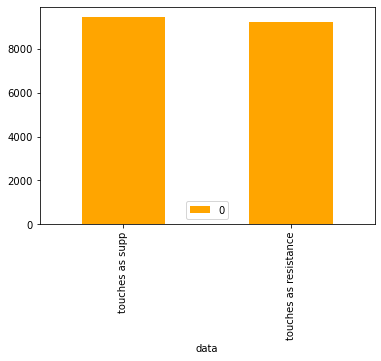

In [78]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

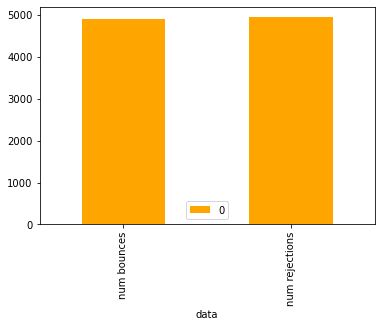

In [79]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [80]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

52.817052270779776 %


In [81]:
df_reactions = pd.DataFrame(reactions)

In [82]:
df_reactions

0       1     2                       3          4  \
0     33000.05 -127.42  body 2021-01-11 07:59:59.999     bounce   
1     33000.05  -59.33  body 2021-01-12 15:29:59.999     bounce   
2     33000.05  -36.92   wig 2021-01-13 06:29:59.999     bounce   
3     33000.05 -164.76  body 2021-01-22 23:59:59.999     bounce   
4     33000.05  -20.95  body 2021-01-25 10:59:59.999     bounce   
...        ...     ...   ...                     ...        ...   
9857  21774.63   84.69  body 2023-02-14 13:59:59.999  rejection   
9858  23517.72   22.22  wick 2023-02-26 19:59:59.999  rejection   
9859  23517.72   77.18  body 2023-02-27 04:29:59.999  rejection   
9860  24272.51   47.84  body 2023-02-20 01:29:59.999  rejection   
9861  24272.51   40.10  wick 2023-02-23 11:29:59.999  rejection   

                                                      5  
0     (36360.0, 32550.0, 33365.34, 2021-01-11 13:29:...  
1     (35550.0, 32819.98, 33404.204280000005, 2021-0...  
2     (40100.0, 32963.13, 34490.42018, 2021-01-15 17...  
3     (33173.01, 32760.0, 32848.38414, 2021-01-23 00...  
4     (34875.0, 32800.0, 33244.05, 2021-01-25 21:29:...  
...                                                 ...  
9857  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  
9858  (23366.87, 23539.94, 23502.903019999998, 2023-...  
9859  (23332.65, 23642.0, 23575.7991, 2023-02-27 11:...  
9860  (23840.83, 24411.52, 24289.392340000002, 2023-...  
9861  (23608.0, 24312.61, 24161.82346, 2023-02-23 14...  

[9862 rows x 6 columns]

In [83]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
1     33000.05      -59.33      body 2021-01-12 15:29:59.999     bounce   
2     33000.05      -36.92       wig 2021-01-13 06:29:59.999     bounce   
3     33000.05     -164.76      body 2021-01-22 23:59:59.999     bounce   
4     33000.05      -20.95      body 2021-01-25 10:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
9857  21774.63       84.69      body 2023-02-14 13:59:59.999  rejection   
9858  23517.72       22.22      wick 2023-02-26 19:59:59.999  rejection   
9859  23517.72       77.18      body 2023-02-27 04:29:59.999  rejection   
9860  24272.51       47.84      body 2023-02-20 01:29:59.999  rejection   
9861  24272.51       40.10      wick 2023-02-23 11:29:59.999  rejection   

                                          reaction_info  
0     (36360.0, 32550.0, 33365.34, 2021-01-11 13:29:...  
1     (35550.0, 32819.98, 33404.204280000005, 2021-0...  
2     (40100.0, 32963.13, 34490.42018, 2021-01-15 17...  
3     (33173.01, 32760.0, 32848.38414, 2021-01-23 00...  
4     (34875.0, 32800.0, 33244.05, 2021-01-25 21:29:...  
...                                                 ...  
9857  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  
9858  (23366.87, 23539.94, 23502.903019999998, 2023-...  
9859  (23332.65, 23642.0, 23575.7991, 2023-02-27 11:...  
9860  (23840.83, 24411.52, 24289.392340000002, 2023-...  
9861  (23608.0, 24312.61, 24161.82346, 2023-02-23 14...  

[9862 rows x 6 columns]

In [84]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [85]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [86]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
1     33000.05      -59.33      body 2021-01-12 15:29:59.999     bounce   
2     33000.05      -36.92       wig 2021-01-13 06:29:59.999     bounce   
3     33000.05     -164.76      body 2021-01-22 23:59:59.999     bounce   
4     33000.05      -20.95      body 2021-01-25 10:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
9857  21774.63       84.69      body 2023-02-14 13:59:59.999  rejection   
9858  23517.72       22.22      wick 2023-02-26 19:59:59.999  rejection   
9859  23517.72       77.18      body 2023-02-27 04:29:59.999  rejection   
9860  24272.51       47.84      body 2023-02-20 01:29:59.999  rejection   
9861  24272.51       40.10      wick 2023-02-23 11:29:59.999  rejection   

      start_price  last_price           end_of_bounce  
0        32550.00    36360.00 2021-01-11 13:29:59.999  
1        32819.98    35550.00 2021-01-12 23:59:59.999  
2        32963.13    40100.00 2021-01-15 17:29:59.999  
3        32760.00    33173.01 2021-01-23 00:59:59.999  
4        32800.00    34875.00 2021-01-25 21:29:59.999  
...           ...         ...                     ...  
9857     21897.00    21532.77 2023-02-14 15:59:59.999  
9858     23539.94    23366.87 2023-02-26 20:59:59.999  
9859     23642.00    23332.65 2023-02-27 11:59:59.999  
9860     24411.52    23840.83 2023-02-20 02:59:59.999  
9861     24312.61    23608.00 2023-02-23 14:29:59.999  

[9862 rows x 8 columns]

In [87]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [88]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
1     33000.05      -59.33      body 2021-01-12 15:29:59.999     bounce   
2     33000.05      -36.92       wig 2021-01-13 06:29:59.999     bounce   
3     33000.05     -164.76      body 2021-01-22 23:59:59.999     bounce   
4     33000.05      -20.95      body 2021-01-25 10:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
9857  21774.63       84.69      body 2023-02-14 13:59:59.999  rejection   
9858  23517.72       22.22      wick 2023-02-26 19:59:59.999  rejection   
9859  23517.72       77.18      body 2023-02-27 04:29:59.999  rejection   
9860  24272.51       47.84      body 2023-02-20 01:29:59.999  rejection   
9861  24272.51       40.10      wick 2023-02-23 11:29:59.999  rejection   

      start_price  last_price           end_of_bounce  %_of_reaction  
0        32550.00    36360.00 2021-01-11 13:29:59.999     -11.705069  
1        32819.98    35550.00 2021-01-12 23:59:59.999      -8.318165  
2        32963.13    40100.00 2021-01-15 17:29:59.999     -21.651069  
3        32760.00    33173.01 2021-01-23 00:59:59.999      -1.260714  
4        32800.00    34875.00 2021-01-25 21:29:59.999      -6.326220  
...           ...         ...                     ...            ...  
9857     21897.00    21532.77 2023-02-14 15:59:59.999       1.663379  
9858     23539.94    23366.87 2023-02-26 20:59:59.999       0.735219  
9859     23642.00    23332.65 2023-02-27 11:59:59.999       1.308476  
9860     24411.52    23840.83 2023-02-20 02:59:59.999       2.337790  
9861     24312.61    23608.00 2023-02-23 14:29:59.999       2.898126  

[9862 rows x 9 columns]

In [89]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [90]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction
count   9862.000000  9862.000000   9862.000000   9862.000000    9862.000000
mean   39891.841221     1.086608  39891.557997  39787.903204       3.591923
std    12835.270481   127.418951  12838.335657  13107.283373       7.798804
min    15781.290000  -301.720000  15770.010000  15476.000000       0.508239
25%    31614.120000   -95.430000  31593.167500  30699.000000       1.138362
50%    40018.490000     0.650000  39940.000000  39958.560000       1.702629
75%    48891.000000    96.197500  48838.035000  48843.200000       2.972172
max    67525.820000   317.070000  67800.270000  69000.000000     124.331881

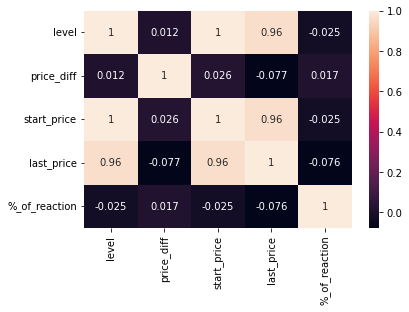

In [91]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1dab4d5d220>,
 'caps': [<matplotlib.lines.Line2D at 0x1dab4d5d940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dab0d1fe50>],
 'medians': [<matplotlib.lines.Line2D at 0x1dab17010a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dab1701430>],
 'means': []}

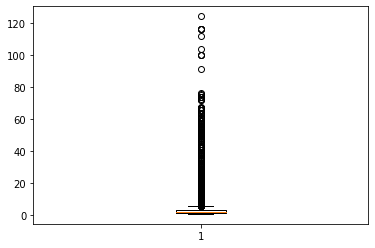

In [92]:
plt.boxplot(df_reactions["%_of_reaction"])

In [93]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

40.37822355539518

In [94]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

2.4576115090021124

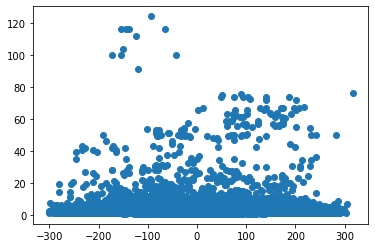

In [95]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [96]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [97]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [98]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction  \
count   9862.000000  9862.000000   9862.000000   9862.000000    9862.000000   
mean   39891.841221     1.086608  39891.557997  39787.903204       3.591923   
std    12835.270481   127.418951  12838.335657  13107.283373       7.798804   
min    15781.290000  -301.720000  15770.010000  15476.000000       0.508239   
25%    31614.120000   -95.430000  31593.167500  30699.000000       1.138362   
50%    40018.490000     0.650000  39940.000000  39958.560000       1.702629   
75%    48891.000000    96.197500  48838.035000  48843.200000       2.972172   
max    67525.820000   317.070000  67800.270000  69000.000000     124.331881   

       %_diff_of_lvl  
count    9862.000000  
mean        0.001267  
std         0.304436  
min        -0.499782  
25%        -0.275793  
50%         0.001852  
75%         0.280977  
max         0.499944

### Testing the price action in the 1 hour timeframe

Reinitializing the statistics table

In [101]:
Statistics_hfprc = []
#Statistics_oneprc = []

for statistics in Statistics :
  statistics.drop_duplicates(subset=["levels"],inplace = True)
  statistics["level_min"] = statistics.levels * (1-(0.5/100))
  statistics["level_max"] = statistics.levels * (1+(0.5/100))
  statistics["touches as supp"] = [0]*len(statistics)
  statistics["touches as resistance"] = [0]*len(statistics)
  statistics["num bounces"] = [0]*len(statistics)
  statistics["num rejections"] = [0]*len(statistics)


  #print("wow")
  Statistics_hfprc.append(statistics)


Getting reactions for the red candles

In [102]:
from operator import is_
#####real



touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_hfprc[2]
testing_price = testing_levels[2]

for i,r in statistics.iterrows():
    print(i)
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Getting reactions for the green candles

In [103]:
for i,r in statistics.iterrows():
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

getting the stats

In [104]:
statistics

dates    levels    level_min    level_max  \
0   2021-01-04 00:59:59.999  33000.05  32835.04975  33165.05025   
1   2021-01-09 00:59:59.999  40586.96  40384.02520  40789.89480   
2   2021-01-15 00:59:59.999  39145.21  38949.48395  39340.93605   
3   2021-01-19 00:59:59.999  36622.46  36439.34770  36805.57230   
4   2021-01-23 00:59:59.999  32950.00  32785.25000  33114.75000   
..                      ...       ...          ...          ...   
417 2023-02-11 00:59:59.999  21625.19  21517.06405  21733.31595   
418 2023-02-14 00:59:59.999  21774.63  21665.75685  21883.50315   
419 2023-02-17 00:59:59.999  23517.72  23400.13140  23635.30860   
420 2023-02-20 00:59:59.999  24272.51  24151.14745  24393.87255   
421 2023-02-26 00:59:59.999  23157.07  23041.28465  23272.85535   

     touches as supp  touches as resistance  num bounces  num rejections  
0                 28                     24           16              19  
1                 37                     37           21              24  
2                 55                     46           25              43  
3                 40                     29           23              18  
4                 24                     24           20              18  
..               ...                    ...          ...             ...  
417                3                      4            2               1  
418                1                      1            1               1  
419                0                      0            0               0  
420                3                      2            1               0  
421                0                      0            0               0  

[422 rows x 8 columns]

In [105]:
stats = statistics.sum()

C:\Users\Hamza\AppData\Local\Temp/ipykernel_15740/1148250093.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



number of reactions

In [106]:
len(reactions)

7000

In [107]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  15666276.78  1.558795e+07  1.574461e+07           6232.0   

   touches as resistance  num bounces  num rejections  
0                 5983.0       3489.0          3511.0

In [108]:
st = pd.DataFrame(stats)

In [109]:
st["data"] = st.index

In [110]:
st

0                   data
levels                 1.566628e+07                 levels
level_min              1.558795e+07              level_min
level_max              1.574461e+07              level_max
touches as supp        6.232000e+03        touches as supp
touches as resistance  5.983000e+03  touches as resistance
num bounces            3.489000e+03            num bounces
num rejections         3.511000e+03         num rejections

Touches as suport :

In [111]:
st[0].iloc[3]

6232.0

Touches as resistance :

In [112]:
st[0].iloc[4]

5983.0

number of bounces :

In [113]:
st[0].iloc[5]

3489.0

number of rejections

In [114]:
st[0].iloc[6]

3511.0

<AxesSubplot:xlabel='data'>

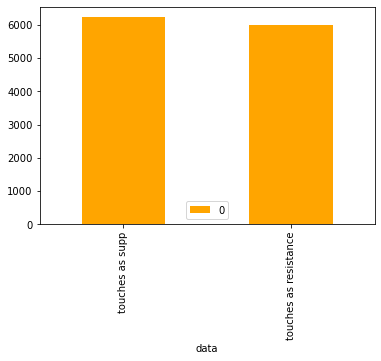

In [115]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

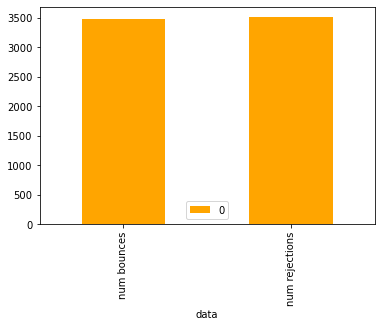

In [116]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [117]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

57.306590257879655 %


In [118]:
df_reactions = pd.DataFrame(reactions)

In [119]:
df_reactions

0       1     2                       3          4  \
0     33000.05 -156.17  body 2021-01-04 01:59:59.999     bounce   
1     33000.05 -127.42  body 2021-01-11 07:59:59.999     bounce   
2     33000.05 -164.76  body 2021-01-22 23:59:59.999     bounce   
3     33000.05  -20.95  body 2021-01-25 10:59:59.999     bounce   
4     33000.05 -136.98  body 2021-06-09 04:59:59.999     bounce   
...        ...     ...   ...                     ...        ...   
6995  22827.38   89.60  wick 2023-02-15 13:59:59.999  rejection   
6996  22762.52    6.79  wick 2023-02-09 14:59:59.999  rejection   
6997  22762.52    9.69  body 2023-02-15 13:59:59.999  rejection   
6998  21625.19   62.76  wick 2023-02-13 15:59:59.999  rejection   
6999  21774.63   84.69  body 2023-02-14 13:59:59.999  rejection   

                                                      5  
0     (33600.0, 32400.25, 32656.9965, 2021-01-04 08:...  
1     (36360.0, 32550.0, 33365.34, 2021-01-11 13:59:...  
2     (33173.01, 32760.0, 32848.38414, 2021-01-23 01...  
3     (34875.0, 32800.0, 33244.05, 2021-01-25 21:59:...  
4     (41330.0, 32610.73, 34476.65378, 2021-06-20 11...  
...                                                 ...  
6995  (22620.0, 22916.98, 22853.42628, 2023-02-15 16...  
6996  (21351.07, 22769.31, 22465.806640000003, 2023-...  
6997  (22620.0, 22916.98, 22853.42628, 2023-02-15 16...  
6998  (21351.07, 21687.95, 21615.85768, 2023-02-13 1...  
6999  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  

[7000 rows x 6 columns]

In [120]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -156.17      body 2021-01-04 01:59:59.999     bounce   
1     33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
2     33000.05     -164.76      body 2021-01-22 23:59:59.999     bounce   
3     33000.05      -20.95      body 2021-01-25 10:59:59.999     bounce   
4     33000.05     -136.98      body 2021-06-09 04:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
6995  22827.38       89.60      wick 2023-02-15 13:59:59.999  rejection   
6996  22762.52        6.79      wick 2023-02-09 14:59:59.999  rejection   
6997  22762.52        9.69      body 2023-02-15 13:59:59.999  rejection   
6998  21625.19       62.76      wick 2023-02-13 15:59:59.999  rejection   
6999  21774.63       84.69      body 2023-02-14 13:59:59.999  rejection   

                                          reaction_info  
0     (33600.0, 32400.25, 32656.9965, 2021-01-04 08:...  
1     (36360.0, 32550.0, 33365.34, 2021-01-11 13:59:...  
2     (33173.01, 32760.0, 32848.38414, 2021-01-23 01...  
3     (34875.0, 32800.0, 33244.05, 2021-01-25 21:59:...  
4     (41330.0, 32610.73, 34476.65378, 2021-06-20 11...  
...                                                 ...  
6995  (22620.0, 22916.98, 22853.42628, 2023-02-15 16...  
6996  (21351.07, 22769.31, 22465.806640000003, 2023-...  
6997  (22620.0, 22916.98, 22853.42628, 2023-02-15 16...  
6998  (21351.07, 21687.95, 21615.85768, 2023-02-13 1...  
6999  (21532.77, 21897.0, 21819.05478, 2023-02-14 15...  

[7000 rows x 6 columns]

In [121]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [122]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [123]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -156.17      body 2021-01-04 01:59:59.999     bounce   
1     33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
2     33000.05     -164.76      body 2021-01-22 23:59:59.999     bounce   
3     33000.05      -20.95      body 2021-01-25 10:59:59.999     bounce   
4     33000.05     -136.98      body 2021-06-09 04:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
6995  22827.38       89.60      wick 2023-02-15 13:59:59.999  rejection   
6996  22762.52        6.79      wick 2023-02-09 14:59:59.999  rejection   
6997  22762.52        9.69      body 2023-02-15 13:59:59.999  rejection   
6998  21625.19       62.76      wick 2023-02-13 15:59:59.999  rejection   
6999  21774.63       84.69      body 2023-02-14 13:59:59.999  rejection   

      start_price  last_price           end_of_bounce  
0        32400.25    33600.00 2021-01-04 08:59:59.999  
1        32550.00    36360.00 2021-01-11 13:59:59.999  
2        32760.00    33173.01 2021-01-23 01:59:59.999  
3        32800.00    34875.00 2021-01-25 21:59:59.999  
4        32610.73    41330.00 2021-06-20 11:59:59.999  
...           ...         ...                     ...  
6995     22916.98    22620.00 2023-02-15 16:59:59.999  
6996     22769.31    21351.07 2023-02-15 12:59:59.999  
6997     22916.98    22620.00 2023-02-15 16:59:59.999  
6998     21687.95    21351.07 2023-02-13 19:59:59.999  
6999     21897.00    21532.77 2023-02-14 15:59:59.999  

[7000 rows x 8 columns]

In [124]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [125]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -156.17      body 2021-01-04 01:59:59.999     bounce   
1     33000.05     -127.42      body 2021-01-11 07:59:59.999     bounce   
2     33000.05     -164.76      body 2021-01-22 23:59:59.999     bounce   
3     33000.05      -20.95      body 2021-01-25 10:59:59.999     bounce   
4     33000.05     -136.98      body 2021-06-09 04:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
6995  22827.38       89.60      wick 2023-02-15 13:59:59.999  rejection   
6996  22762.52        6.79      wick 2023-02-09 14:59:59.999  rejection   
6997  22762.52        9.69      body 2023-02-15 13:59:59.999  rejection   
6998  21625.19       62.76      wick 2023-02-13 15:59:59.999  rejection   
6999  21774.63       84.69      body 2023-02-14 13:59:59.999  rejection   

      start_price  last_price           end_of_bounce  %_of_reaction  
0        32400.25    33600.00 2021-01-04 08:59:59.999      -3.702904  
1        32550.00    36360.00 2021-01-11 13:59:59.999     -11.705069  
2        32760.00    33173.01 2021-01-23 01:59:59.999      -1.260714  
3        32800.00    34875.00 2021-01-25 21:59:59.999      -6.326220  
4        32610.73    41330.00 2021-06-20 11:59:59.999     -26.737427  
...           ...         ...                     ...            ...  
6995     22916.98    22620.00 2023-02-15 16:59:59.999       1.295895  
6996     22769.31    21351.07 2023-02-15 12:59:59.999       6.228735  
6997     22916.98    22620.00 2023-02-15 16:59:59.999       1.295895  
6998     21687.95    21351.07 2023-02-13 19:59:59.999       1.553305  
6999     21897.00    21532.77 2023-02-14 15:59:59.999       1.663379  

[7000 rows x 9 columns]

In [126]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [127]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction
count   7000.000000  7000.000000   7000.000000   7000.000000    7000.000000
mean   39552.326494     2.369804  39553.406486  39467.882034       4.186292
std    12998.929428   125.985134  13001.481874  13361.640308       8.837325
min    15781.290000  -314.760000  15701.000000  15476.000000       0.511786
25%    30362.190000   -92.252500  30382.800000  29542.000000       1.260959
50%    39671.370000     0.510000  39652.835000  39807.940000       1.921380
75%    48821.880000    96.622500  48688.830000  48667.072500       3.485527
max    67525.820000   304.070000  67800.270000  69000.000000     116.136162

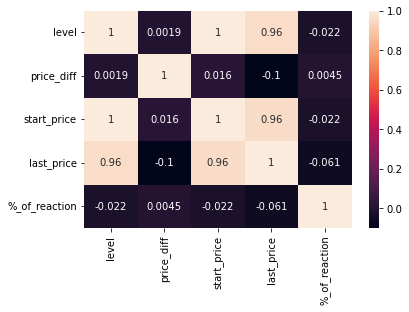

In [128]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1daae3558b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1daae355fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1daae355520>],
 'medians': [<matplotlib.lines.Line2D at 0x1daae338790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1daae338af0>],
 'means': []}

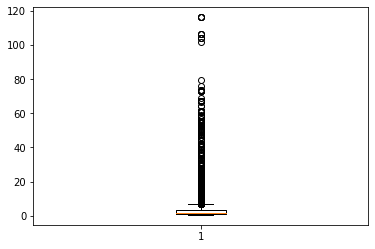

In [129]:
plt.boxplot(df_reactions["%_of_reaction"])

In [130]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

40.96279134305936

In [131]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

2.716543298035754

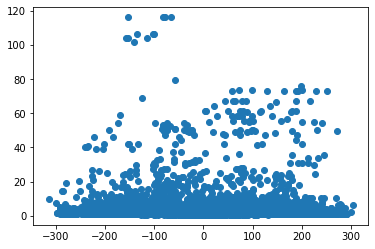

In [132]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [133]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [134]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [135]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction  \
count   7000.000000  7000.000000   7000.000000   7000.000000    7000.000000   
mean   39552.326494     2.369804  39553.406486  39467.882034       4.186292   
std    12998.929428   125.985134  13001.481874  13361.640308       8.837325   
min    15781.290000  -314.760000  15701.000000  15476.000000       0.511786   
25%    30362.190000   -92.252500  30382.800000  29542.000000       1.260959   
50%    39671.370000     0.510000  39652.835000  39807.940000       1.921380   
75%    48821.880000    96.622500  48688.830000  48667.072500       3.485527   
max    67525.820000   304.070000  67800.270000  69000.000000     116.136162   

       %_diff_of_lvl  
count    7000.000000  
mean        0.006064  
std         0.302748  
min        -0.499720  
25%        -0.271303  
50%         0.002013  
75%         0.284709  
max         0.499948

### Testing the price action in the 4 hour timeframe

Reinitializing the statistics table

In [136]:
Z_parameter = [0.5,1]
Statistics_hfprc = []
#Statistics_oneprc = []

for statistics in Statistics :
  statistics.drop_duplicates(subset=["levels"],inplace = True)
  statistics["level_min"] = statistics.levels * (1-(0.5/100))
  statistics["level_max"] = statistics.levels * (1+(0.5/100))
  statistics["touches as supp"] = [0]*len(statistics)
  statistics["touches as resistance"] = [0]*len(statistics)
  statistics["num bounces"] = [0]*len(statistics)
  statistics["num rejections"] = [0]*len(statistics)


  #print("wow")
  Statistics_hfprc.append(statistics)


Getting reactions for the red candles

In [137]:
from operator import is_
#####real



touches_suppport = []

touches_resistance = []
reactions = []
indexes = []
statistics =Statistics_hfprc[2]
testing_price = testing_levels[3]

for i,r in statistics.iterrows():
    print(i)
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :     
                if row.candle_color == "red":
                    if (row.low >= r.level_min and row.low <= r.levels)  :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.low - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              reactions.append([r.levels, price_diff, "wig", row.date,"bounce",is_bounce])
                              statistics.at[i, "num bounces"] +=1
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else:
                            touches_suppport.append([r.levels, price_diff, "wig", row.date,"no bounce"])
                    elif (row.close >= r.level_min and row.close <= r.levels) :
                        if touch == 0:
                          statistics.at[i, "touches as supp"] +=1
                          touch= touch+1
                        price_diff = row.close - r.levels
                        if testing_price.iloc[index+1].candle_color  == "green" :
                            touches_suppport.append([r.levels,price_diff, "body", row.date,"bounce"])
                            is_bounce = bounce(testing_price,index)
                            if is_bounce[0]> r.level_max :
                              statistics.at[i, "num bounces"] +=1
                              reactions.append([r.levels, price_diff, "body", row.date,"bounce",is_bounce])
                              last_index = is_bounce[-1]
                              indexes.append([i,index,last_index,is_bounce[2],r.levels])
                        else: 
                    
                            touches_suppport.append([r.levels, price_diff, "body", row.date,"no bounce"])
                    else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close>r.level_max :
                      touch = 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Getting reactions for the green candles

In [138]:
for i,r in statistics.iterrows():
    print(i)
    last_index = -1
    touch = 0
    for index,row in testing_price.iterrows():
      if index <= last_index :
        pass
      else:
        if index<len(testing_price)-2 :
            if r.dates<row.date :
                if row.candle_color == "green":
                  if (row.high <= r.level_max and row.high >= r.levels)  :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.high - r.levels
                      #print(index)
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          
                          touches_resistance.append([r.levels, price_diff, "wick", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            reactions.append([r.levels, price_diff, "wick", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            statistics.at[i, "num rejections"] +=1
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                            
                      else:
                          touches_resistance.append([r.levels, price_diff, "wig", row.date,"no rejection"])
                  elif (row.close <= r.level_max and row.close >= r.levels) :
                      if touch == 0:
                        statistics.at[i, "touches as resistance"] +=1
                        touch= touch+1
                      price_diff = row.close - r.levels
                      if testing_price.iloc[index+1].candle_color  == "red" :
                          #statistics.at[i, "num rejections"] +=1
                          touches_resistance.append([r.levels,price_diff, "body", row.date,"rejection"])
                          is_rejection = rejection(testing_price,index)
                          if is_rejection[0]< r.level_min :
                            statistics.at[i, "num rejections"] +=1
                            reactions.append([r.levels, price_diff, "body", row.date,"rejection",is_rejection])
                            last_index = is_rejection[-1]
                            indexes.append([i,index,last_index,is_rejection[2],r.levels])
                      else: 
                  
                          touches_resistance.append([r.levels, price_diff, "body", row.date,"no rejection"])
                  else :
                      if touch == 1 :
                        touch = 0
                else :  
                    if touch == 1 and row.close<r.level_min :
                      touch = 0  

            
                  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

getting the stats

In [139]:
statistics

dates    levels    level_min    level_max  \
0   2021-01-04 00:59:59.999  33000.05  32835.04975  33165.05025   
1   2021-01-09 00:59:59.999  40586.96  40384.02520  40789.89480   
2   2021-01-15 00:59:59.999  39145.21  38949.48395  39340.93605   
3   2021-01-19 00:59:59.999  36622.46  36439.34770  36805.57230   
4   2021-01-23 00:59:59.999  32950.00  32785.25000  33114.75000   
..                      ...       ...          ...          ...   
417 2023-02-11 00:59:59.999  21625.19  21517.06405  21733.31595   
418 2023-02-14 00:59:59.999  21774.63  21665.75685  21883.50315   
419 2023-02-17 00:59:59.999  23517.72  23400.13140  23635.30860   
420 2023-02-20 00:59:59.999  24272.51  24151.14745  24393.87255   
421 2023-02-26 00:59:59.999  23157.07  23041.28465  23272.85535   

     touches as supp  touches as resistance  num bounces  num rejections  
0                  7                      8            4               7  
1                 16                     17            9               9  
2                 14                     22            4              14  
3                 16                      8           11               5  
4                  8                      7           10               7  
..               ...                    ...          ...             ...  
417                2                      2            1               0  
418                1                      1            0               0  
419                1                      1            0               1  
420                1                      0            0               0  
421                1                      1            2               0  

[422 rows x 8 columns]

In [140]:
stats = statistics.sum()

C:\Users\Hamza\AppData\Local\Temp/ipykernel_15740/1148250093.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



number of reactions

In [141]:
len(reactions)

3147

In [142]:
pd.DataFrame(stats).transpose()

levels     level_min     level_max  touches as supp  \
0  15666276.78  1.558795e+07  1.574461e+07           2554.0   

   touches as resistance  num bounces  num rejections  
0                 2608.0       1582.0          1565.0

In [143]:
st = pd.DataFrame(stats)

In [144]:
st["data"] = st.index

In [145]:
st

0                   data
levels                 1.566628e+07                 levels
level_min              1.558795e+07              level_min
level_max              1.574461e+07              level_max
touches as supp        2.554000e+03        touches as supp
touches as resistance  2.608000e+03  touches as resistance
num bounces            1.582000e+03            num bounces
num rejections         1.565000e+03         num rejections

Touches as suport :

In [146]:
st[0].iloc[3]

2554.0

Touches as resistance :

In [147]:
st[0].iloc[4]

2608.0

number of bounces :

In [148]:
st[0].iloc[5]

1582.0

number of rejections

In [149]:
st[0].iloc[6]

1565.0

<AxesSubplot:xlabel='data'>

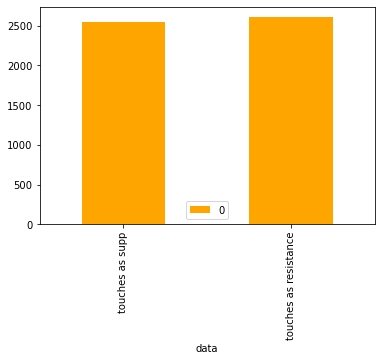

In [150]:
st[3:5].plot(x="data", y=0, kind='bar',color="orange")

<AxesSubplot:xlabel='data'>

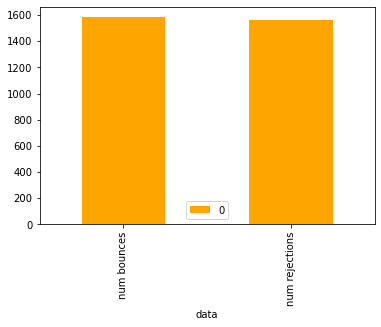

In [151]:
st[5:7].plot(x="data", y=0,kind='bar',color="orange")

Ratio of reactions to touches :


In [152]:
no_of_touches = st[0][3]+st[0][4]
Ratio = len(reactions)/no_of_touches
print(Ratio*100,"%")

60.96474234792716 %


In [153]:
df_reactions = pd.DataFrame(reactions)

In [154]:
df_reactions

0       1     2                       3          4  \
0     33000.05 -136.98  body 2021-06-09 04:59:59.999     bounce   
1     33000.05 -129.06   wig 2021-06-23 20:59:59.999     bounce   
2     33000.05  -92.83  body 2021-07-02 04:59:59.999     bounce   
3     33000.05 -124.34  body 2021-07-09 00:59:59.999     bounce   
4     40586.96  -61.81  body 2021-01-09 16:59:59.999     bounce   
...        ...     ...   ...                     ...        ...   
3142  23021.40    8.60  wick 2023-02-06 00:59:59.999  rejection   
3143  23021.40   43.16  wick 2023-02-07 12:59:59.999  rejection   
3144  22827.38  105.53  body 2023-02-06 00:59:59.999  rejection   
3145  22762.52    7.48  wick 2023-02-09 12:59:59.999  rejection   
3146  23517.72   37.13  body 2023-02-27 00:59:59.999  rejection   

                                                      5  
0     (41330.0, 32396.82, 34308.52052, 2021-06-20 12...  
1     (33785.26, 32870.99, 33066.64378, 2021-06-24 0...  
2     (33500.36, 32767.74, 32924.52068, 2021-07-02 1...  
3     (33310.0, 32508.0, 32679.628, 2021-07-09 12:59...  
4     (40880.0, 40200.0, 40345.52, 2021-01-10 00:59:...  
...                                                 ...  
3142  (22628.13, 23030.0, 22943.99982, 2023-02-06 16...  
3143  (22876.35, 23064.56, 23024.28306, 2023-02-07 2...  
3144  (22628.13, 23030.0, 22943.99982, 2023-02-06 16...  
3145  (21351.07, 22770.0, 22466.34898, 2023-02-15 12...  
3146  (23346.16, 23689.99, 23616.41038, 2023-02-27 1...  

[3147 rows x 6 columns]

In [155]:
df_reactions.rename(columns = {0:'level', 1:'price_diff', 2 : 'wick/body',3 : "start_of_reaction", 4:"type",5:"reaction_info"}, inplace = True)
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -136.98      body 2021-06-09 04:59:59.999     bounce   
1     33000.05     -129.06       wig 2021-06-23 20:59:59.999     bounce   
2     33000.05      -92.83      body 2021-07-02 04:59:59.999     bounce   
3     33000.05     -124.34      body 2021-07-09 00:59:59.999     bounce   
4     40586.96      -61.81      body 2021-01-09 16:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
3142  23021.40        8.60      wick 2023-02-06 00:59:59.999  rejection   
3143  23021.40       43.16      wick 2023-02-07 12:59:59.999  rejection   
3144  22827.38      105.53      body 2023-02-06 00:59:59.999  rejection   
3145  22762.52        7.48      wick 2023-02-09 12:59:59.999  rejection   
3146  23517.72       37.13      body 2023-02-27 00:59:59.999  rejection   

                                          reaction_info  
0     (41330.0, 32396.82, 34308.52052, 2021-06-20 12...  
1     (33785.26, 32870.99, 33066.64378, 2021-06-24 0...  
2     (33500.36, 32767.74, 32924.52068, 2021-07-02 1...  
3     (33310.0, 32508.0, 32679.628, 2021-07-09 12:59...  
4     (40880.0, 40200.0, 40345.52, 2021-01-10 00:59:...  
...                                                 ...  
3142  (22628.13, 23030.0, 22943.99982, 2023-02-06 16...  
3143  (22876.35, 23064.56, 23024.28306, 2023-02-07 2...  
3144  (22628.13, 23030.0, 22943.99982, 2023-02-06 16...  
3145  (21351.07, 22770.0, 22466.34898, 2023-02-15 12...  
3146  (23346.16, 23689.99, 23616.41038, 2023-02-27 1...  

[3147 rows x 6 columns]

In [156]:
df_reactions["start_price"] = df_reactions.apply(lambda row: row.reaction_info[1] , axis = 1)
df_reactions["last_price"] = df_reactions.apply(lambda row: row.reaction_info[0] , axis = 1)
df_reactions["end_of_bounce"] = df_reactions.apply(lambda row: row.reaction_info[3] , axis = 1)

In [157]:
df_reactions = df_reactions.drop('reaction_info', axis=1)

In [158]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -136.98      body 2021-06-09 04:59:59.999     bounce   
1     33000.05     -129.06       wig 2021-06-23 20:59:59.999     bounce   
2     33000.05      -92.83      body 2021-07-02 04:59:59.999     bounce   
3     33000.05     -124.34      body 2021-07-09 00:59:59.999     bounce   
4     40586.96      -61.81      body 2021-01-09 16:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
3142  23021.40        8.60      wick 2023-02-06 00:59:59.999  rejection   
3143  23021.40       43.16      wick 2023-02-07 12:59:59.999  rejection   
3144  22827.38      105.53      body 2023-02-06 00:59:59.999  rejection   
3145  22762.52        7.48      wick 2023-02-09 12:59:59.999  rejection   
3146  23517.72       37.13      body 2023-02-27 00:59:59.999  rejection   

      start_price  last_price           end_of_bounce  
0        32396.82    41330.00 2021-06-20 12:59:59.999  
1        32870.99    33785.26 2021-06-24 04:59:59.999  
2        32767.74    33500.36 2021-07-02 12:59:59.999  
3        32508.00    33310.00 2021-07-09 12:59:59.999  
4        40200.00    40880.00 2021-01-10 00:59:59.999  
...           ...         ...                     ...  
3142     23030.00    22628.13 2023-02-06 16:59:59.999  
3143     23064.56    22876.35 2023-02-07 20:59:59.999  
3144     23030.00    22628.13 2023-02-06 16:59:59.999  
3145     22770.00    21351.07 2023-02-15 12:59:59.999  
3146     23689.99    23346.16 2023-02-27 12:59:59.999  

[3147 rows x 8 columns]

In [159]:
df_reactions["%_of_reaction"] = ((df_reactions["start_price"]-df_reactions["last_price"])/df_reactions["start_price"])*100

In [160]:
df_reactions

level  price_diff wick/body       start_of_reaction       type  \
0     33000.05     -136.98      body 2021-06-09 04:59:59.999     bounce   
1     33000.05     -129.06       wig 2021-06-23 20:59:59.999     bounce   
2     33000.05      -92.83      body 2021-07-02 04:59:59.999     bounce   
3     33000.05     -124.34      body 2021-07-09 00:59:59.999     bounce   
4     40586.96      -61.81      body 2021-01-09 16:59:59.999     bounce   
...        ...         ...       ...                     ...        ...   
3142  23021.40        8.60      wick 2023-02-06 00:59:59.999  rejection   
3143  23021.40       43.16      wick 2023-02-07 12:59:59.999  rejection   
3144  22827.38      105.53      body 2023-02-06 00:59:59.999  rejection   
3145  22762.52        7.48      wick 2023-02-09 12:59:59.999  rejection   
3146  23517.72       37.13      body 2023-02-27 00:59:59.999  rejection   

      start_price  last_price           end_of_bounce  %_of_reaction  
0        32396.82    41330.00 2021-06-20 12:59:59.999     -27.574250  
1        32870.99    33785.26 2021-06-24 04:59:59.999      -2.781389  
2        32767.74    33500.36 2021-07-02 12:59:59.999      -2.235797  
3        32508.00    33310.00 2021-07-09 12:59:59.999      -2.467085  
4        40200.00    40880.00 2021-01-10 00:59:59.999      -1.691542  
...           ...         ...                     ...            ...  
3142     23030.00    22628.13 2023-02-06 16:59:59.999       1.744985  
3143     23064.56    22876.35 2023-02-07 20:59:59.999       0.816014  
3144     23030.00    22628.13 2023-02-06 16:59:59.999       1.744985  
3145     22770.00    21351.07 2023-02-15 12:59:59.999       6.231577  
3146     23689.99    23346.16 2023-02-27 12:59:59.999       1.451372  

[3147 rows x 9 columns]

In [161]:
df_reactions["%_of_reaction"] = df_reactions["%_of_reaction"].abs()

In [162]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction
count   3147.000000  3147.000000   3147.000000   3147.000000    3147.000000
mean   38695.464897     1.253295  38691.084439  38508.269285       5.429866
std    13308.080522   122.543024  13311.754957  13743.815444       9.762714
min    15781.290000  -301.080000  15660.000000  15476.000000       0.565968
25%    23810.980000   -88.680000  23756.770000  23689.990000       1.621608
50%    39397.970000    -1.850000  39567.050000  39641.300000       2.649496
75%    48374.090000    90.540000  48385.980000  48326.050000       4.969100
max    67525.820000   290.040000  67800.270000  69000.000000     116.136162

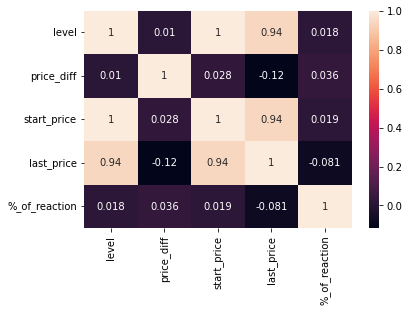

In [163]:
corr_matrix = df_reactions.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1daade19b80>,
 'caps': [<matplotlib.lines.Line2D at 0x1daadde32e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1daade197f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1daadde3a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1daadde3d90>],
 'means': []}

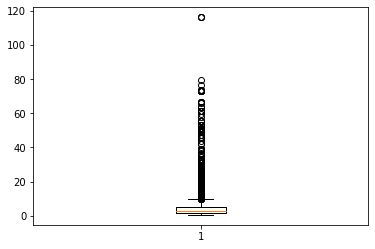

In [164]:
plt.boxplot(df_reactions["%_of_reaction"])

In [165]:
df_reactions[df_reactions["%_of_reaction"]>17]["%_of_reaction"].mean()

38.901072396203375

In [166]:
df_reactions[df_reactions["%_of_reaction"]<17]["%_of_reaction"].mean()

3.470905439652417

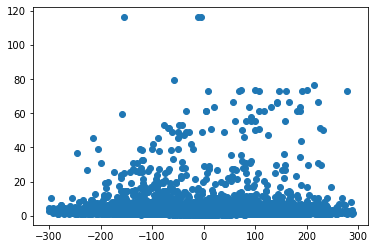

In [167]:
plt.scatter(df_reactions["price_diff"], df_reactions["%_of_reaction"])

In [168]:
df_reactions["%_diff_of_lvl"] = df_reactions['price_diff']/df_reactions["level"]

In [169]:
df_reactions["%_diff_of_lvl"] = df_reactions["%_diff_of_lvl"]*100

In [170]:
df_reactions.describe()

level   price_diff   start_price    last_price  %_of_reaction  \
count   3147.000000  3147.000000   3147.000000   3147.000000    3147.000000   
mean   38695.464897     1.253295  38691.084439  38508.269285       5.429866   
std    13308.080522   122.543024  13311.754957  13743.815444       9.762714   
min    15781.290000  -301.080000  15660.000000  15476.000000       0.565968   
25%    23810.980000   -88.680000  23756.770000  23689.990000       1.621608   
50%    39397.970000    -1.850000  39567.050000  39641.300000       2.649496   
75%    48374.090000    90.540000  48385.980000  48326.050000       4.969100   
max    67525.820000   290.040000  67800.270000  69000.000000     116.136162   

       %_diff_of_lvl  
count    3147.000000  
mean        0.002114  
std         0.297191  
min        -0.499720  
25%        -0.261644  
50%        -0.006602  
75%         0.274426  
max         0.499948